___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from numpy import percentile


#ML
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Options
pd.set_option('display.max_columns', 250)
pd.set_option("max_rows", 10)

#functions
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('covtype.csv')
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [4]:
df.info() #seems all colums are numeric, there is no Null values. #580k data, 55 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
pd.set_option("max_rows", 56)
print(df.describe().T) 
pd.set_option("max_rows", 10)

                                       count         mean          std  \
Elevation                           581012.0  2959.365301   279.984734   
Aspect                              581012.0   155.656807   111.913721   
Slope                               581012.0    14.103704     7.488242   
Horizontal_Distance_To_Hydrology    581012.0   269.428217   212.549356   
Vertical_Distance_To_Hydrology      581012.0    46.418855    58.295232   
Horizontal_Distance_To_Roadways     581012.0  2350.146611  1559.254870   
Hillshade_9am                       581012.0   212.146049    26.769889   
Hillshade_Noon                      581012.0   223.318716    19.768697   
Hillshade_3pm                       581012.0   142.528263    38.274529   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291226  1324.195210   
Wilderness_Area1                    581012.0     0.448865     0.497379   
Wilderness_Area2                    581012.0     0.051434     0.220882   
Wilderness_Area3                    58

In [6]:
for i in df.columns:
    print(i.upper())
    print(df[i].value_counts())
    print("--------------------------------------")

ELEVATION
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
        ... 
1874       1
3771       1
1881       1
3767       1
3768       1
Name: Elevation, Length: 1978, dtype: int64
--------------------------------------
ASPECT
45     6308
0      4914
90     4677
135    3834
63     3680
       ... 
269     625
244     587
224     506
226     499
360      51
Name: Aspect, Length: 361, dtype: int64
--------------------------------------
SLOPE
11    33824
10    33812
12    33217
13    32419
9     32049
      ...  
60        2
58        1
63        1
64        1
66        1
Name: Slope, Length: 67, dtype: int64
--------------------------------------
HORIZONTAL_DISTANCE_TO_HYDROLOGY
30      34139
0       24603
150     20785
60      19189
67      15223
        ...  
1191        1
1296        1
1293        1
1240        1
1299        1
Name: Horizontal_Distance_To_Hydrology, Length: 551, dtype: int64
--------------------------------------
VERTICAL_DISTANCE_TO_HYDROLOGY
0      3

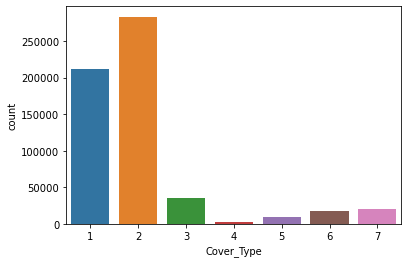

In [7]:
sns.countplot(df["Cover_Type"])

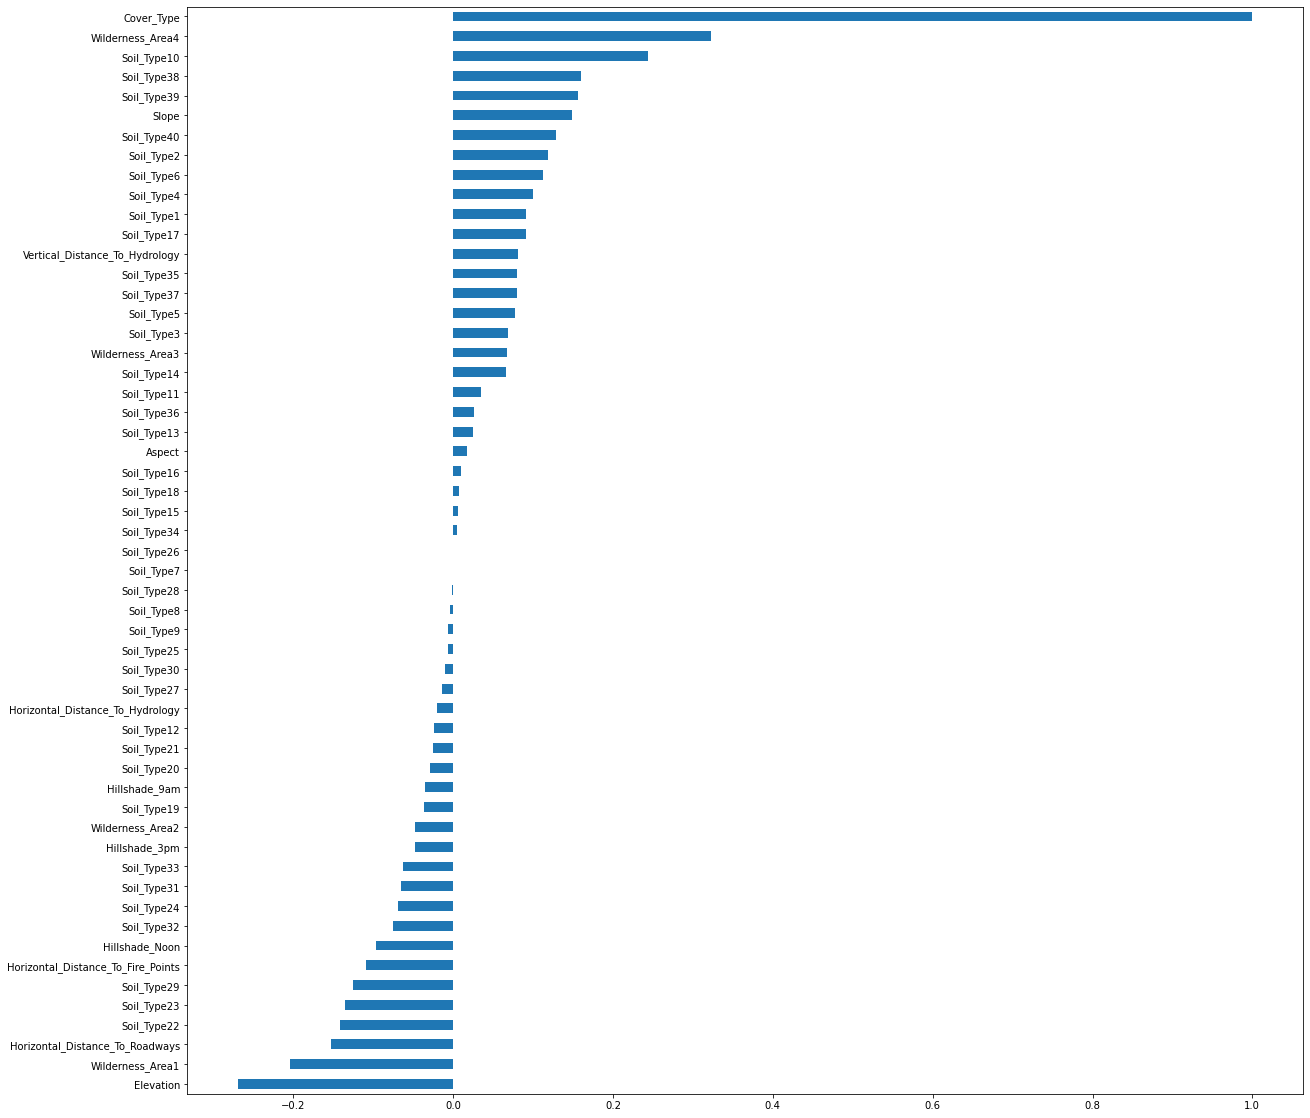

In [8]:
plt.figure(figsize = (20, 20))
df.corr()['Cover_Type'].sort_values().plot.barh()

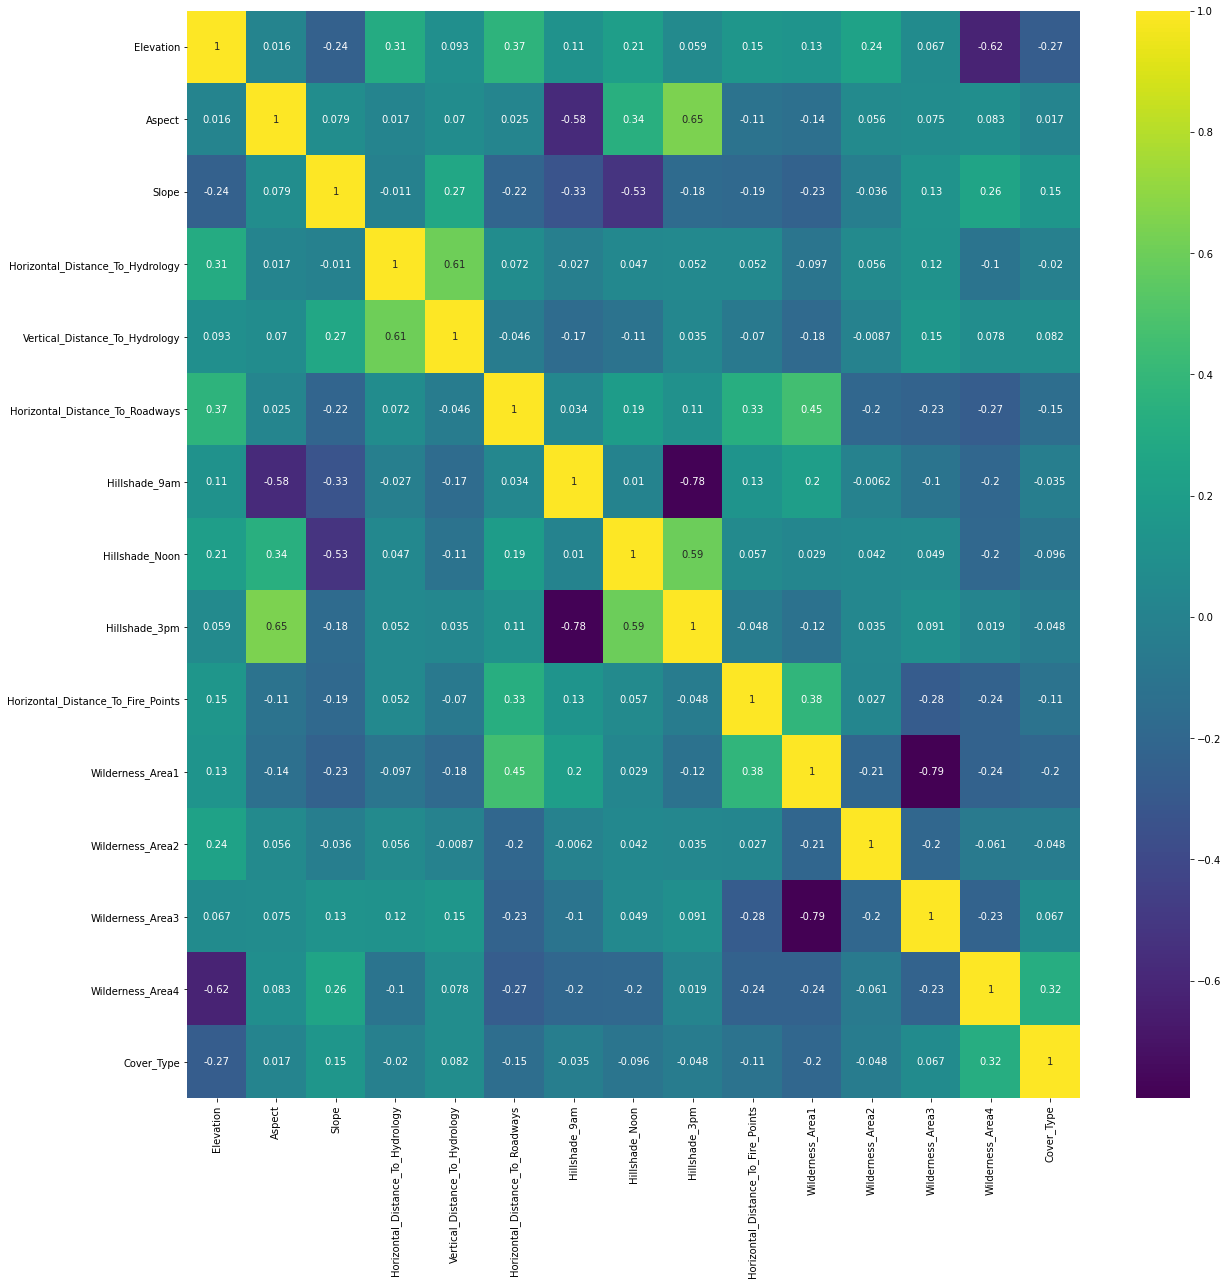

In [9]:
a = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
        'Cover_Type']].corr()
plt.figure(figsize = (20, 20))

sns.heatmap(a, annot=True,cmap = 'viridis')

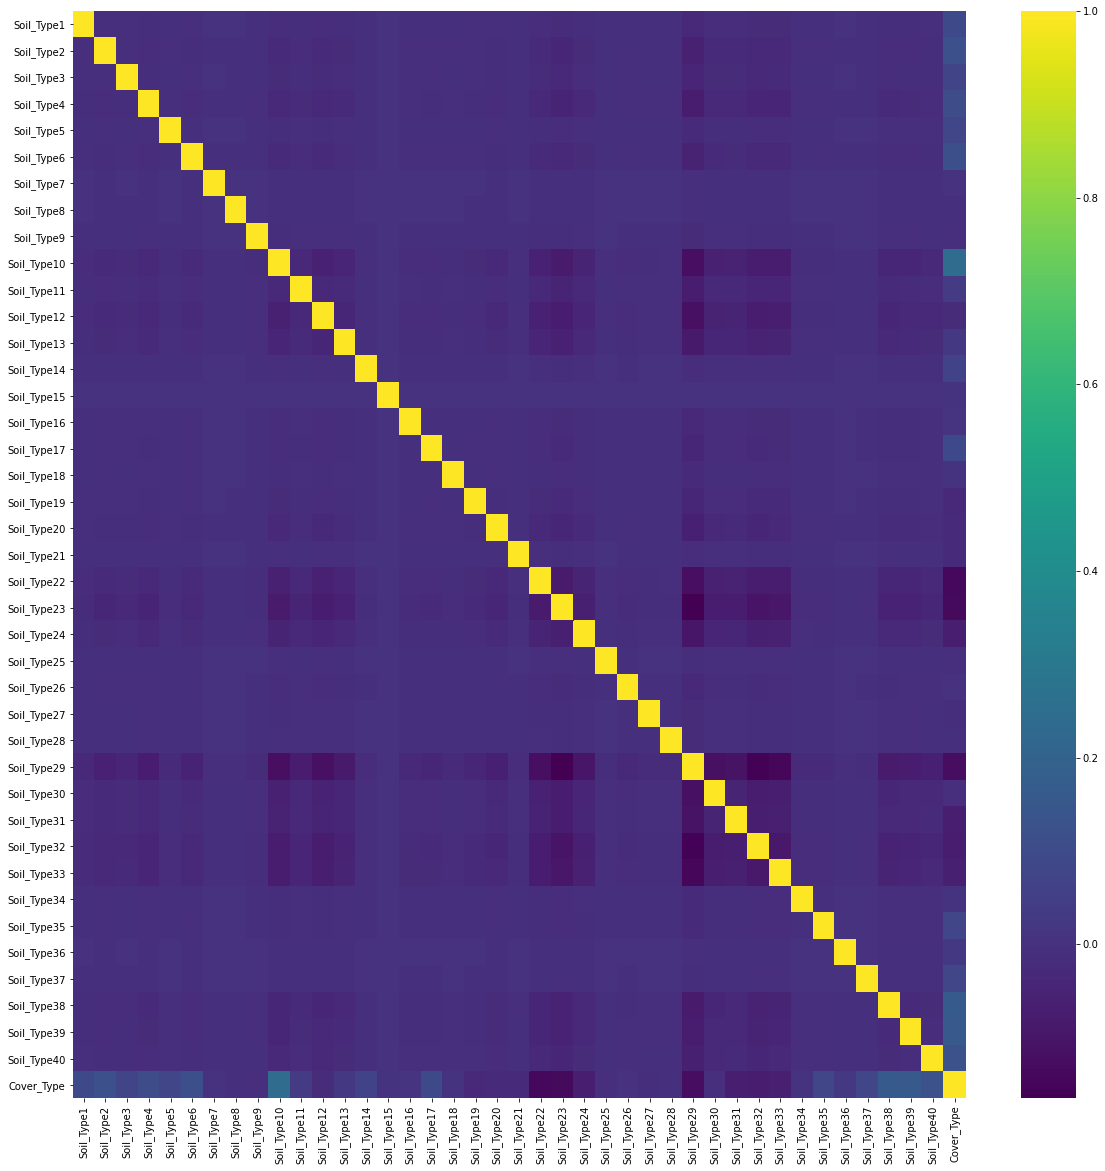

In [10]:
b = df[[   'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']].corr()

plt.figure(figsize = (20, 20))
sns.heatmap(b,cmap = 'viridis')

In [11]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [12]:
#drop features which effects are less and which daata in it mostly 0
ftrs=['Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type27', 'Soil_Type36', 'Soil_Type37', 'Soil_Type13', 'Soil_Type16', 'Soil_Type18', 'Soil_Type34', 'Soil_Type26', 'Soil_Type9', 'Soil_Type30']
df2 = df.drop(ftrs ,axis = 1)
df2

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
0                                     6279                 1   
1                                     6225                 1   
2                                     6121                 1   
3                                     6211                 1   
4                                     6172                 1   
...                                    ...               ...   
581007                                 837                 0   
581008                                 845                 0   
581009                                 854                 0   
581010                                 864                 0   
581011                                 875                 0   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
0                      0                 0                 0           0   
1                      0                 0                 0           0   
2                      0                 0                 0           0   
3                      0                 0                 0           0   
4                      0                 0                 0           0   
...                  ...               ...               ...         ...   
581007                 0                 1                 0           0   
581008                 0                 1                 0           0   
581009                 0                 1                 0           0   
581010                 0                 1                 0    

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [13]:
df2.isnull().sum().sort_values(ascending = False) #No missing value

Cover_Type                            0
Horizontal_Distance_To_Fire_Points    0
Soil_Type3                            0
Soil_Type2                            0
Soil_Type1                            0
                                     ..
Soil_Type19                           0
Soil_Type17                           0
Soil_Type12                           0
Soil_Type11                           0
Elevation                             0
Length: 38, dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

'Elevation'


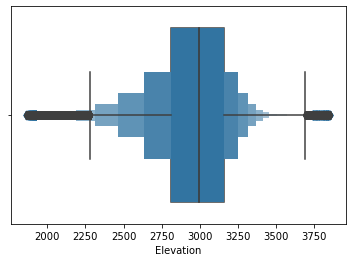

--------------------------------------
'Aspect'


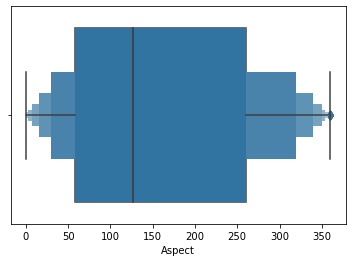

--------------------------------------
'Slope'


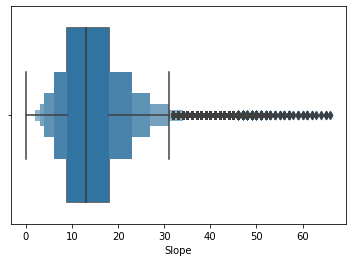

--------------------------------------
'Horizontal_Distance_To_Hydrology'


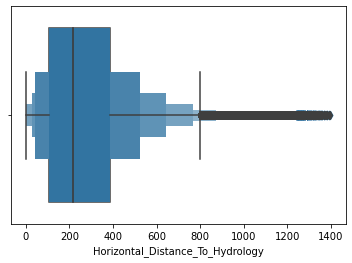

--------------------------------------
'Vertical_Distance_To_Hydrology'


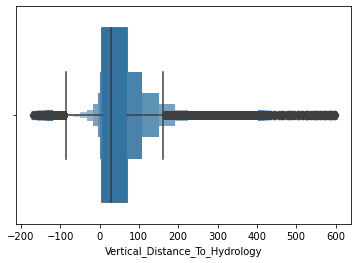

--------------------------------------
'Horizontal_Distance_To_Roadways'


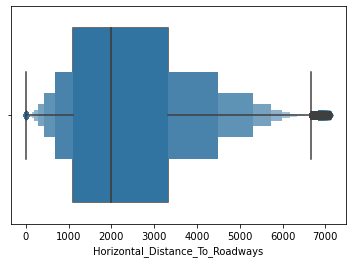

--------------------------------------
'Hillshade_9am'


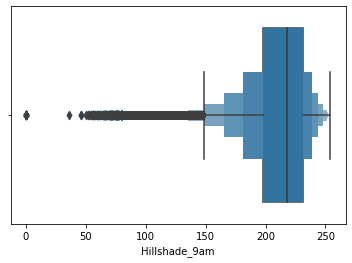

--------------------------------------
'Hillshade_Noon'


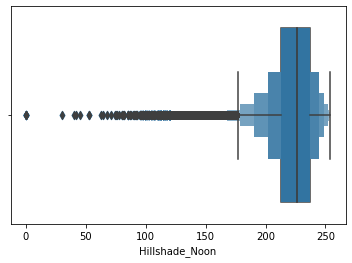

--------------------------------------
'Hillshade_3pm'


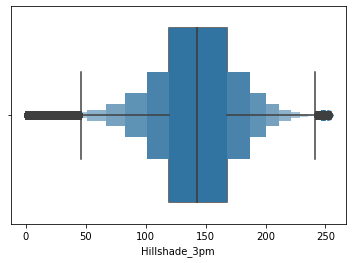

--------------------------------------
'Horizontal_Distance_To_Fire_Points'


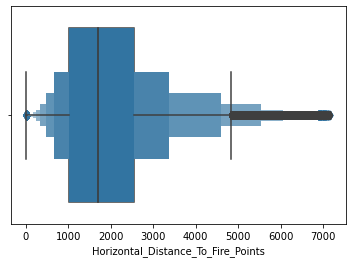

--------------------------------------
'Wilderness_Area1'


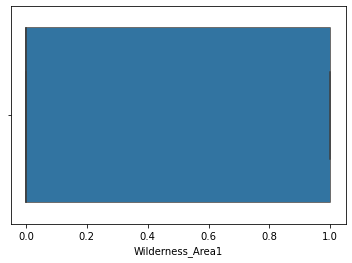

--------------------------------------
'Wilderness_Area2'


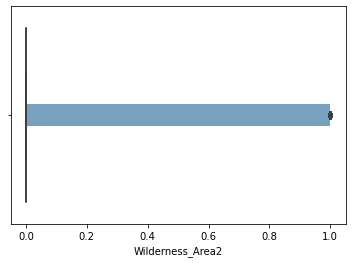

--------------------------------------
'Wilderness_Area3'


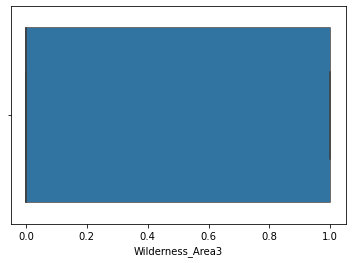

--------------------------------------
'Wilderness_Area4'


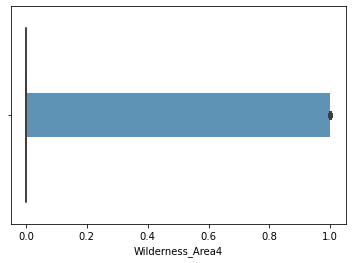

--------------------------------------
'Soil_Type1'


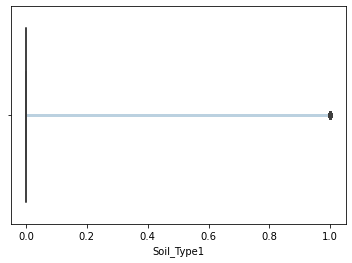

--------------------------------------
'Soil_Type2'


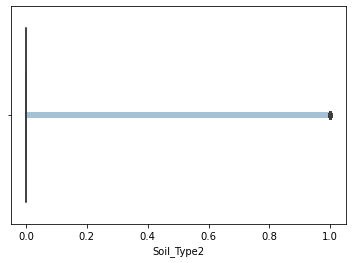

--------------------------------------
'Soil_Type3'


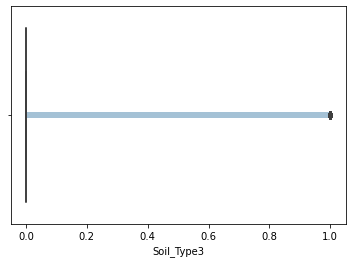

--------------------------------------
'Soil_Type4'


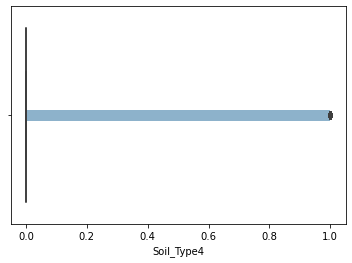

--------------------------------------
'Soil_Type5'


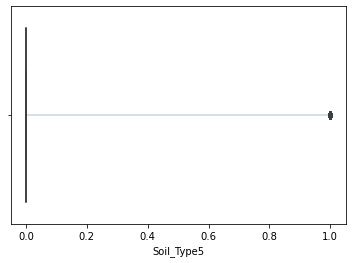

--------------------------------------
'Soil_Type6'


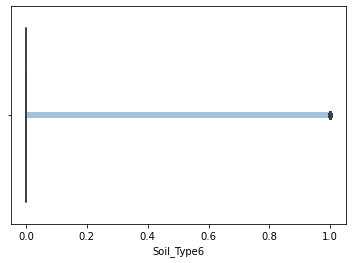

--------------------------------------
'Soil_Type10'


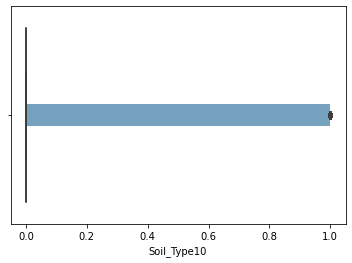

--------------------------------------
'Soil_Type11'


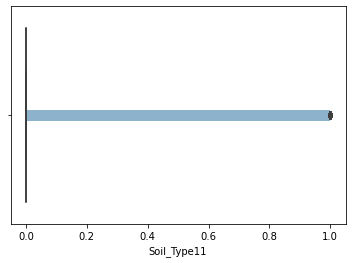

--------------------------------------
'Soil_Type12'


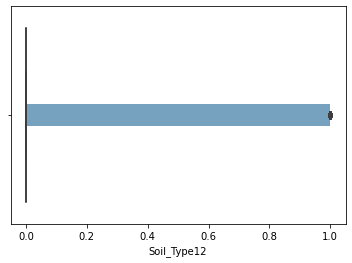

--------------------------------------
'Soil_Type17'


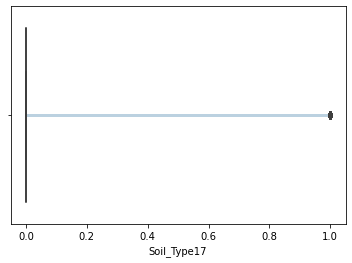

--------------------------------------
'Soil_Type19'


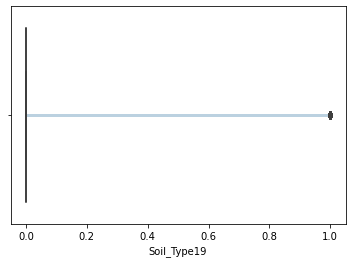

--------------------------------------
'Soil_Type20'


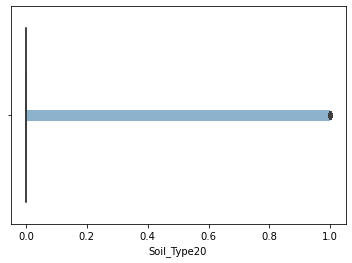

--------------------------------------
'Soil_Type22'


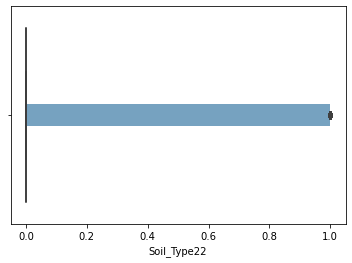

--------------------------------------
'Soil_Type23'


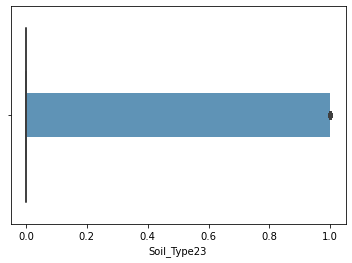

--------------------------------------
'Soil_Type24'


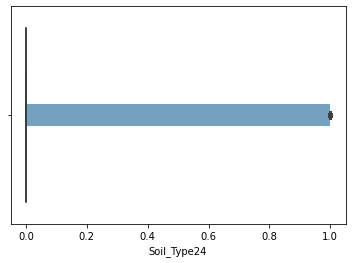

--------------------------------------
'Soil_Type29'


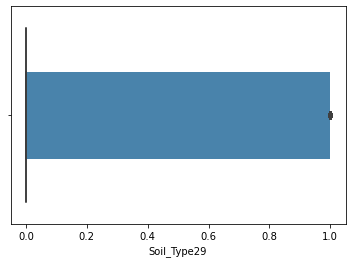

--------------------------------------
'Soil_Type31'


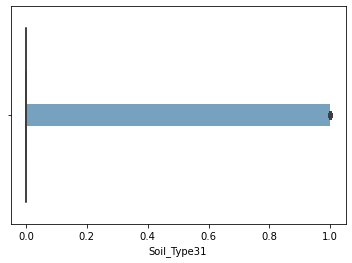

--------------------------------------
'Soil_Type32'


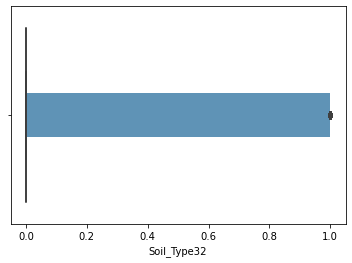

--------------------------------------
'Soil_Type33'


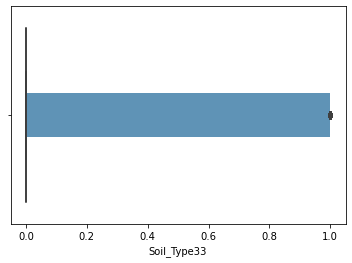

--------------------------------------
'Soil_Type35'


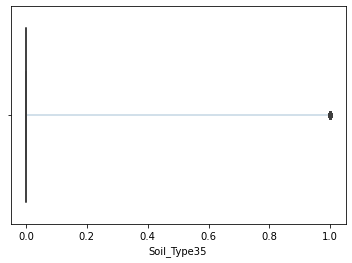

--------------------------------------
'Soil_Type38'


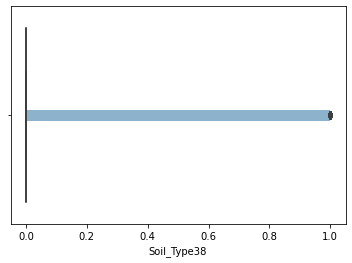

--------------------------------------
'Soil_Type39'


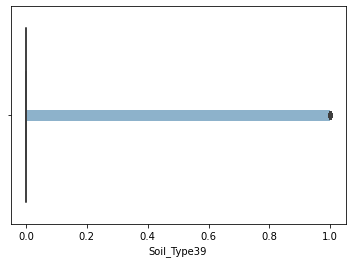

--------------------------------------
'Soil_Type40'


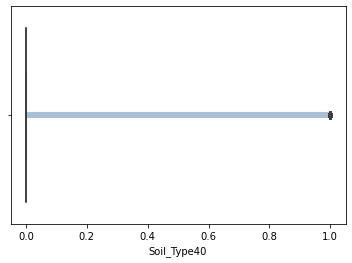

--------------------------------------
'Cover_Type'


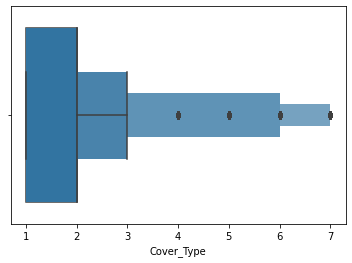

--------------------------------------


In [14]:
for i in df2.columns:
    print("'" + i +"'")
    sns.boxplot(df2[i])
    sns.boxenplot(df2[i])
    plt.show()
    print("--------------------------------------")

In [15]:
for i in df2.columns:
    print(i)
    print(df2[i].value_counts())
    print("--------------------------------------")

Elevation
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
        ... 
1874       1
3771       1
1881       1
3767       1
3768       1
Name: Elevation, Length: 1978, dtype: int64
--------------------------------------
Aspect
45     6308
0      4914
90     4677
135    3834
63     3680
       ... 
269     625
244     587
224     506
226     499
360      51
Name: Aspect, Length: 361, dtype: int64
--------------------------------------
Slope
11    33824
10    33812
12    33217
13    32419
9     32049
      ...  
60        2
58        1
63        1
64        1
66        1
Name: Slope, Length: 67, dtype: int64
--------------------------------------
Horizontal_Distance_To_Hydrology
30      34139
0       24603
150     20785
60      19189
67      15223
        ...  
1191        1
1296        1
1293        1
1240        1
1299        1
Name: Horizontal_Distance_To_Hydrology, Length: 551, dtype: int64
--------------------------------------
Vertical_Distance_To_Hydrology
0      3

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Auto Scout)* are given below.

In [16]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [17]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
        
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()
def outlier_inspect_whis_3(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
        
    plt.subplot(1,3,2)
    sns.boxplot(df[col],whis=3)
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

Elevation


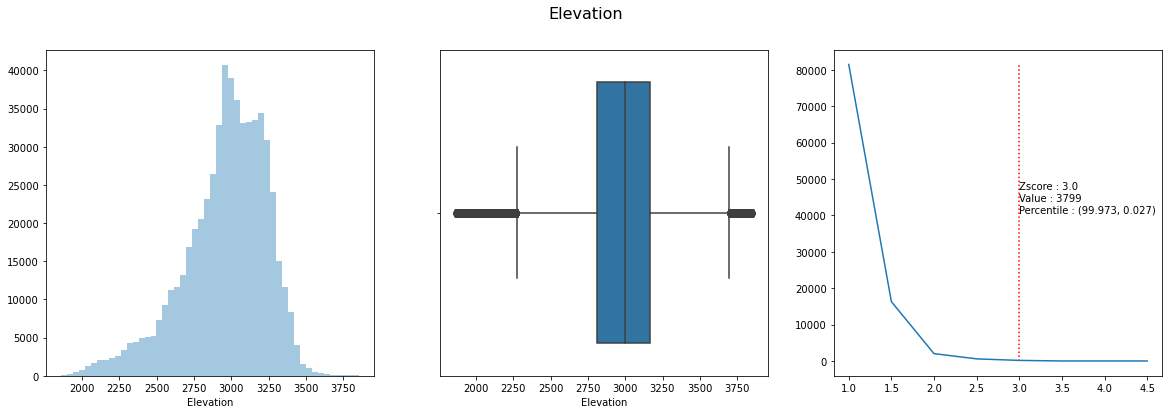

--------------------------------------
Aspect


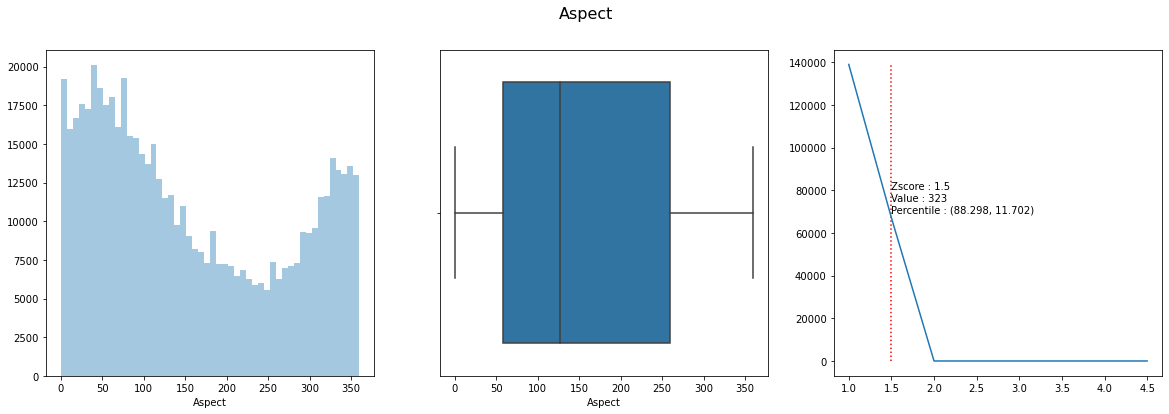

--------------------------------------
Slope


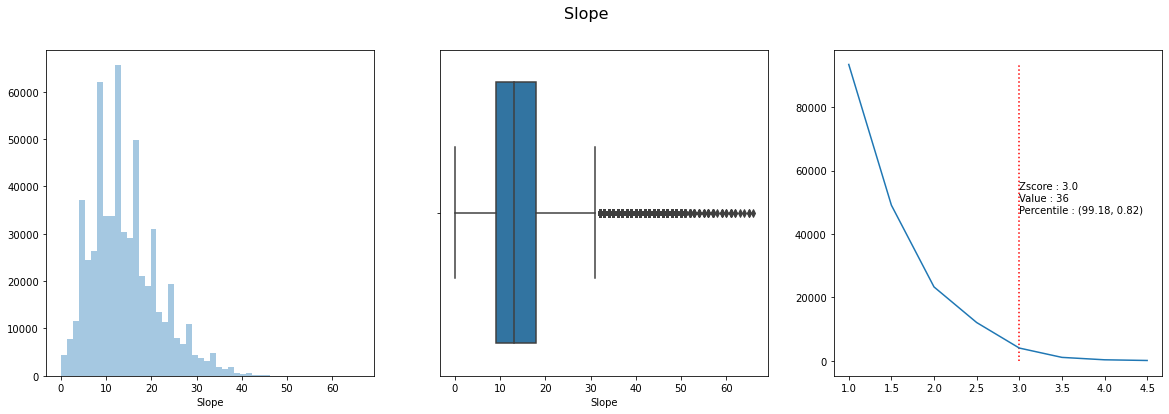

--------------------------------------
Horizontal_Distance_To_Hydrology


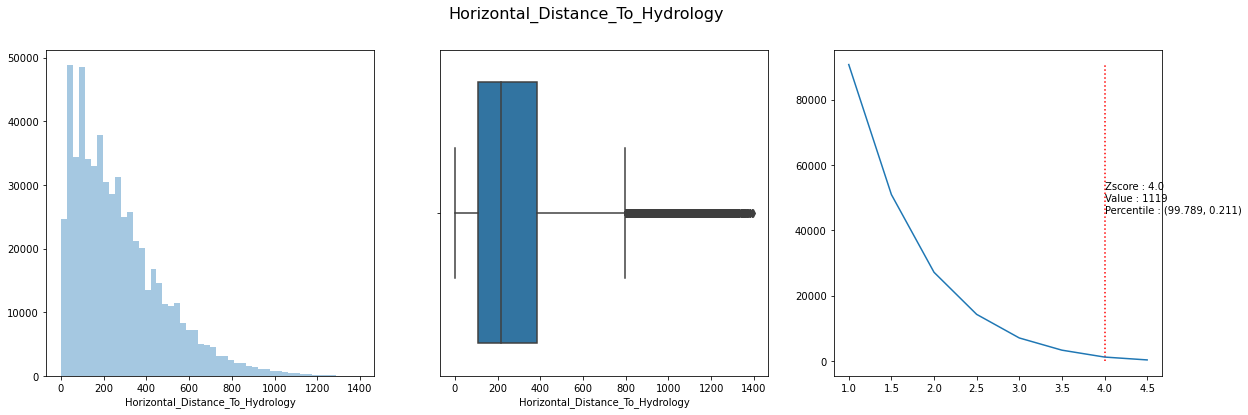

--------------------------------------
Vertical_Distance_To_Hydrology


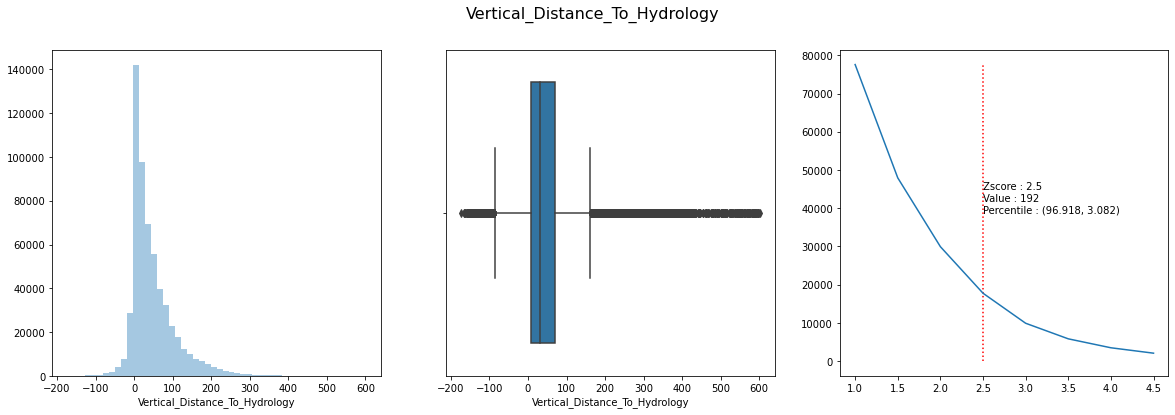

--------------------------------------
Horizontal_Distance_To_Roadways


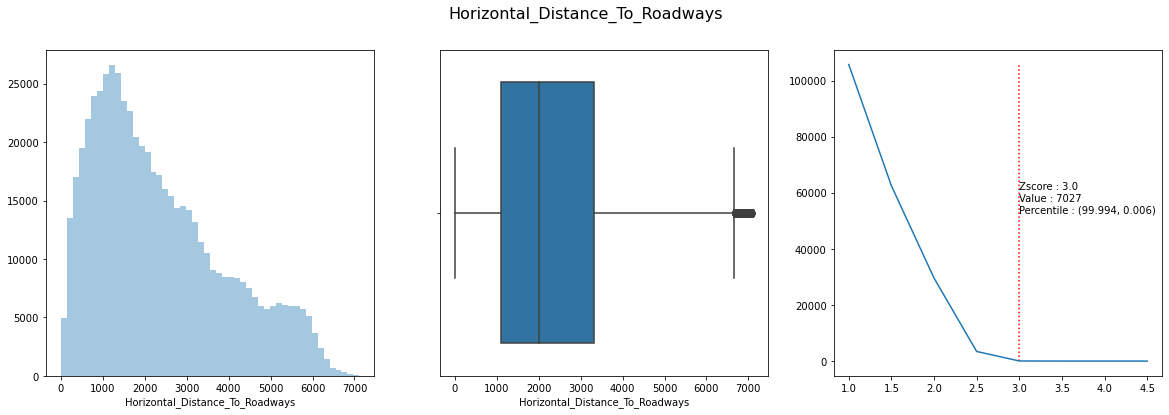

--------------------------------------
Hillshade_9am


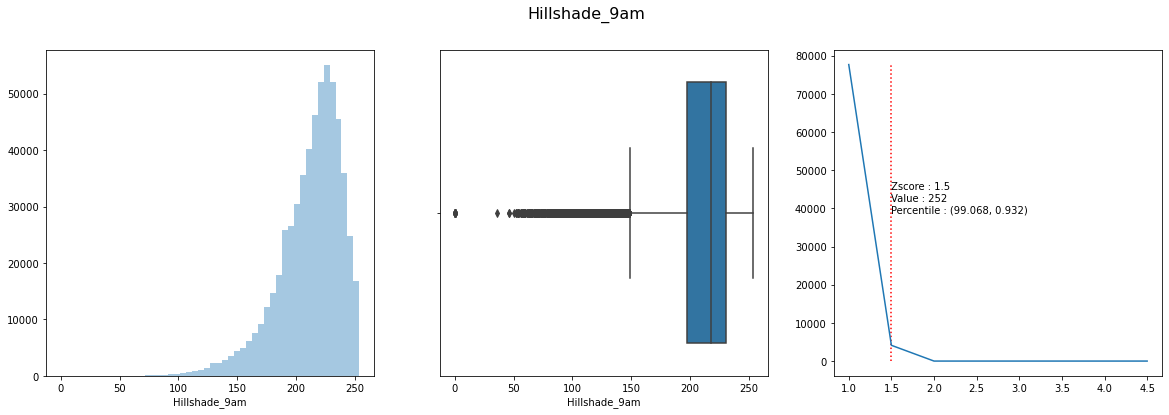

--------------------------------------
Hillshade_Noon


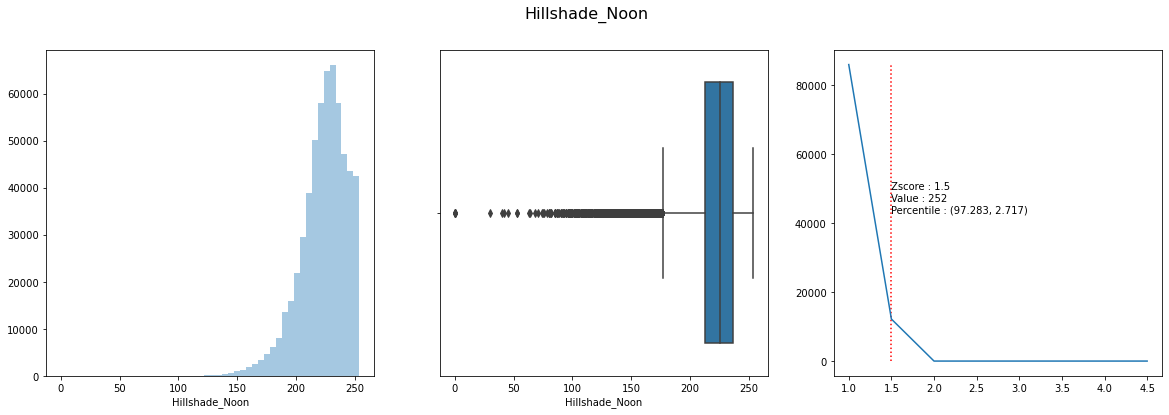

--------------------------------------
Hillshade_3pm


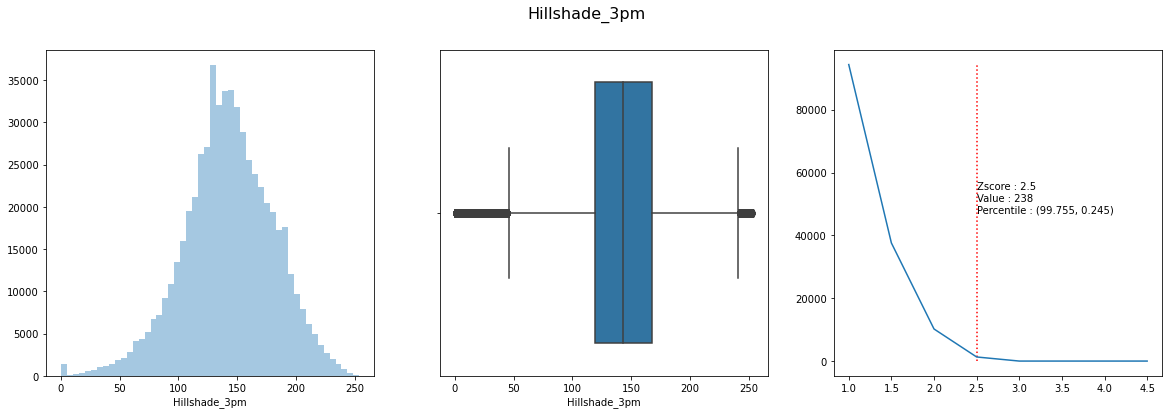

--------------------------------------
Horizontal_Distance_To_Fire_Points


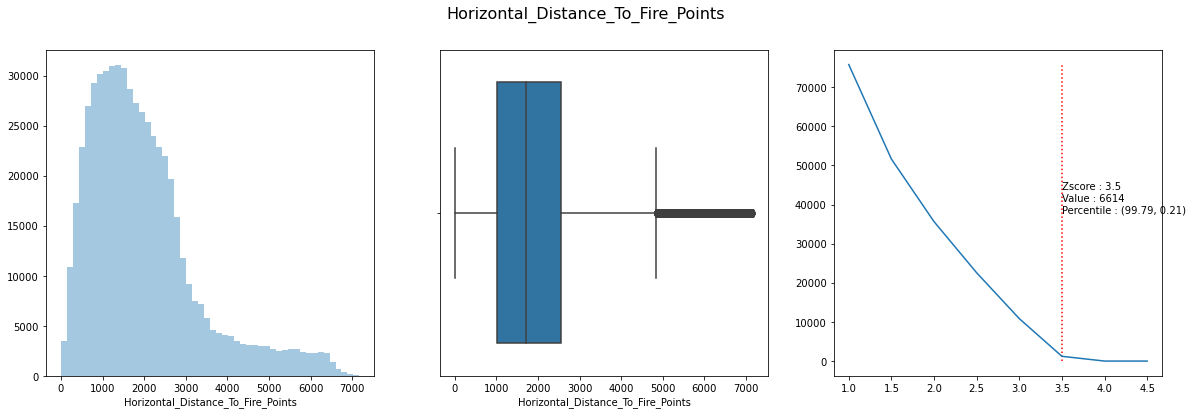

--------------------------------------
Wilderness_Area1


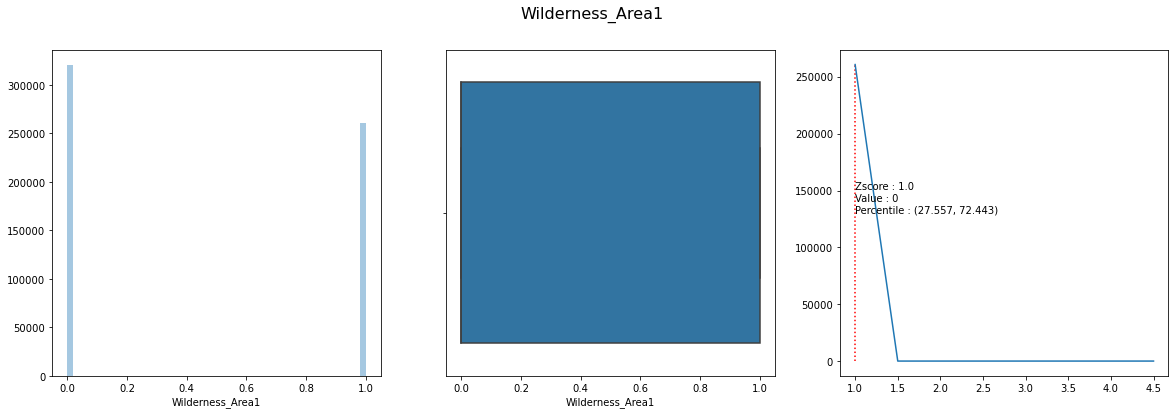

--------------------------------------
Wilderness_Area2


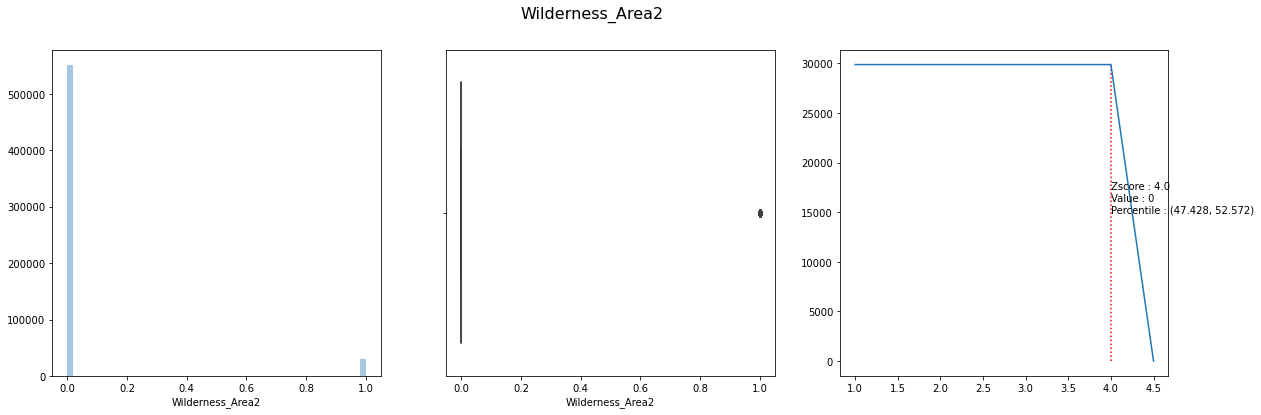

--------------------------------------
Wilderness_Area3


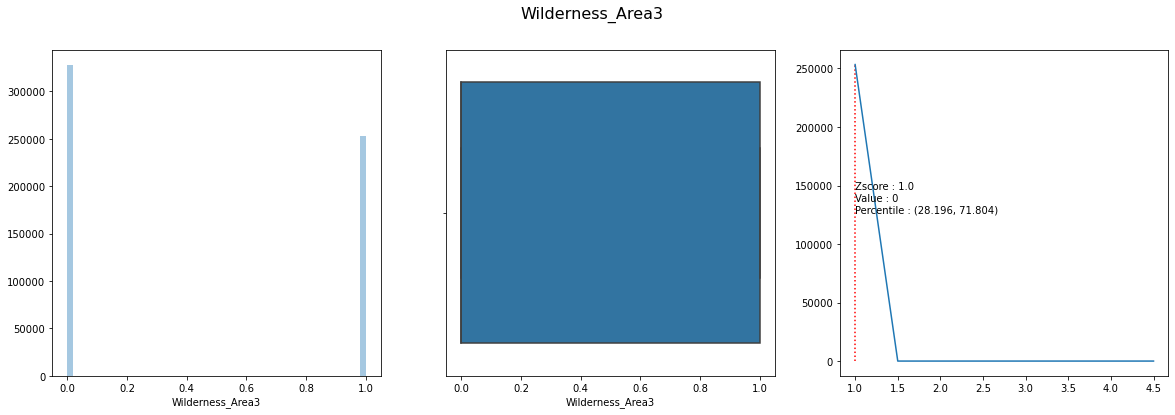

--------------------------------------
Wilderness_Area4


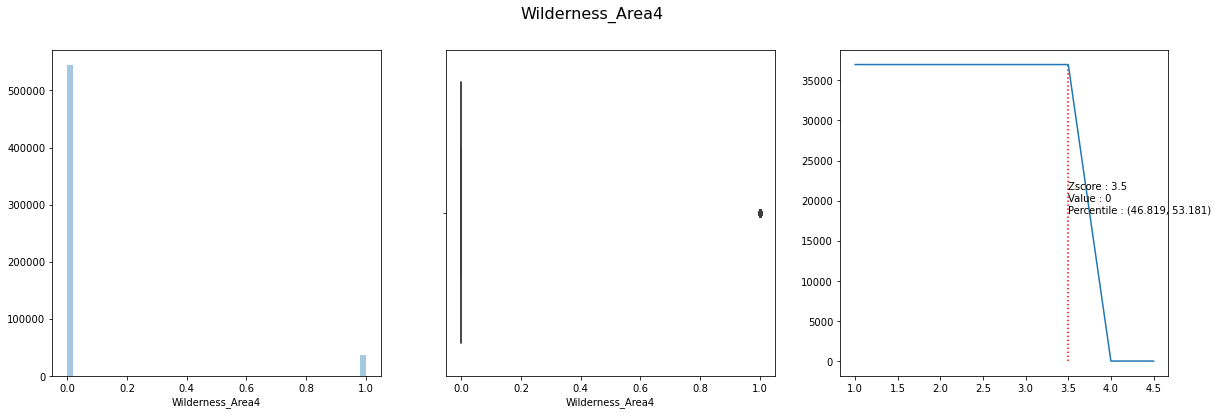

--------------------------------------
Soil_Type1


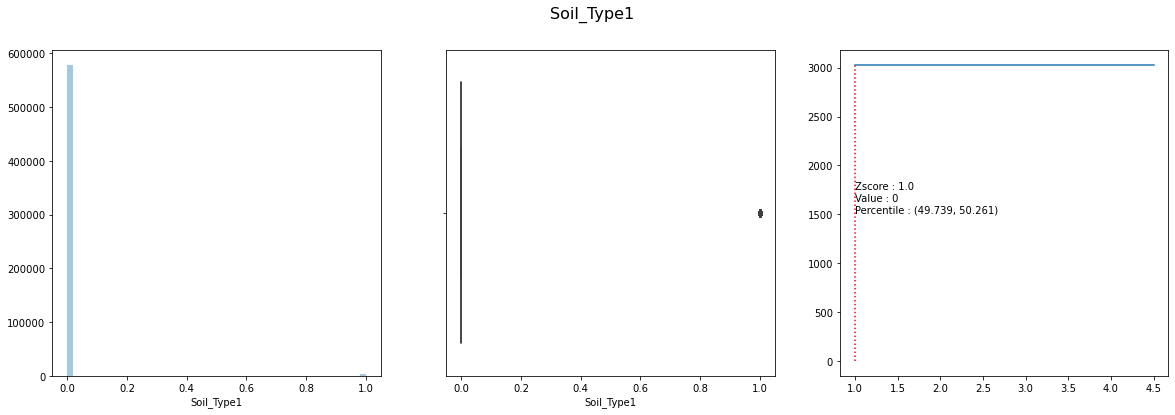

--------------------------------------
Soil_Type2


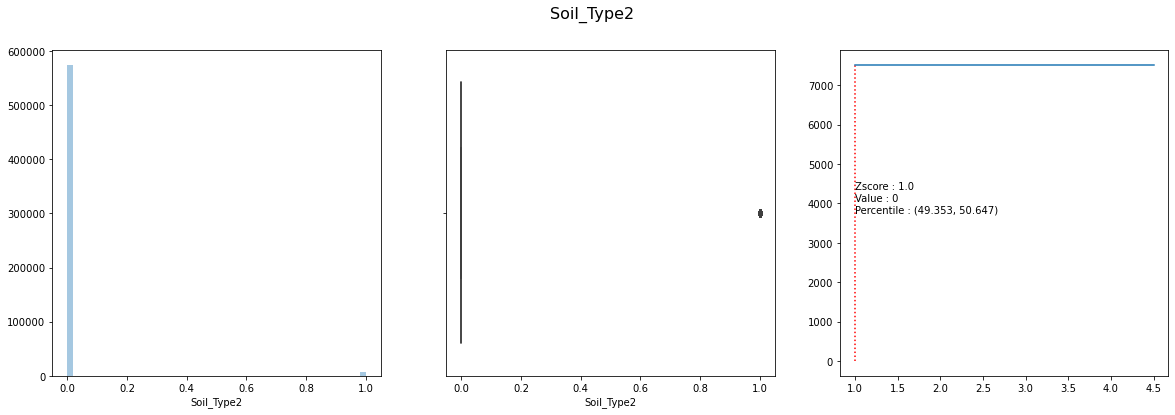

--------------------------------------
Soil_Type3


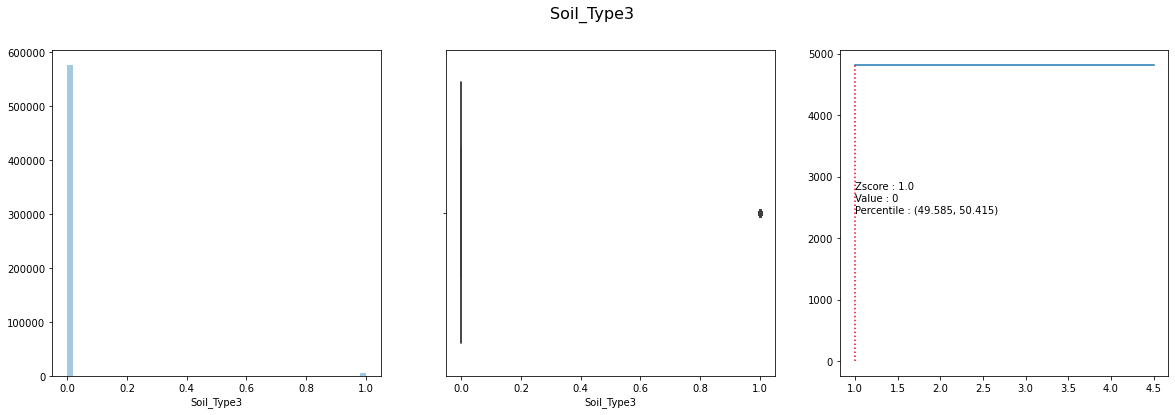

--------------------------------------
Soil_Type4


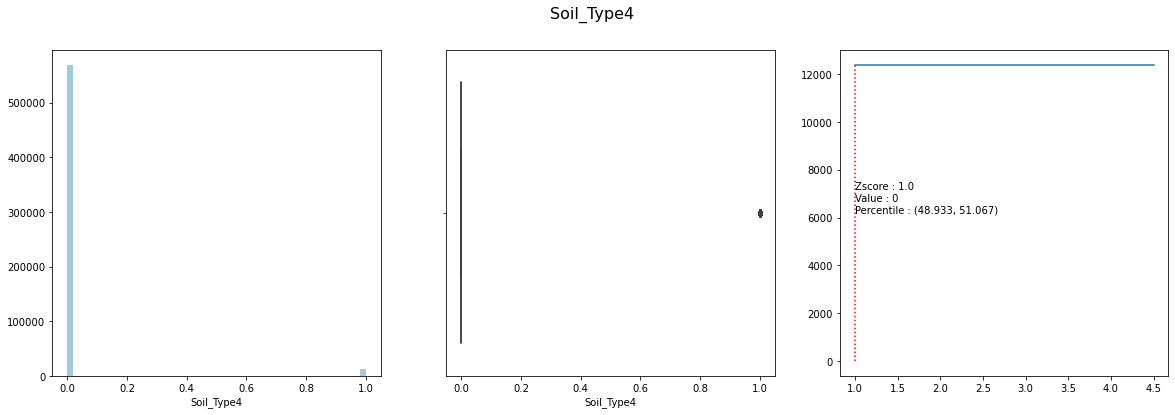

--------------------------------------
Soil_Type5


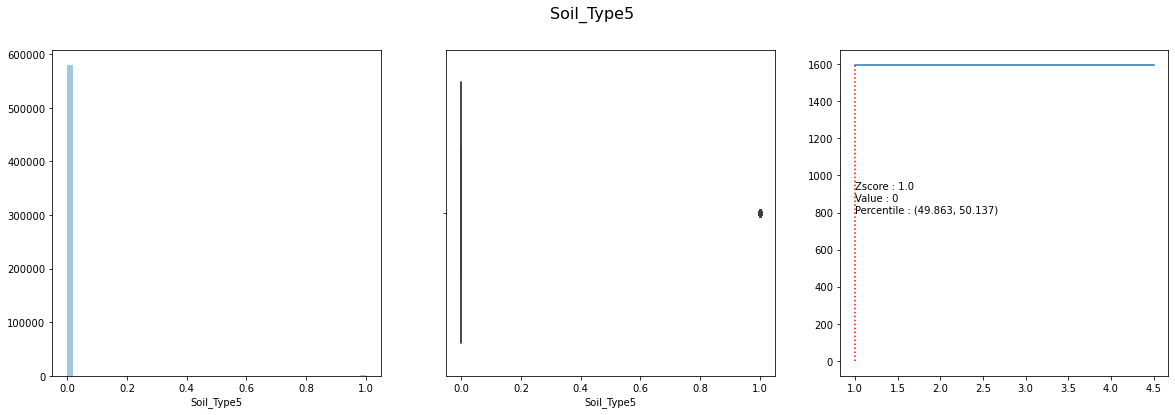

--------------------------------------
Soil_Type6


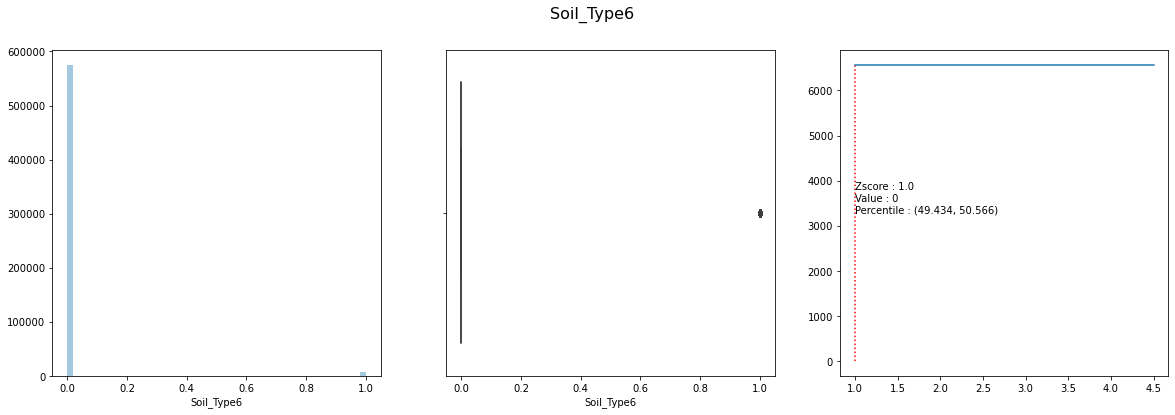

--------------------------------------
Soil_Type10


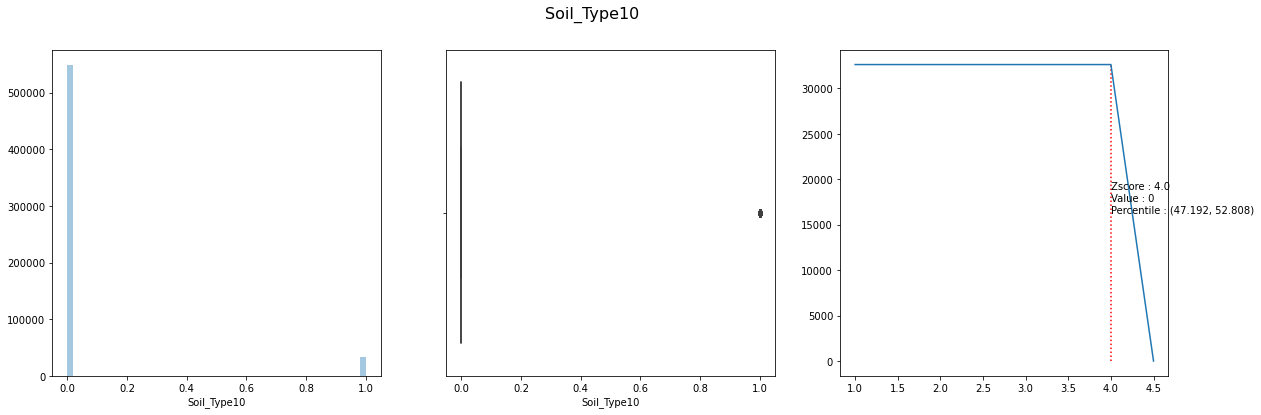

--------------------------------------
Soil_Type11


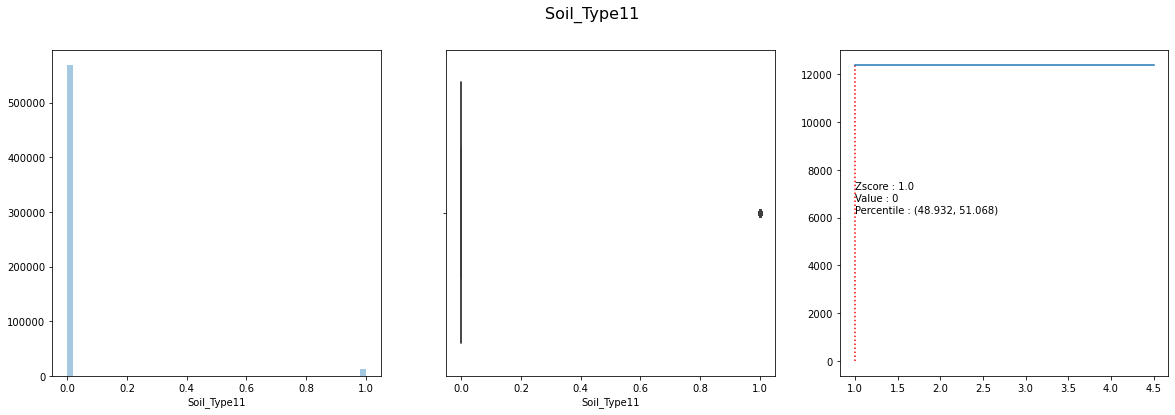

--------------------------------------
Soil_Type12


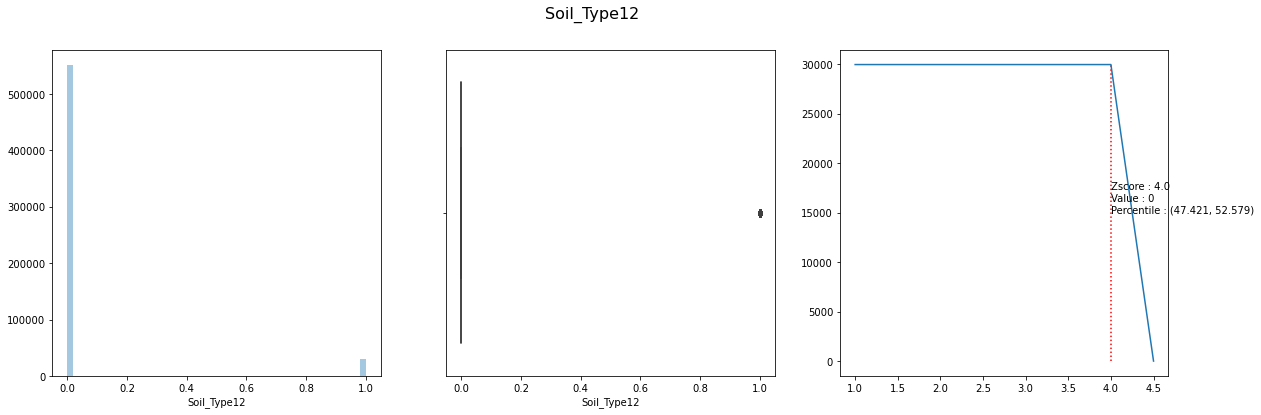

--------------------------------------
Soil_Type17


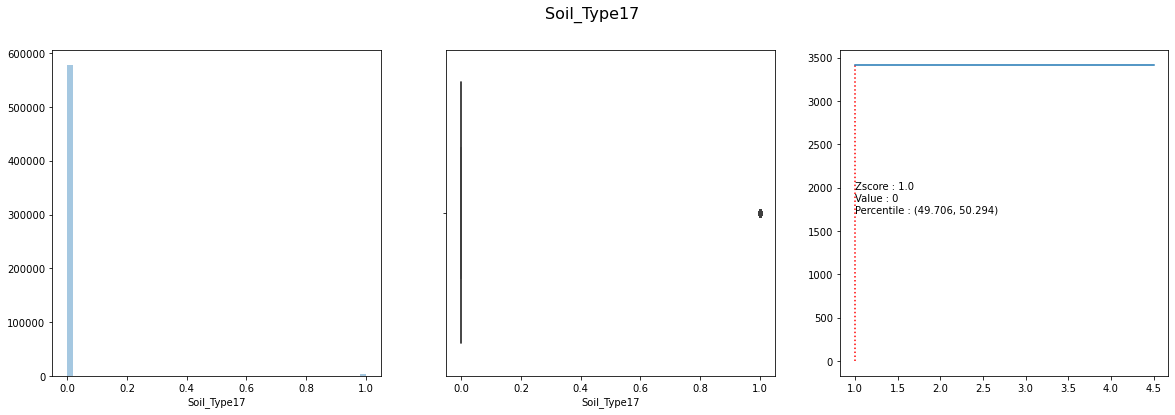

--------------------------------------
Soil_Type19


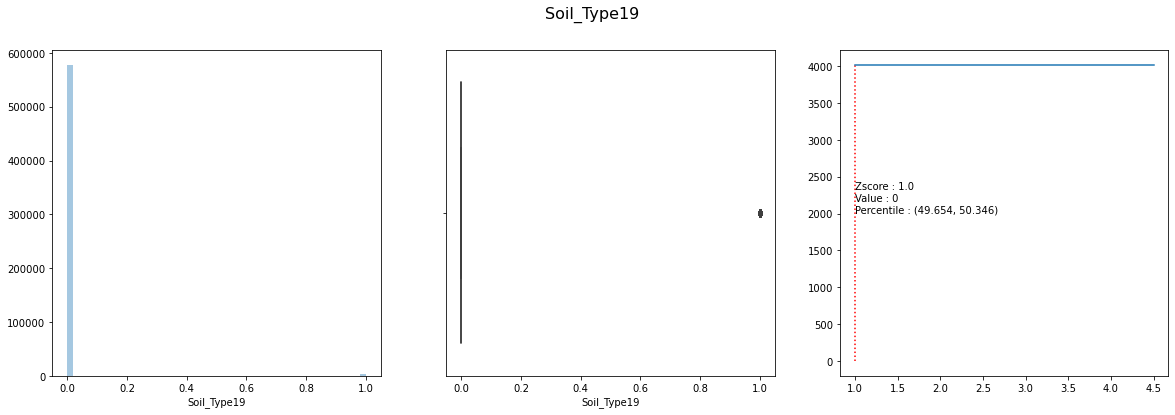

--------------------------------------
Soil_Type20


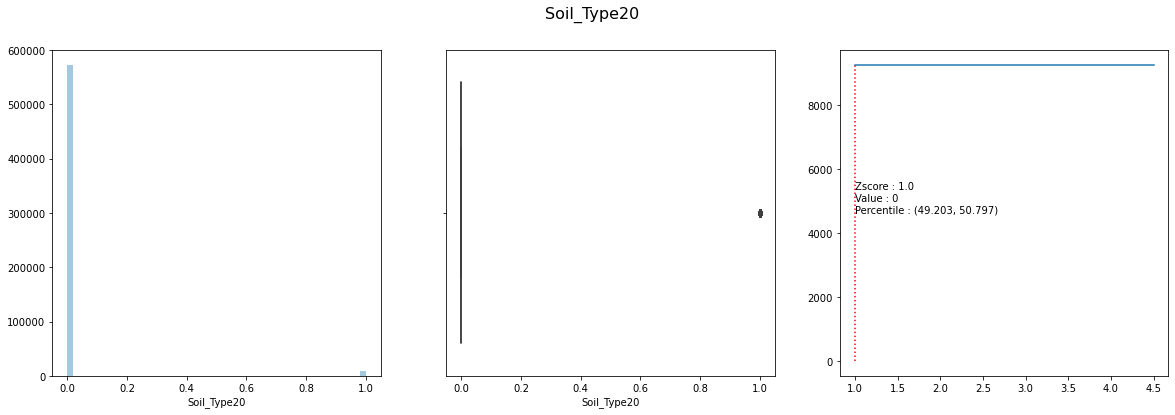

--------------------------------------
Soil_Type22


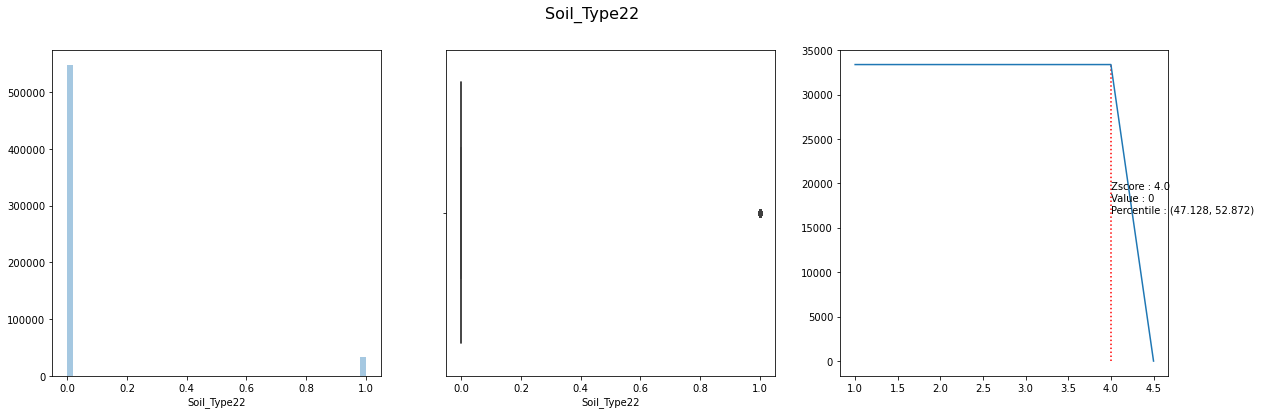

--------------------------------------
Soil_Type23


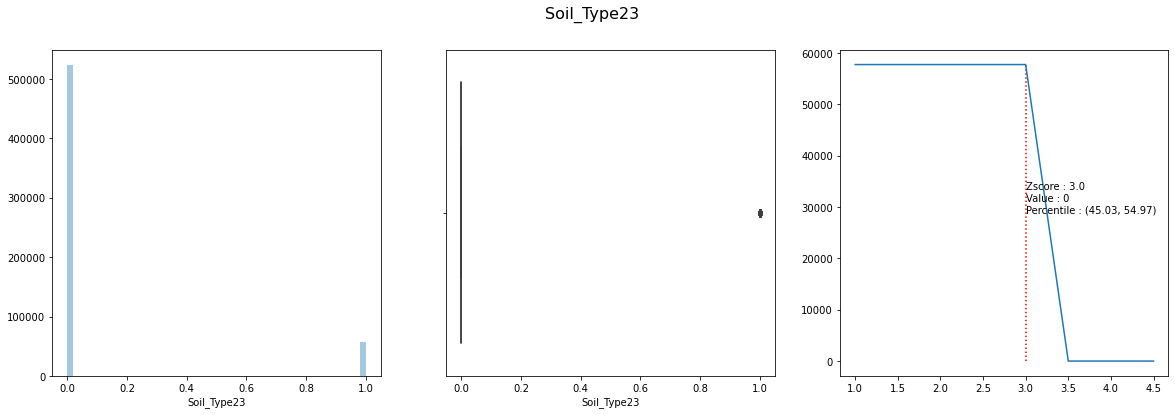

--------------------------------------
Soil_Type24


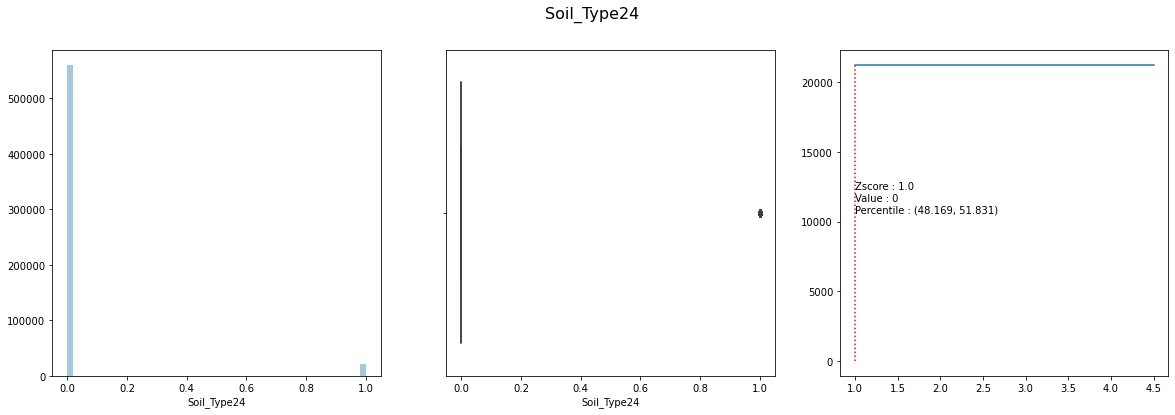

--------------------------------------
Soil_Type29


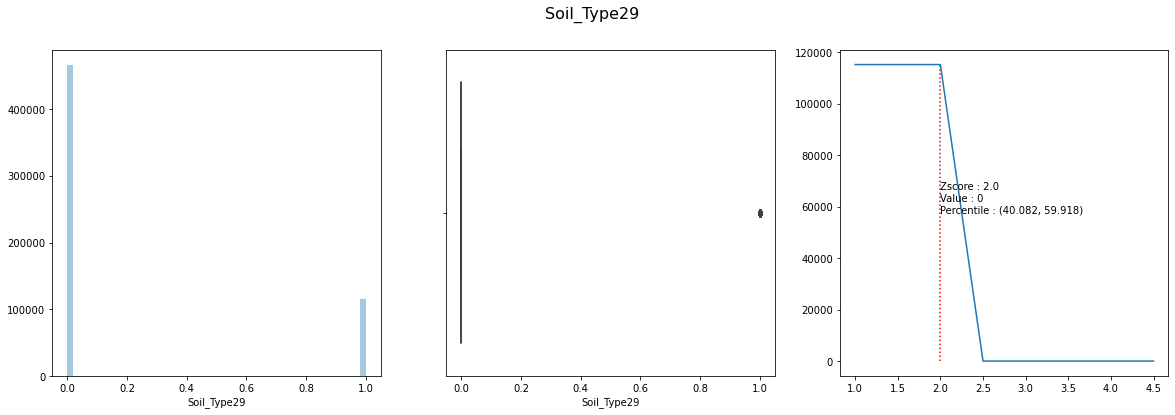

--------------------------------------
Soil_Type31


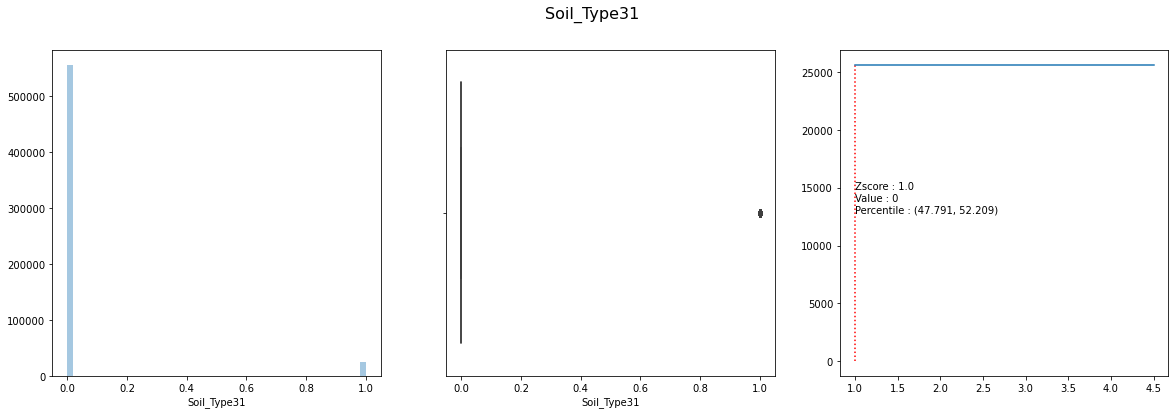

--------------------------------------
Soil_Type32


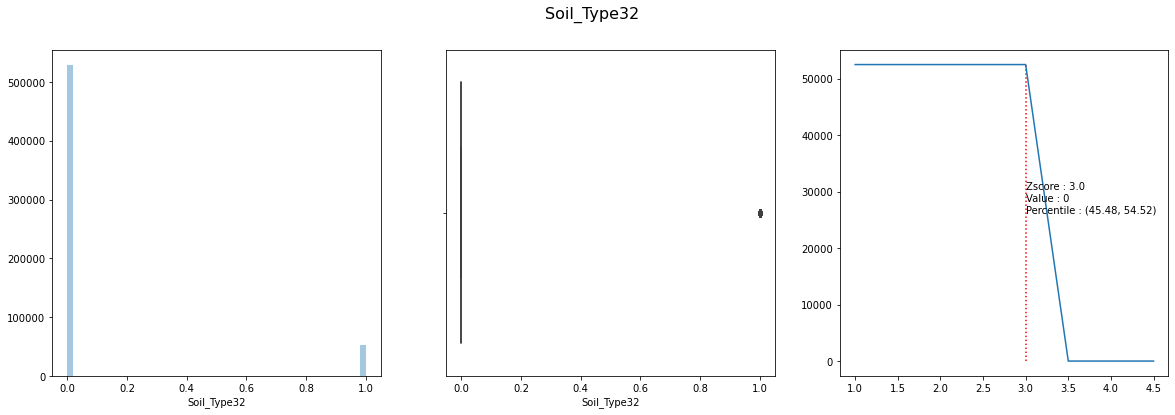

--------------------------------------
Soil_Type33


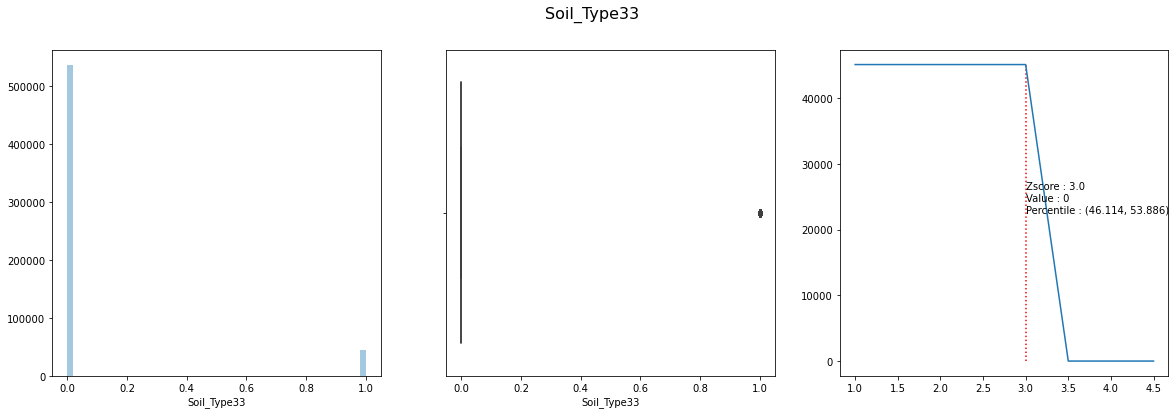

--------------------------------------
Soil_Type35


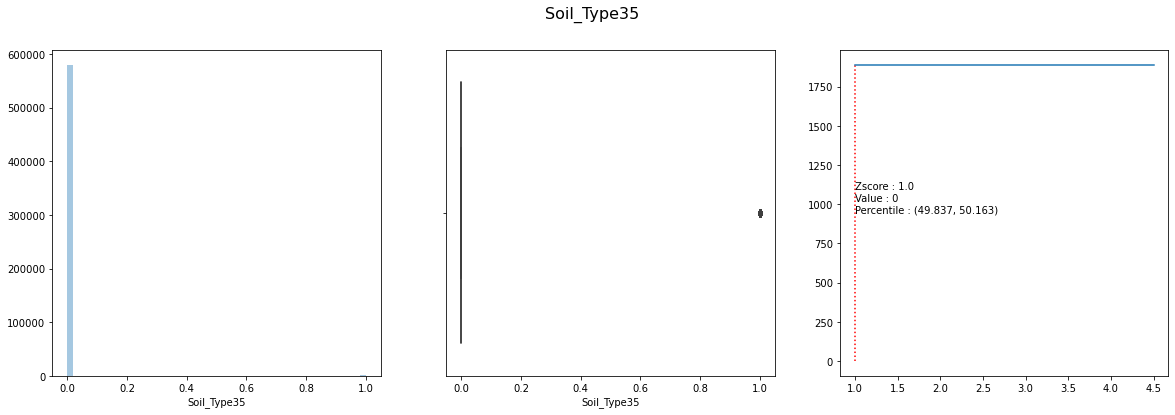

--------------------------------------
Soil_Type38


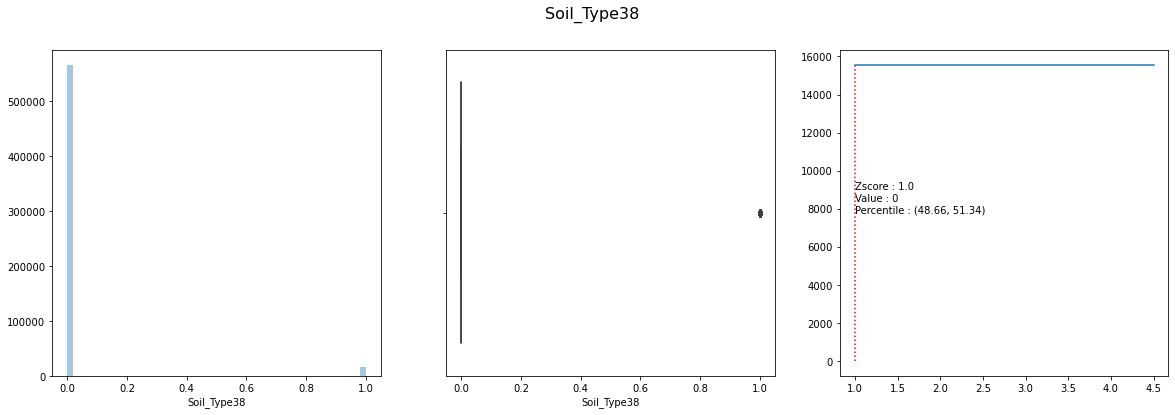

--------------------------------------
Soil_Type39


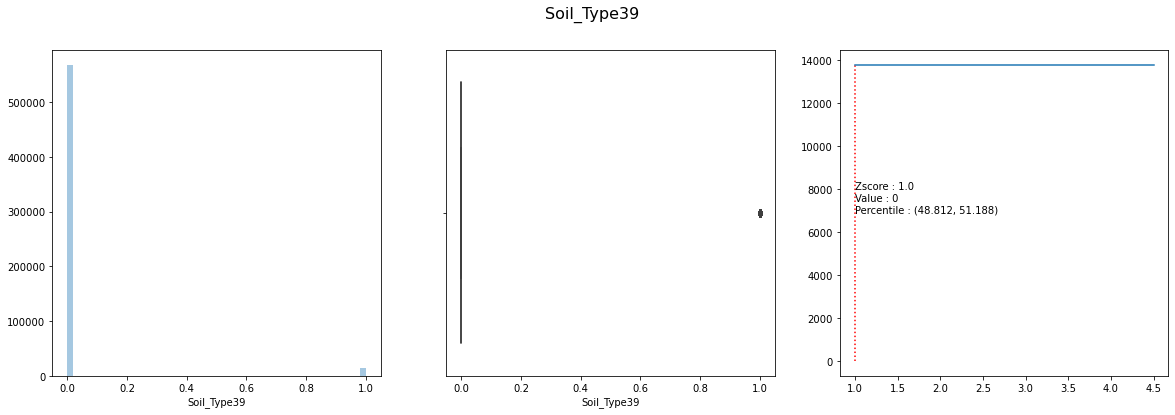

--------------------------------------
Soil_Type40


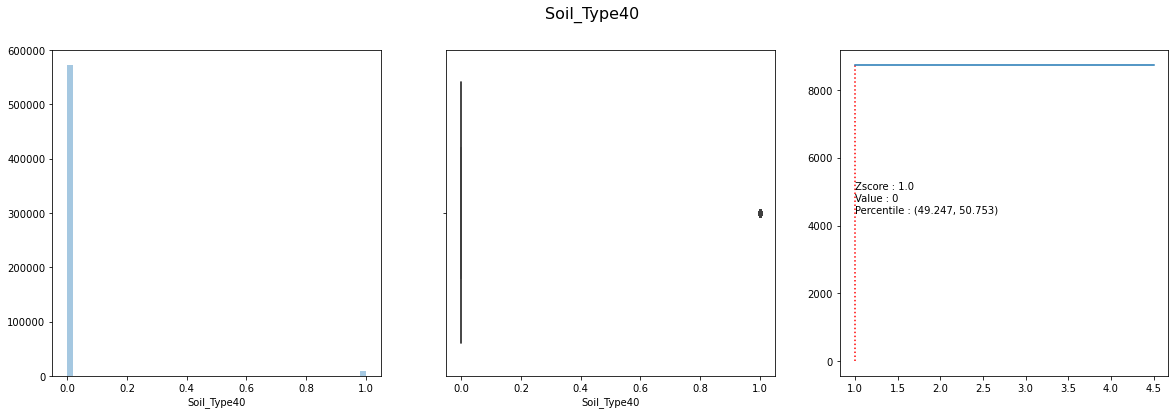

--------------------------------------
Cover_Type


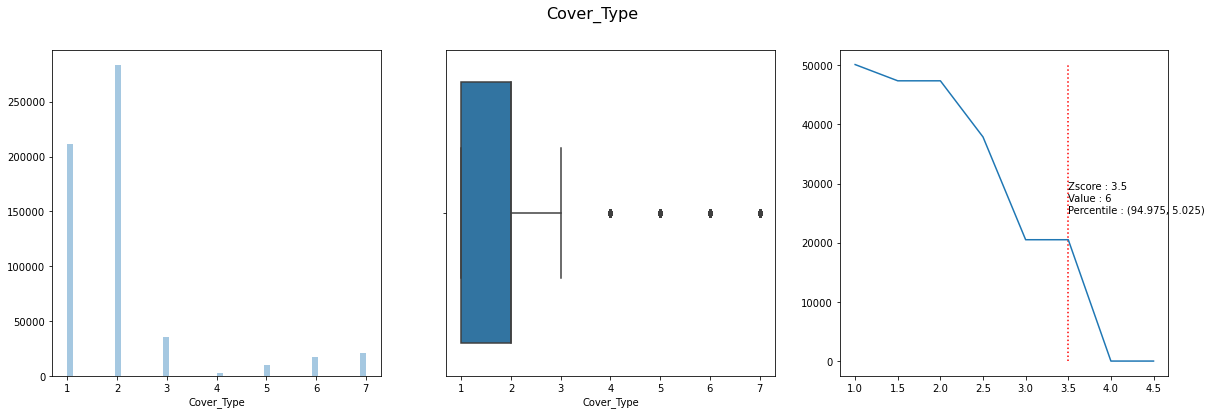

--------------------------------------


In [18]:
for i in df2.columns:
    print(i)
    outlier_inspect(df2, i)
    plt.show()
    print("--------------------------------------")

"""x1 = df2[df2['Cover_Type'].isin([1,2])]
for i in x1.columns:
    print(i)
    outlier_inspect(x1, i)
    print("--------------------------------------")"""

"""check_deeply = ['Elevation','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm'
               'Horizontal_Distance_To_Fire_Points',]"""

Wilderness_Area1


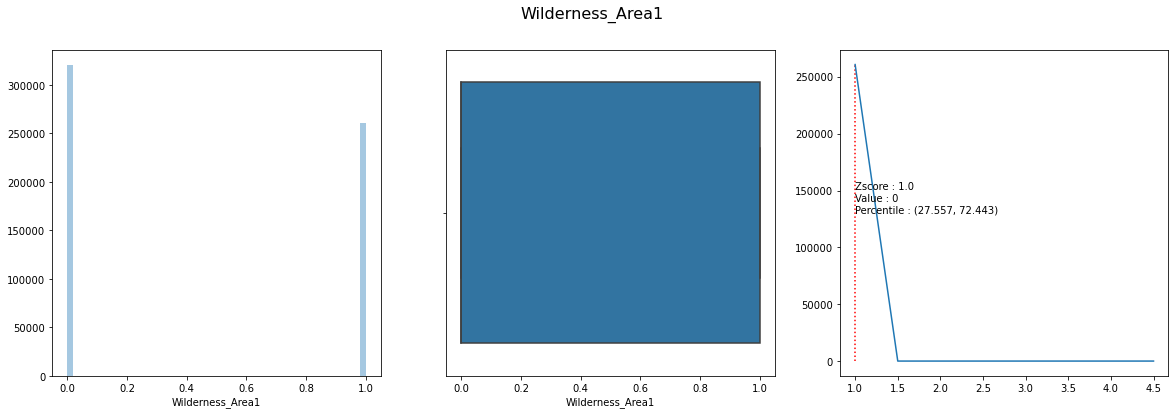

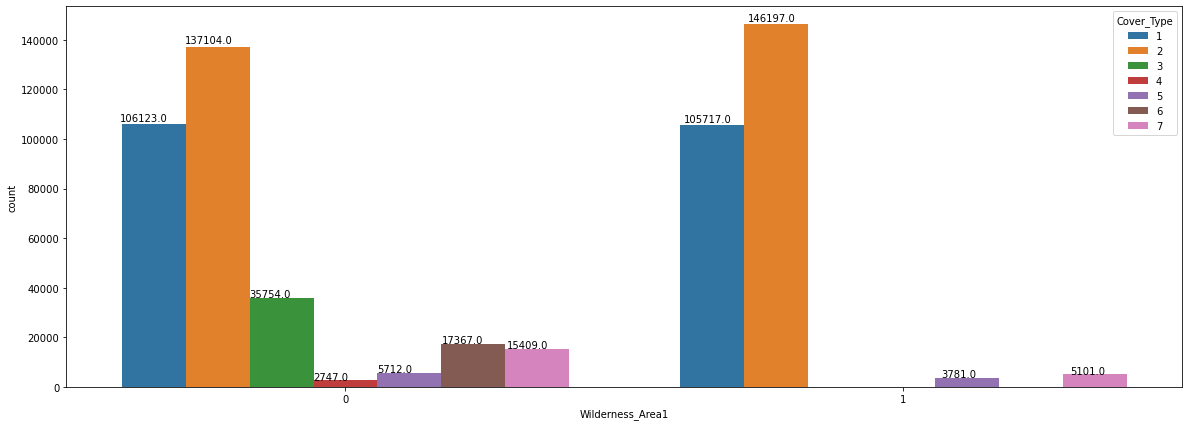

--------------------------------------
Wilderness_Area2


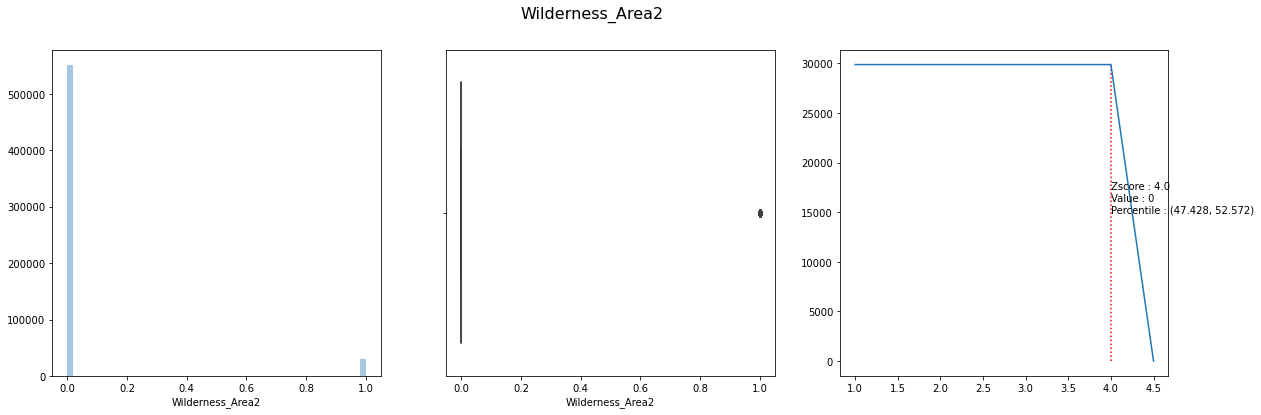

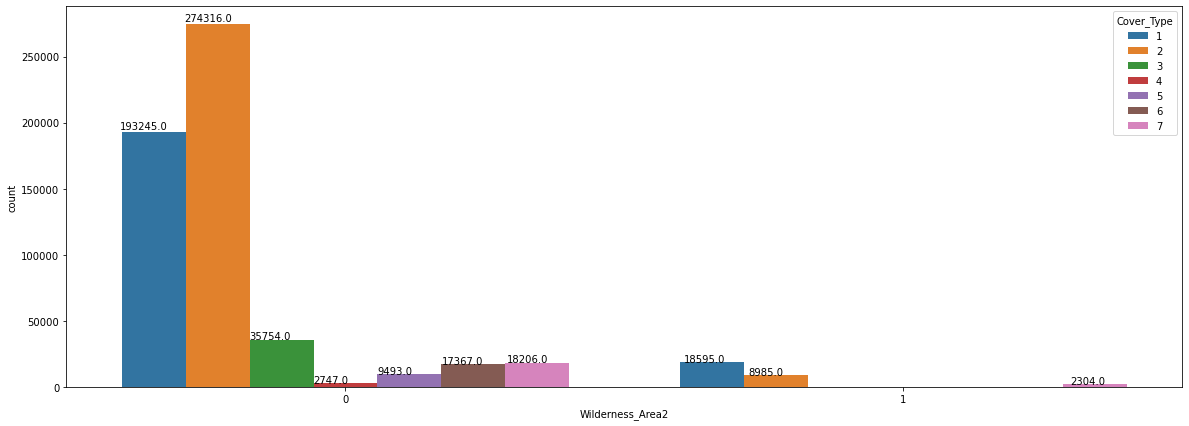

--------------------------------------
Wilderness_Area3


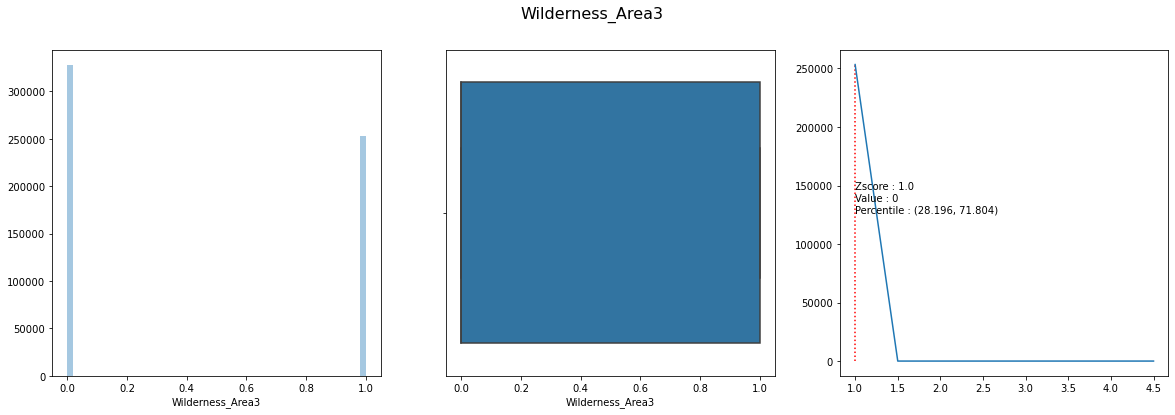

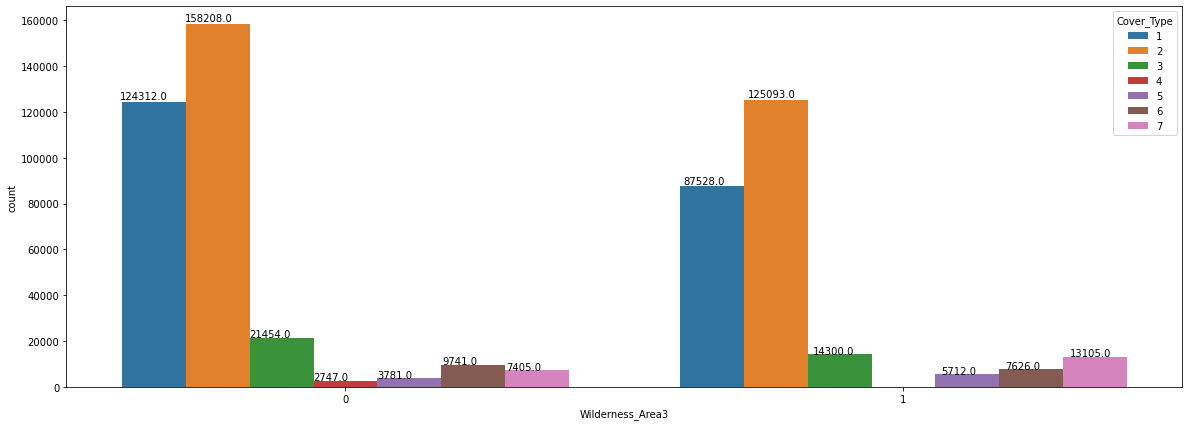

--------------------------------------
Wilderness_Area4


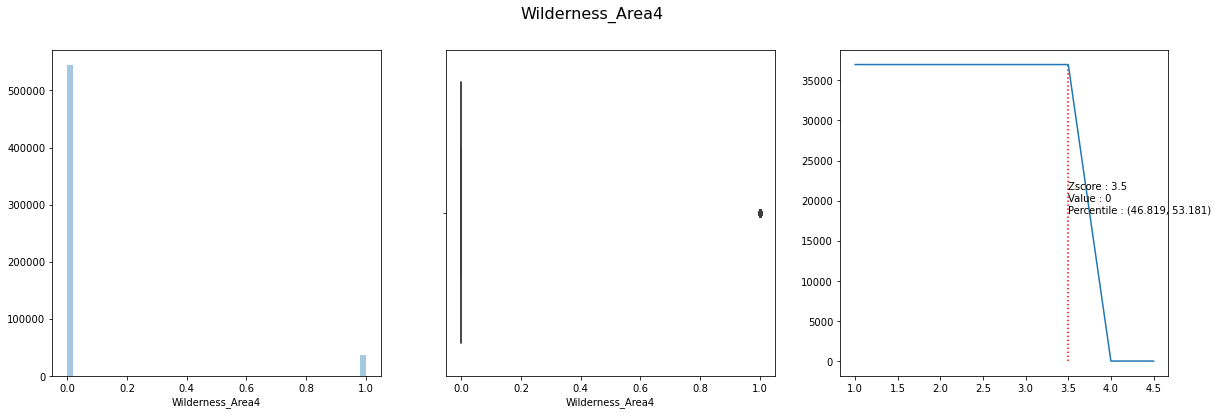

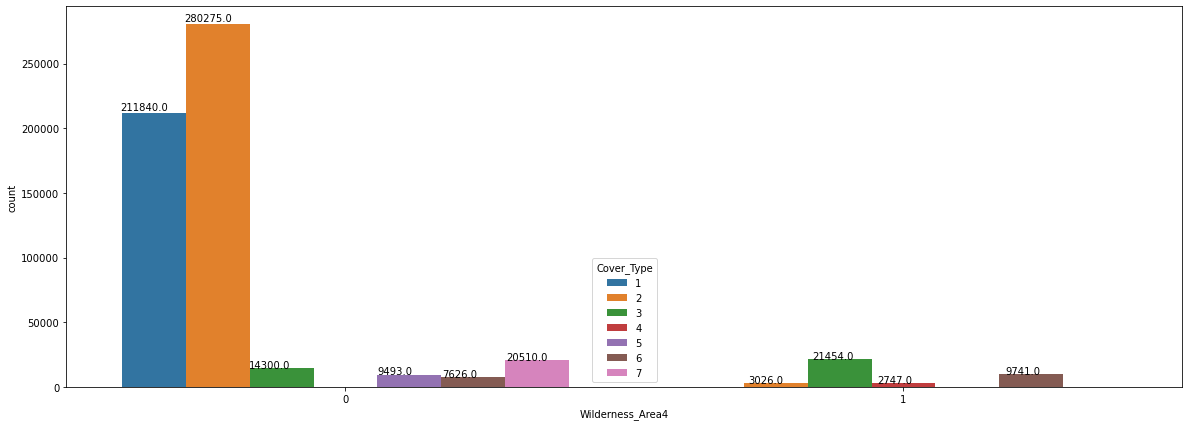

--------------------------------------
Soil_Type1


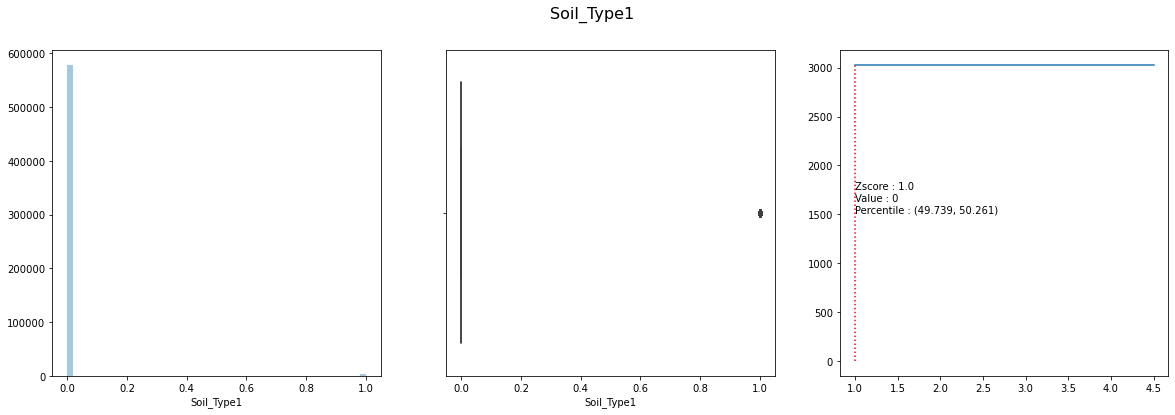

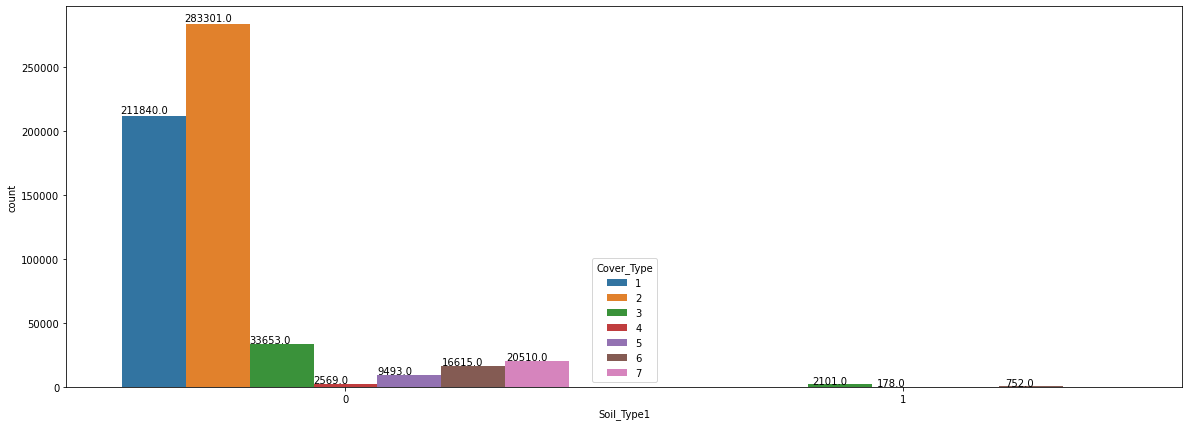

--------------------------------------
Soil_Type2


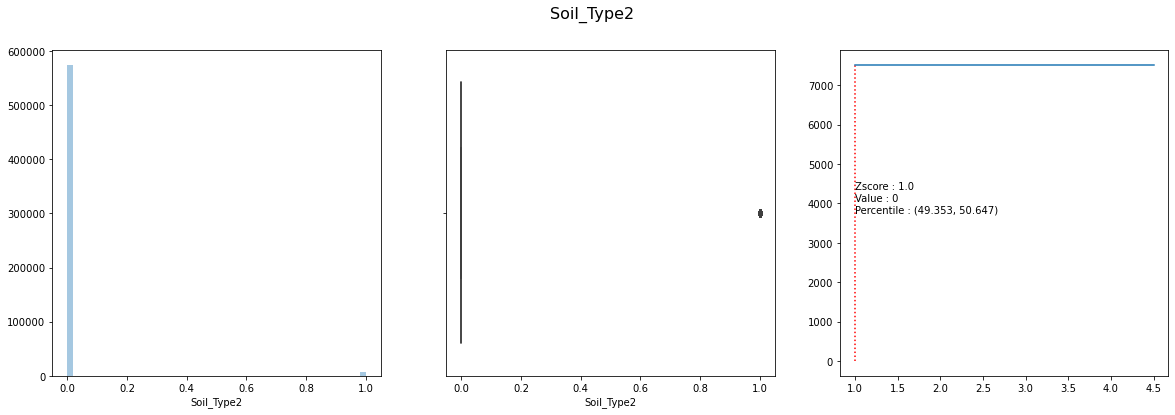

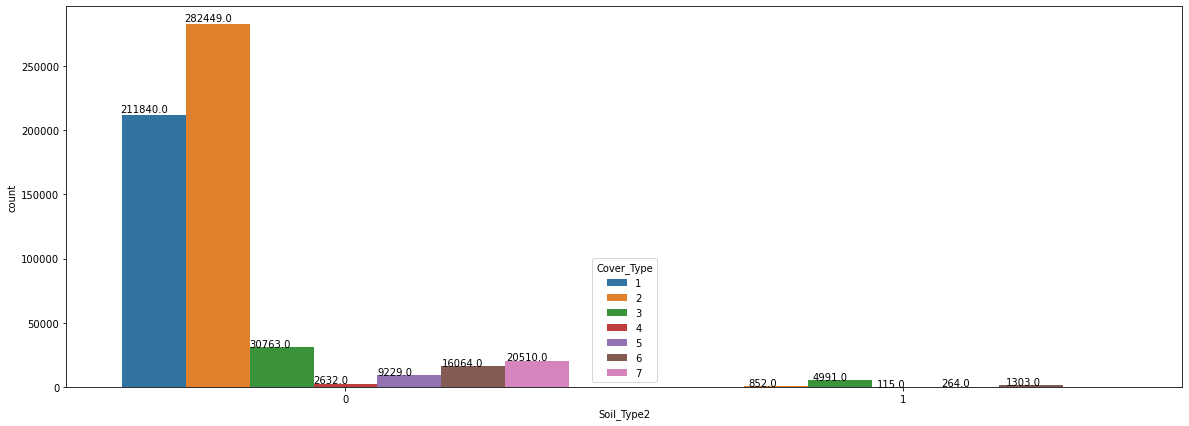

--------------------------------------
Soil_Type3


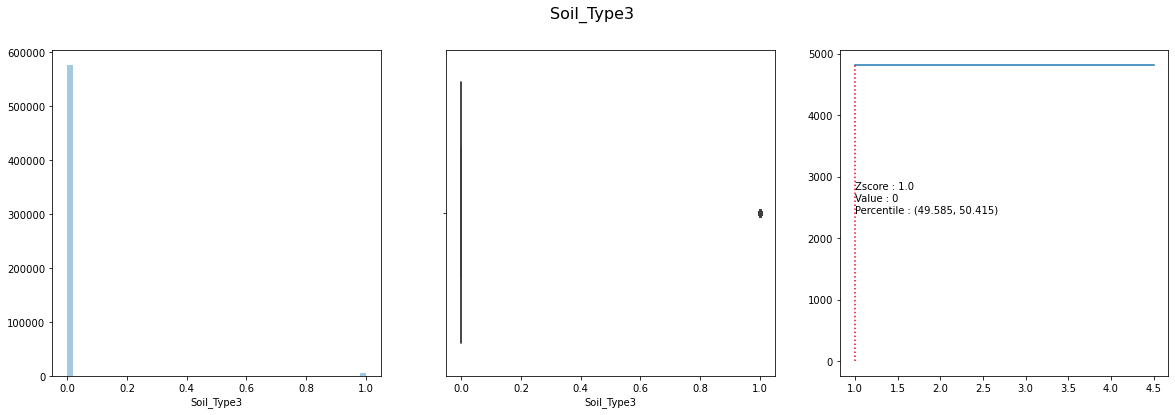

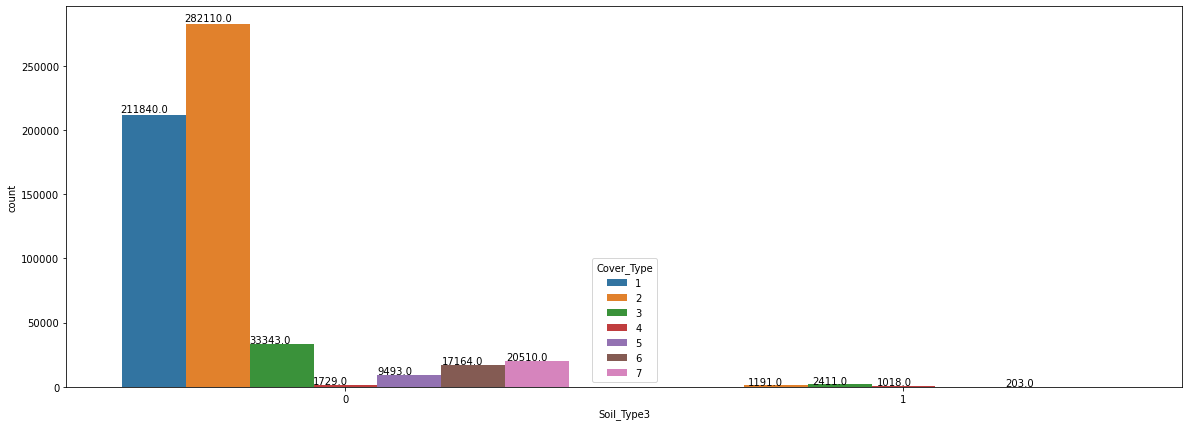

--------------------------------------
Soil_Type4


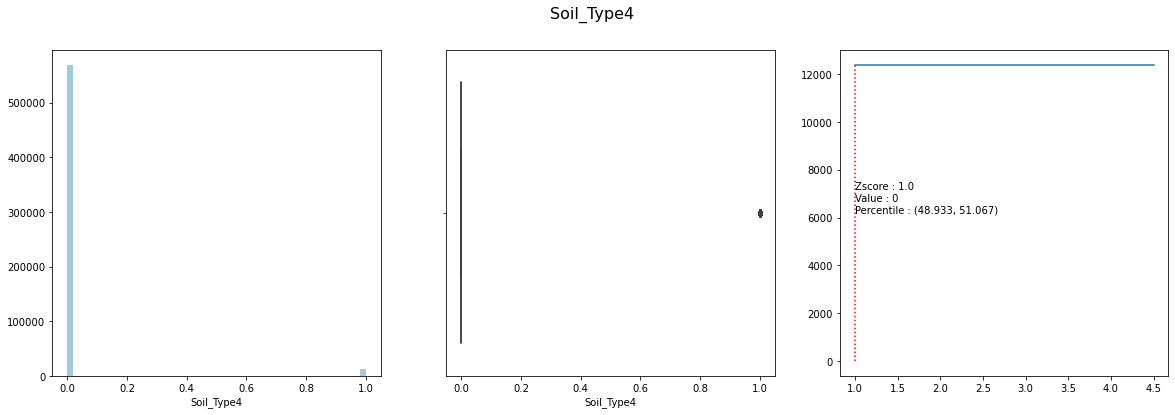

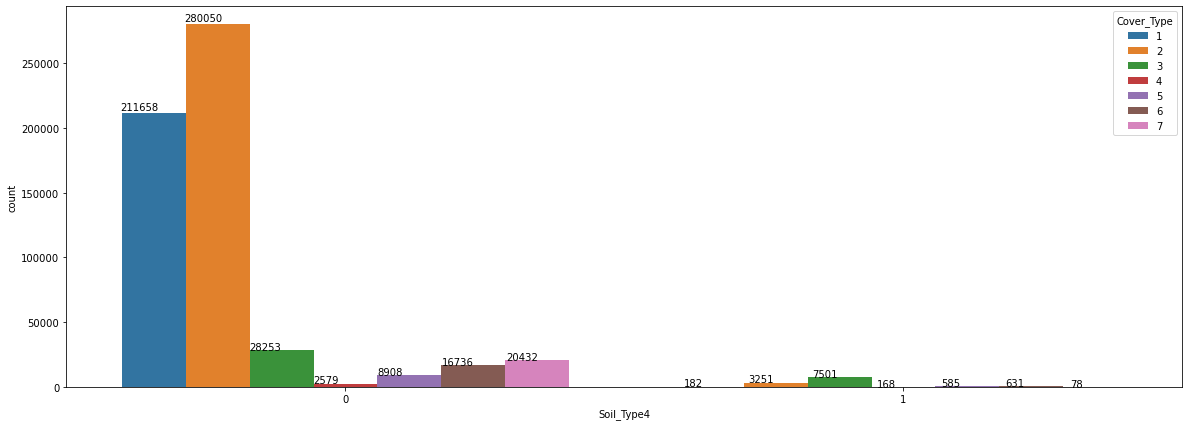

--------------------------------------
Soil_Type5


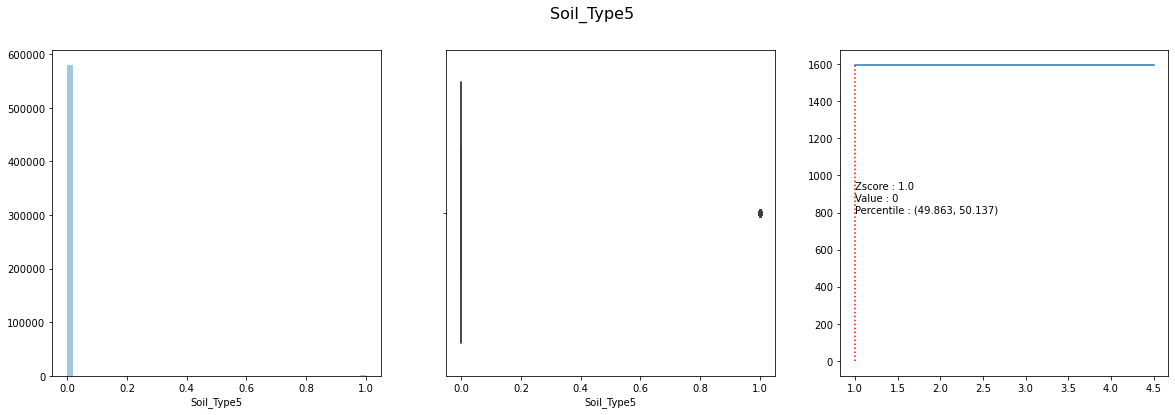

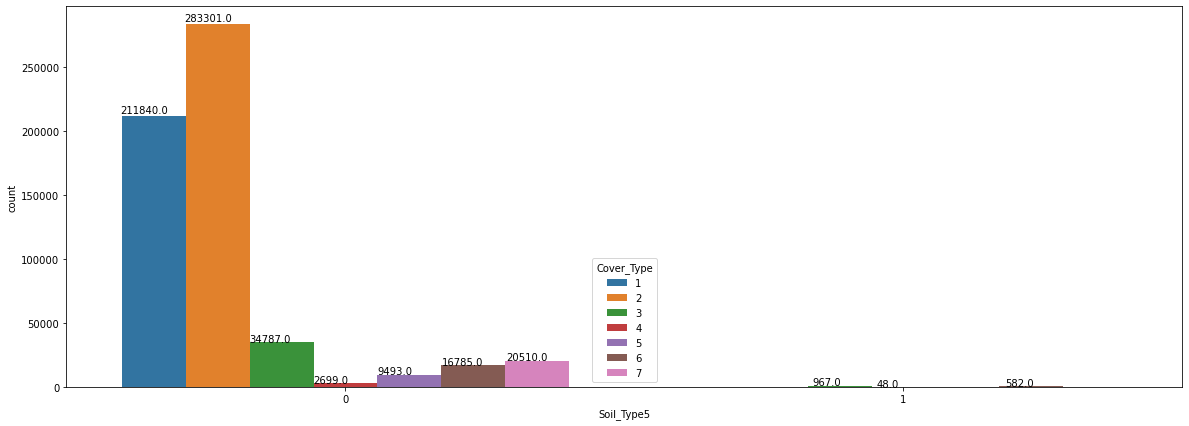

--------------------------------------
Soil_Type6


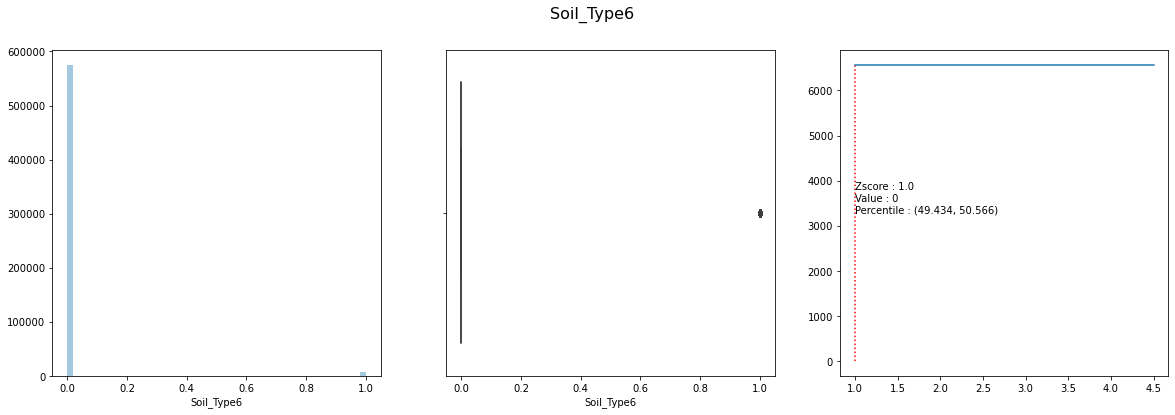

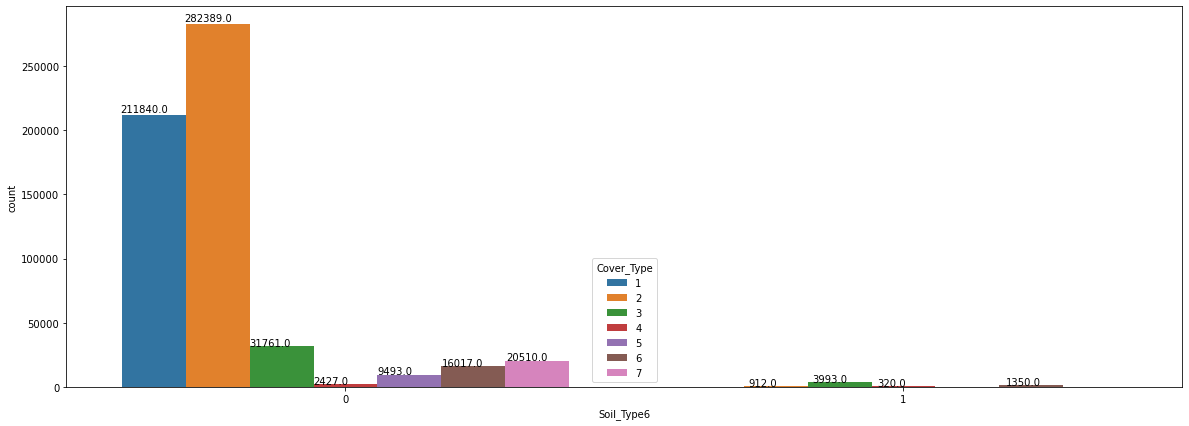

--------------------------------------
Soil_Type10


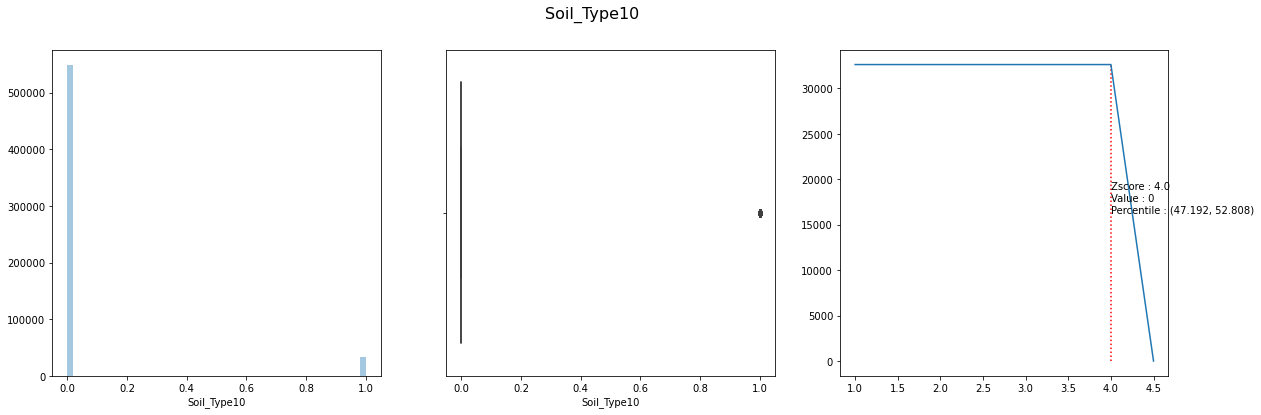

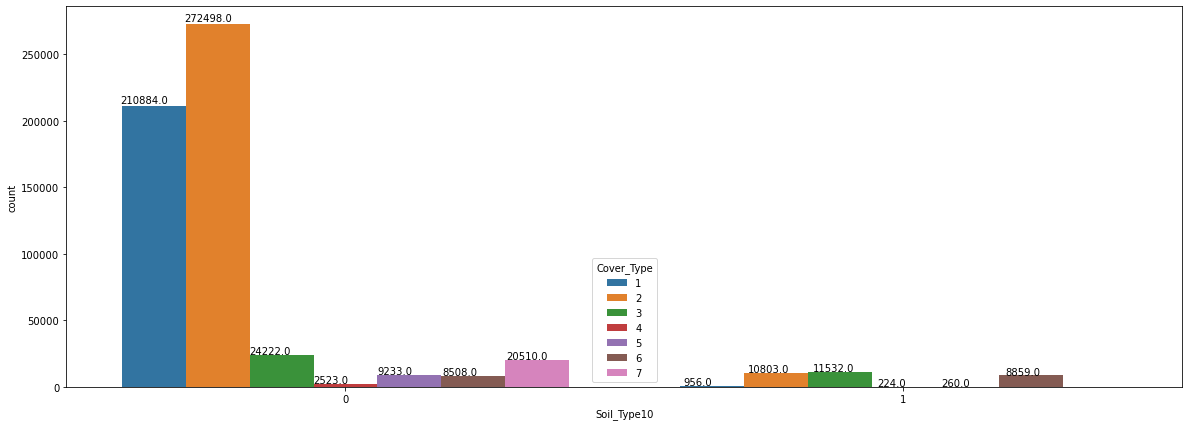

--------------------------------------
Soil_Type11


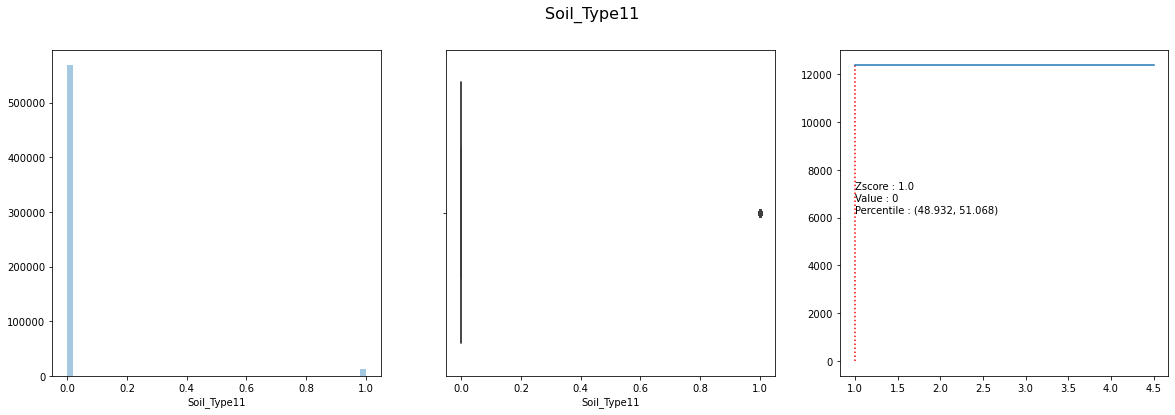

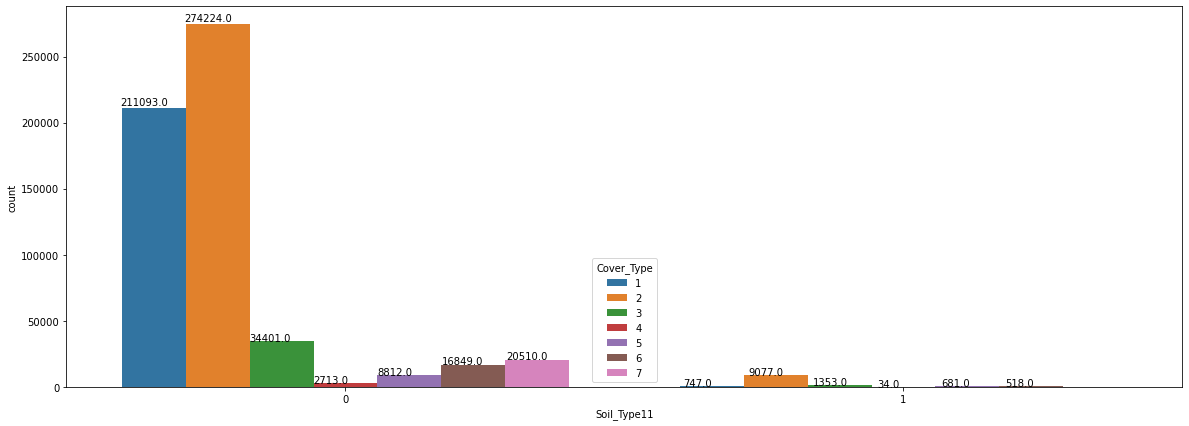

--------------------------------------
Soil_Type12


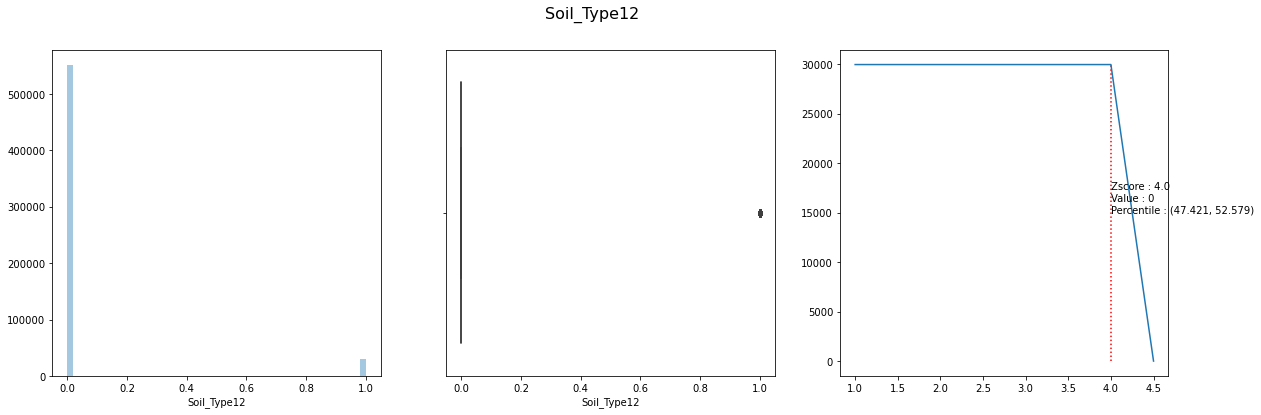

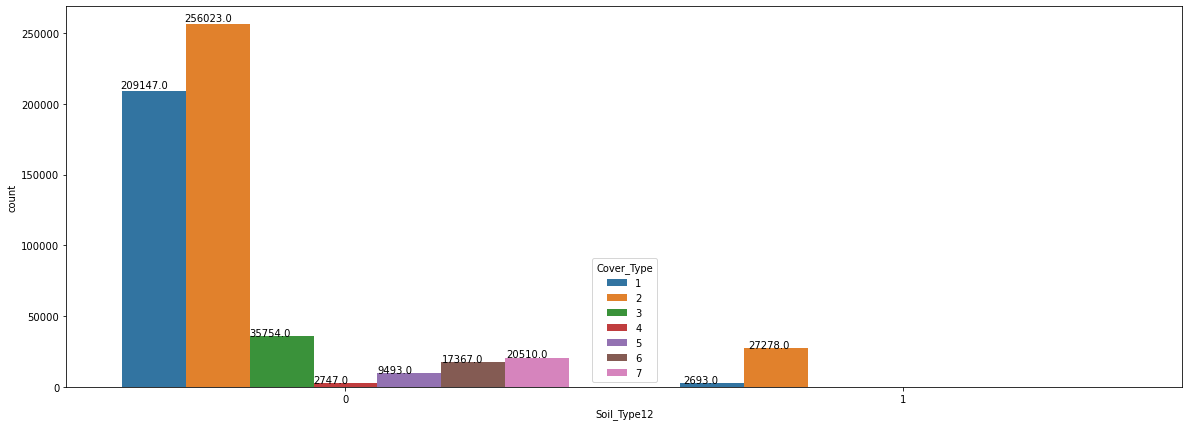

--------------------------------------
Soil_Type17


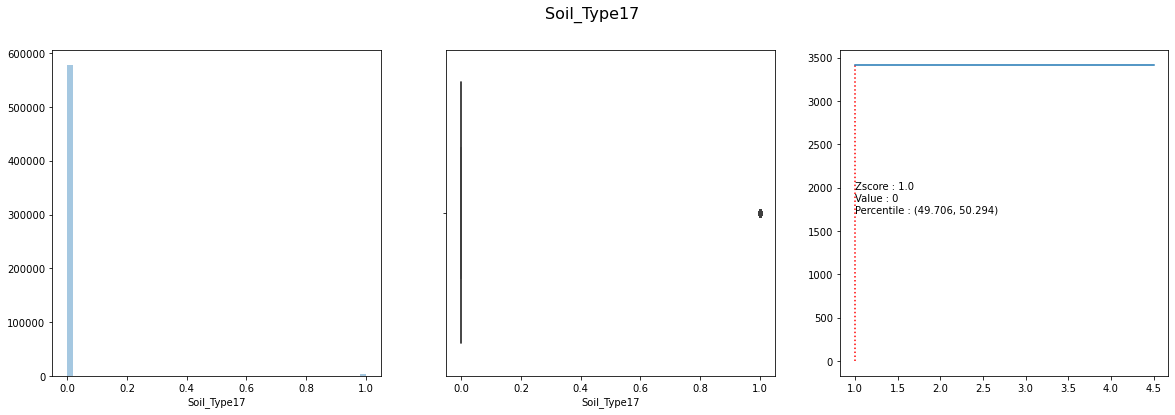

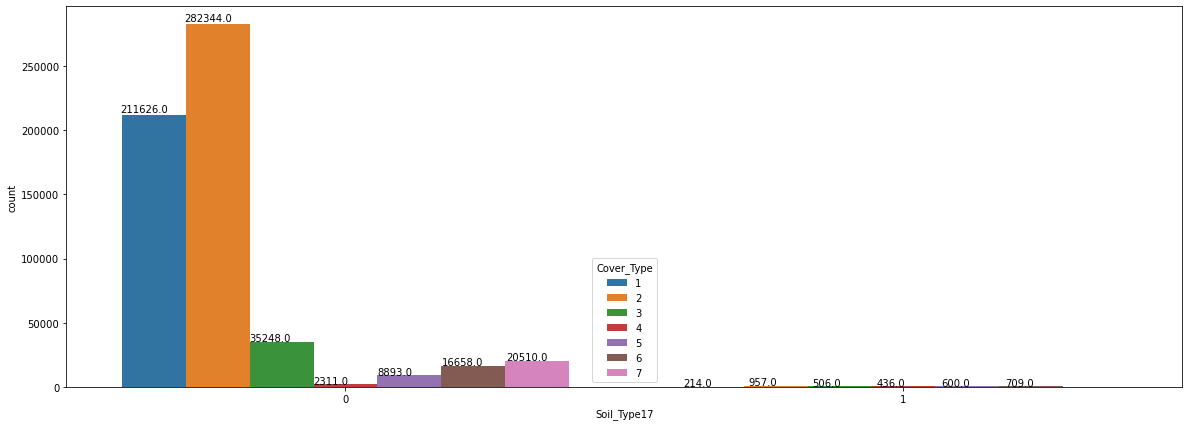

--------------------------------------
Soil_Type19


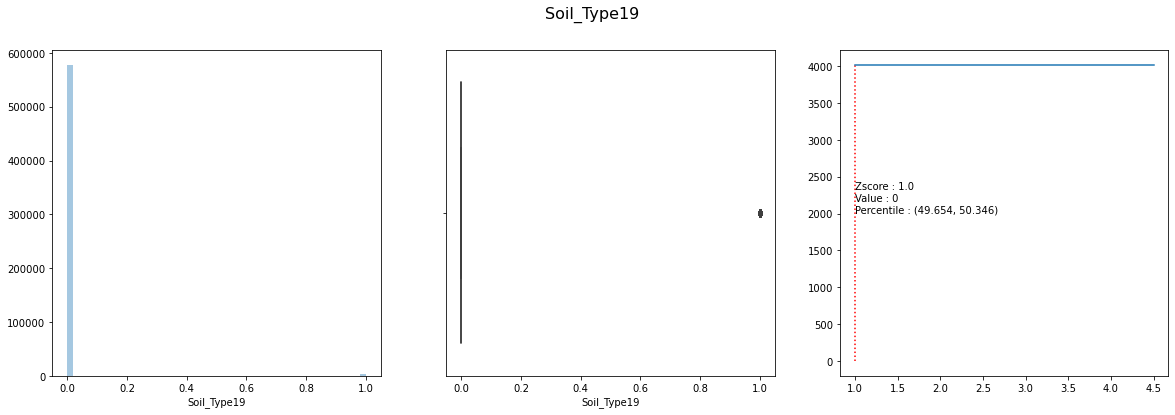

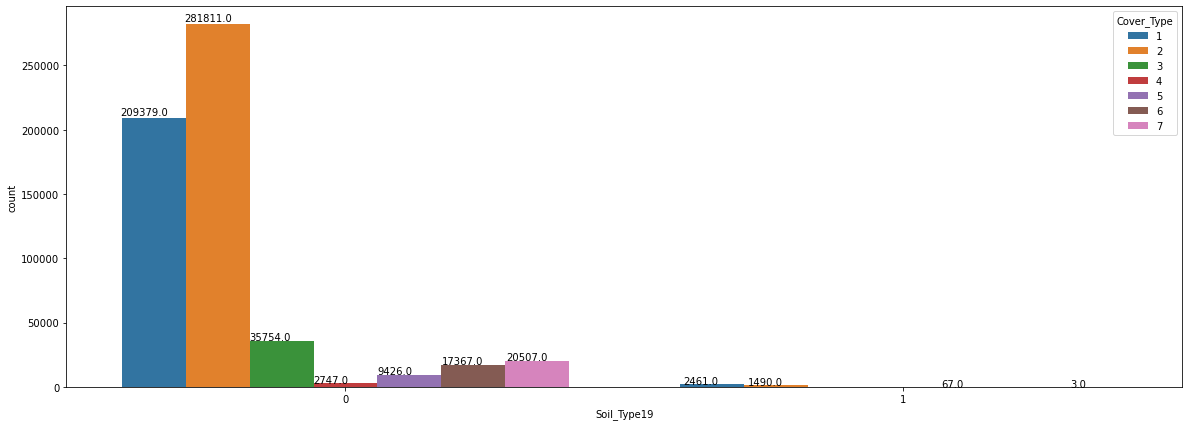

--------------------------------------
Soil_Type20


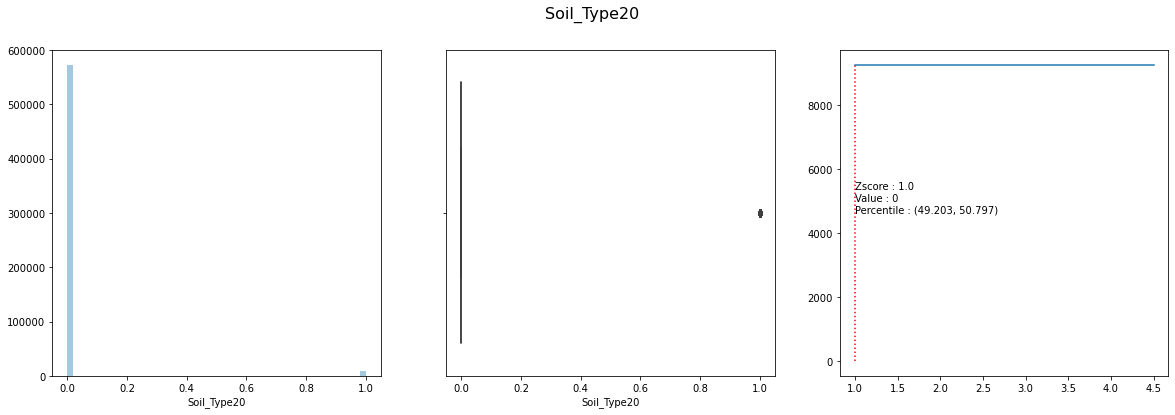

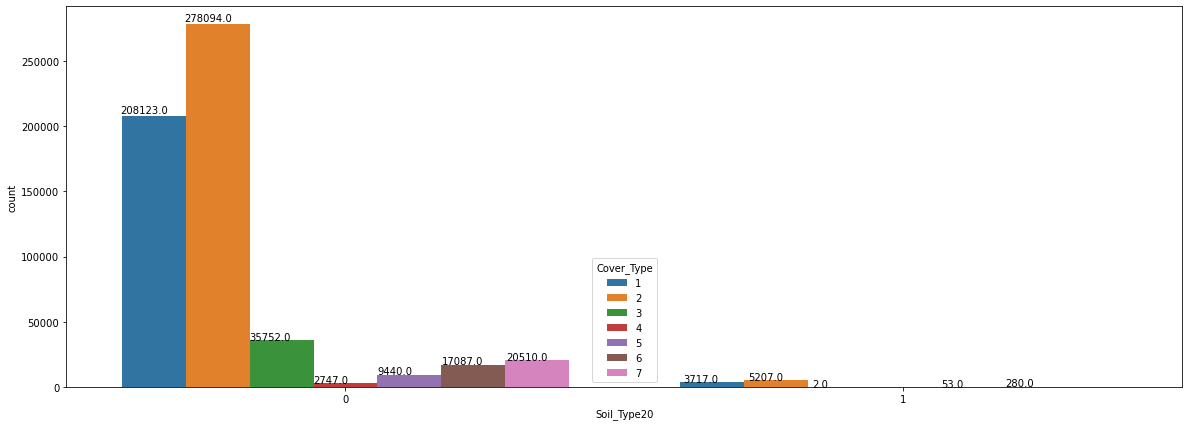

--------------------------------------
Soil_Type22


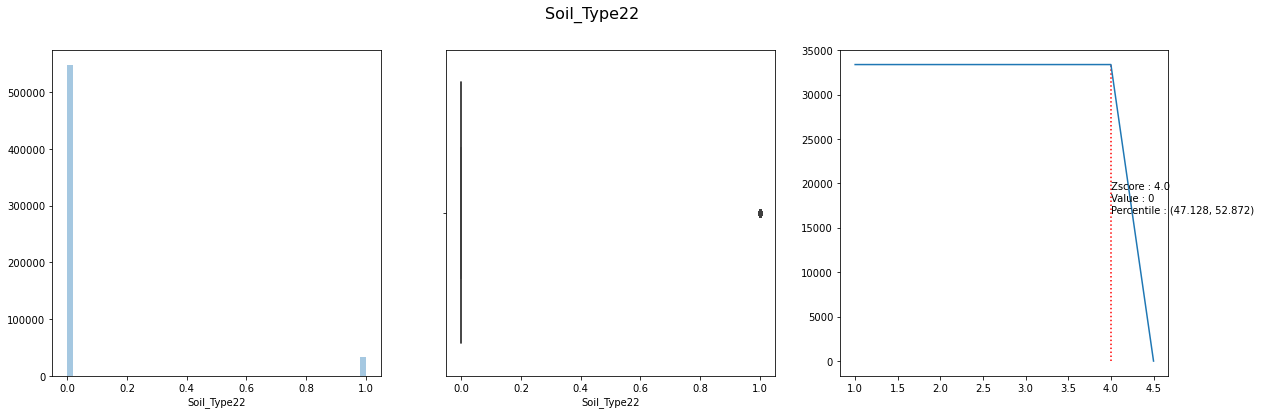

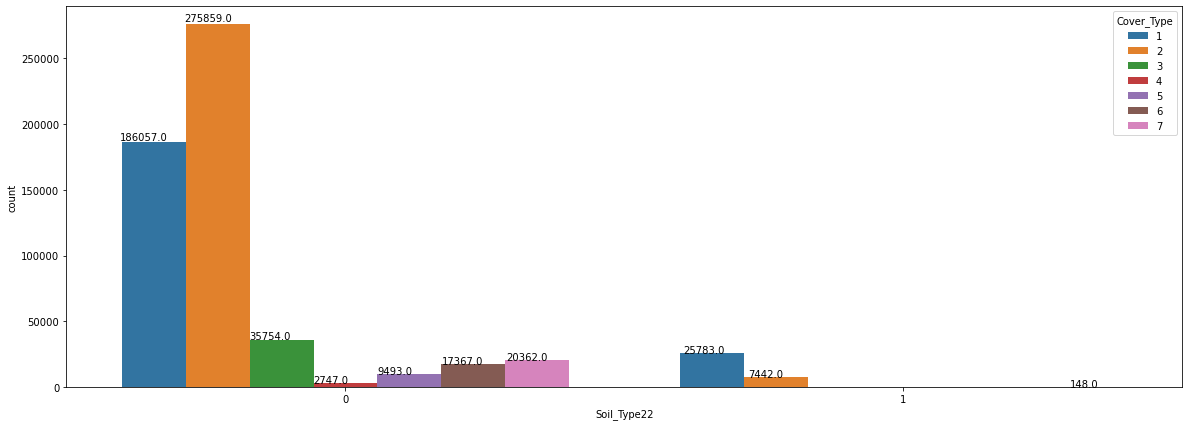

--------------------------------------
Soil_Type23


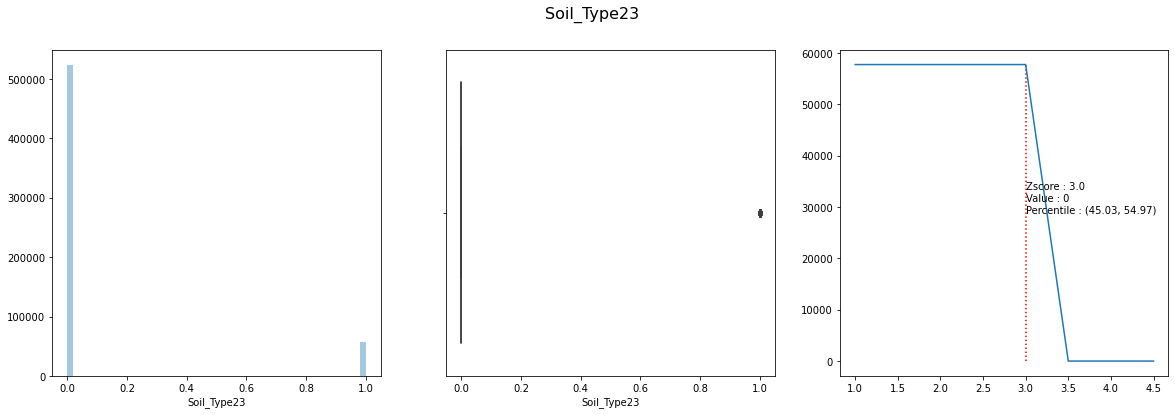

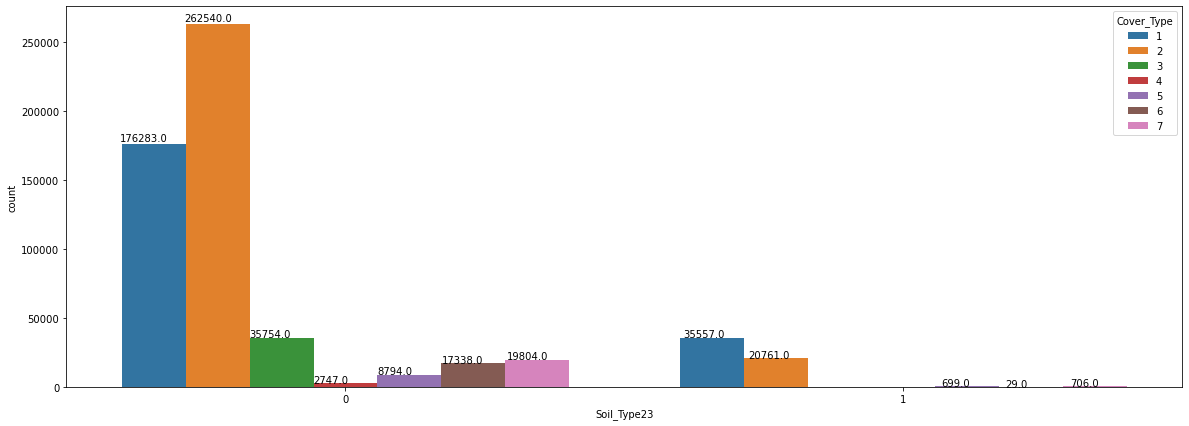

--------------------------------------
Soil_Type24


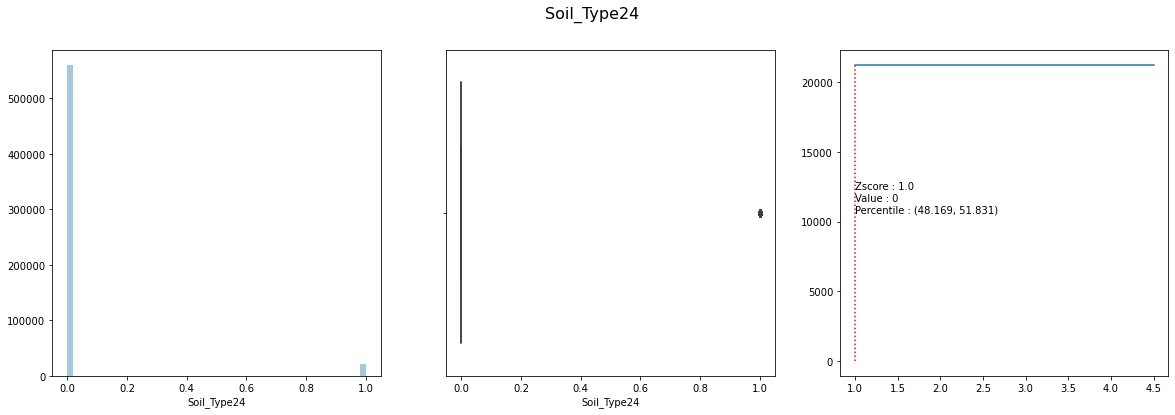

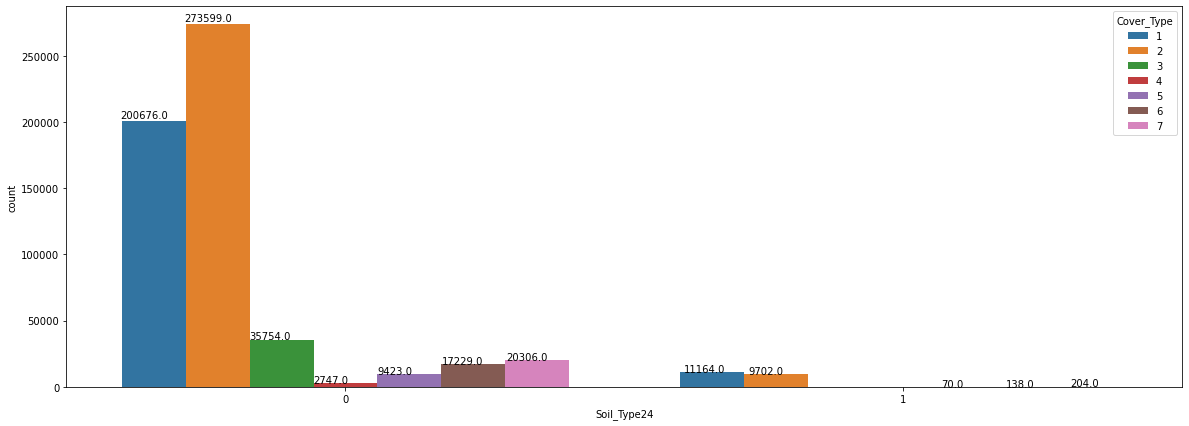

--------------------------------------
Soil_Type29


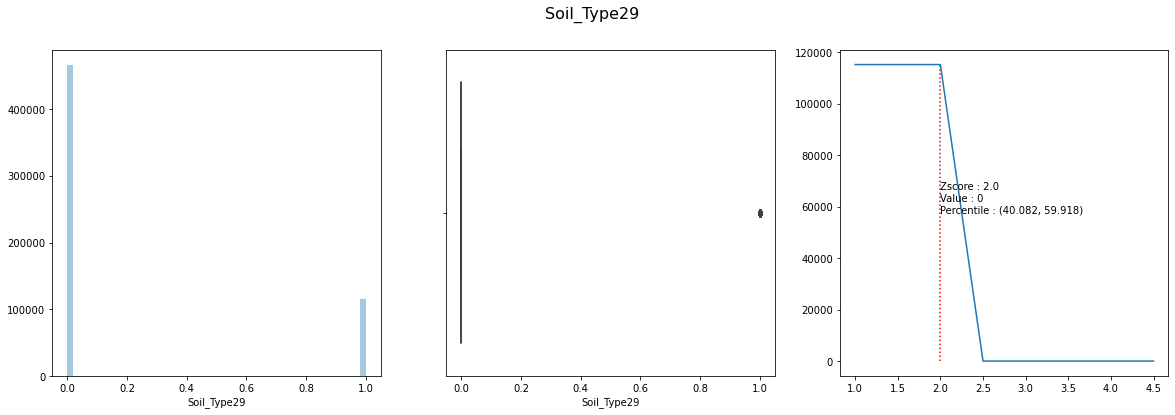

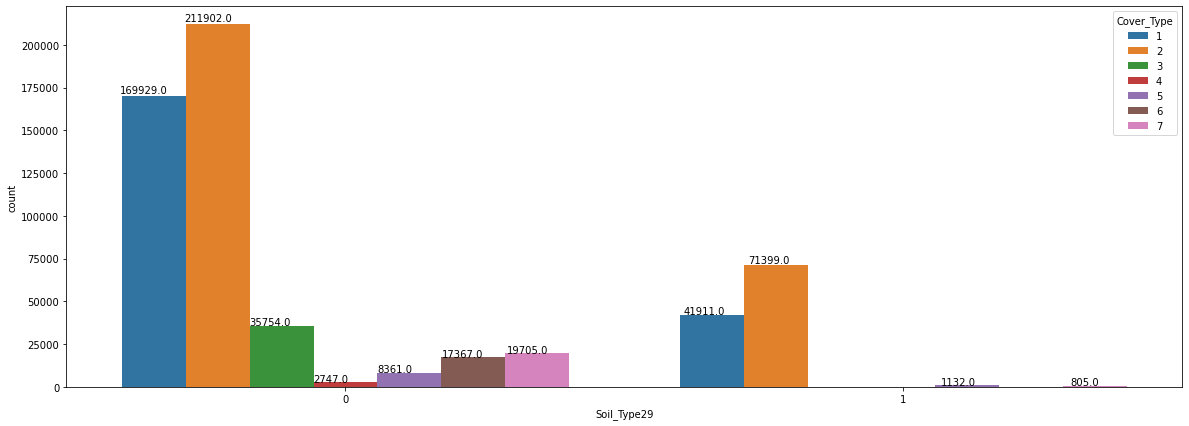

--------------------------------------
Soil_Type31


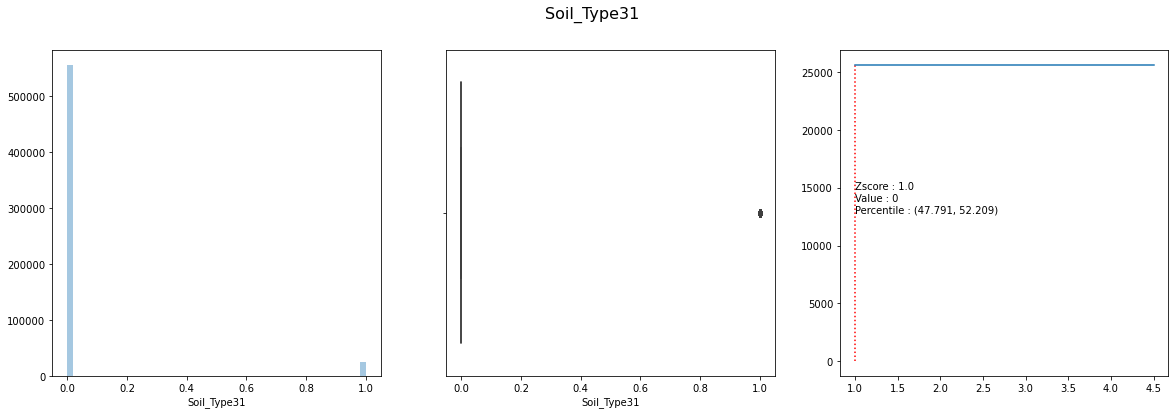

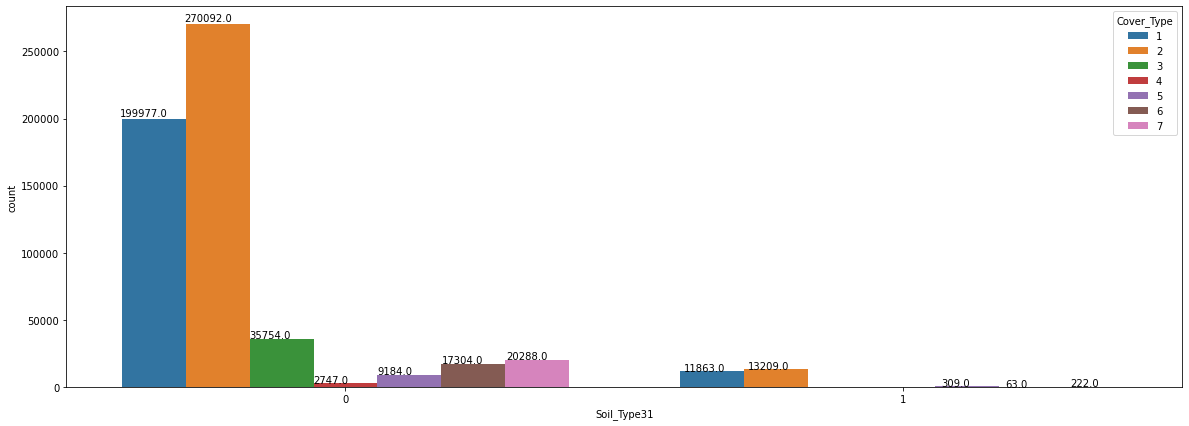

--------------------------------------
Soil_Type32


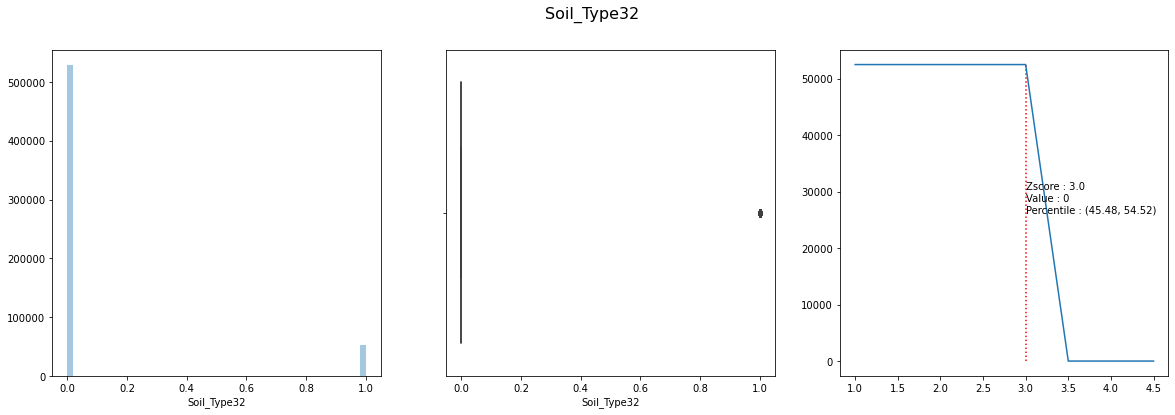

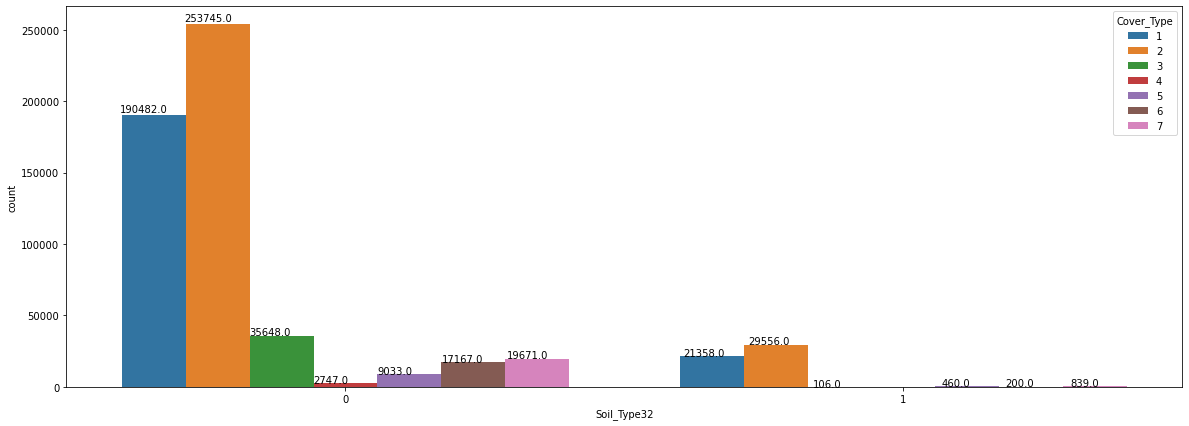

--------------------------------------
Soil_Type33


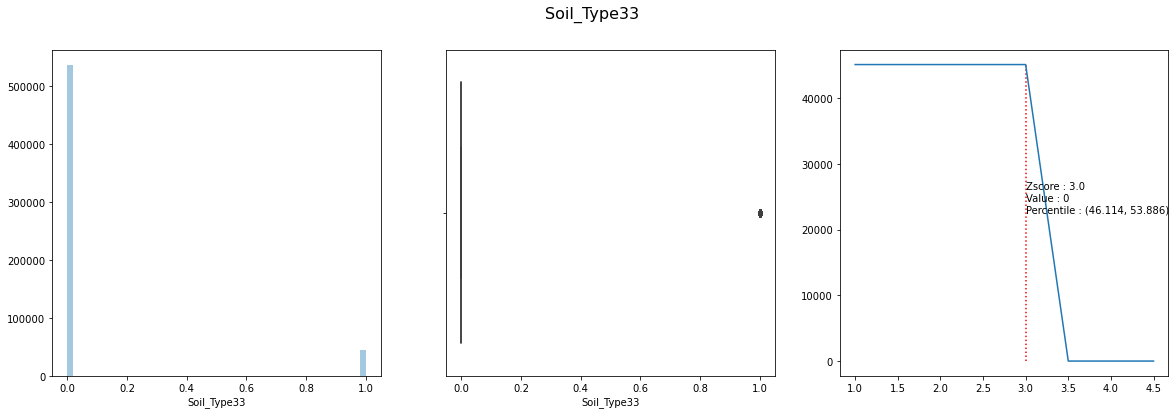

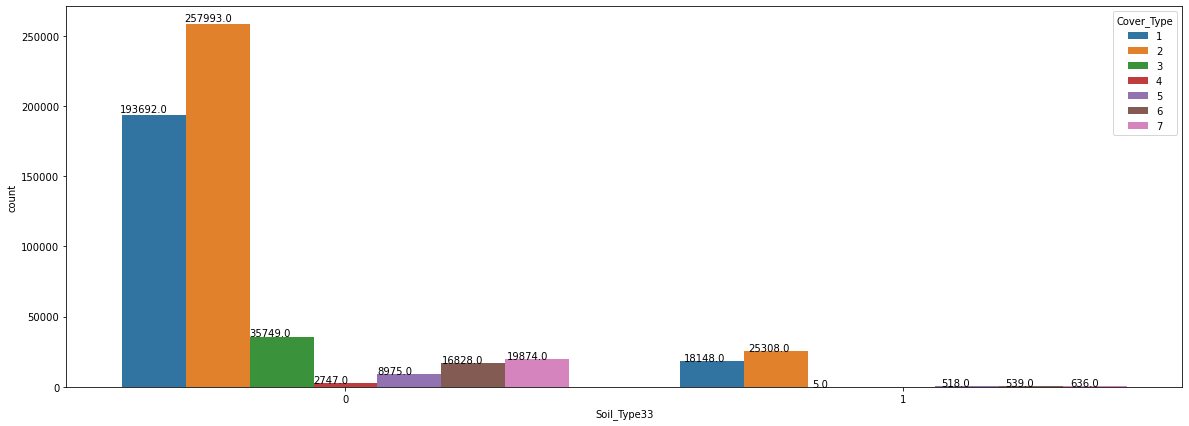

--------------------------------------
Soil_Type35


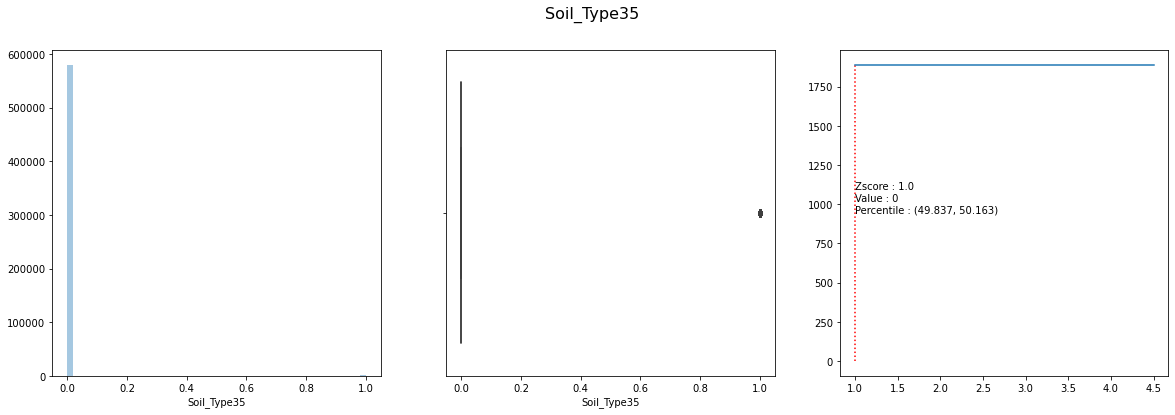

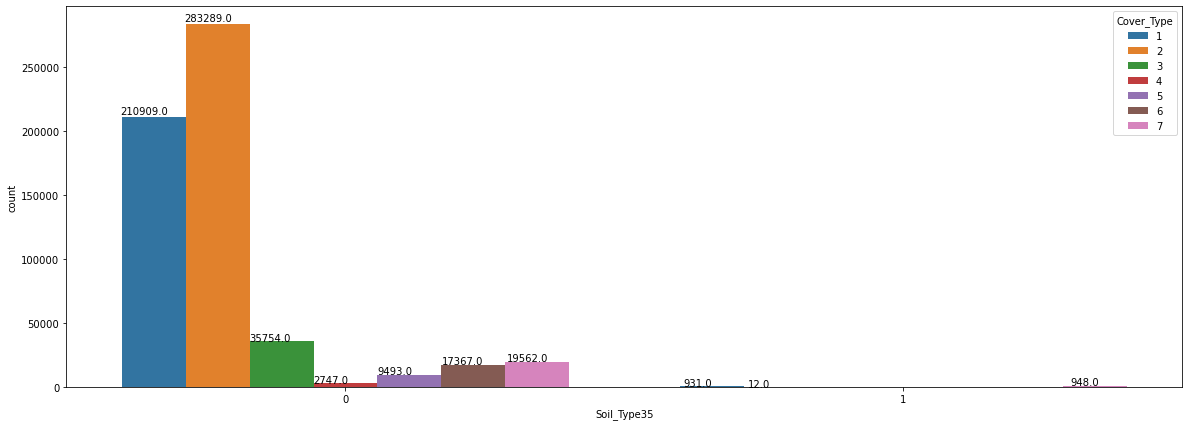

--------------------------------------
Soil_Type38


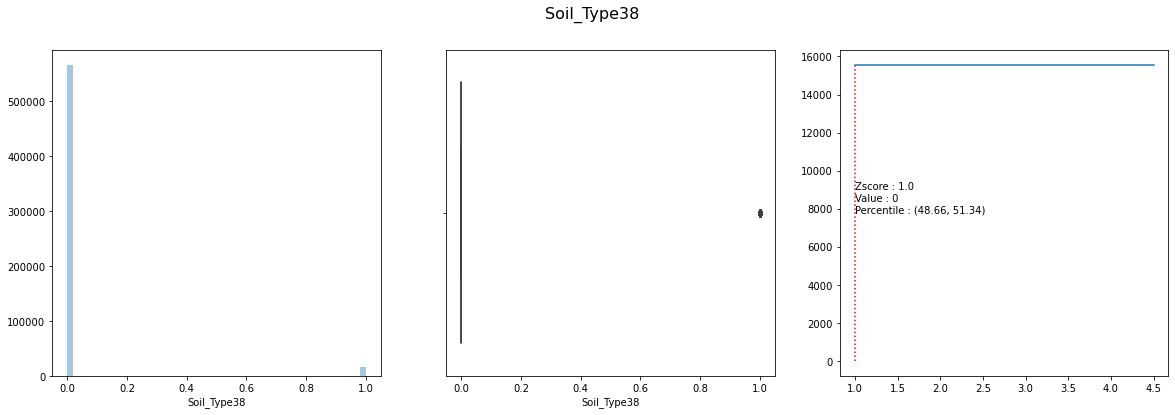

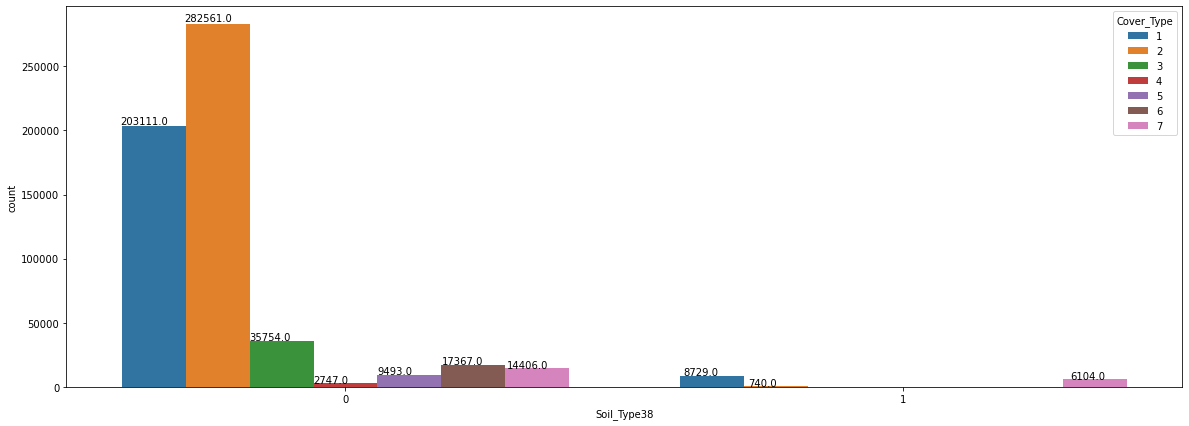

--------------------------------------
Soil_Type39


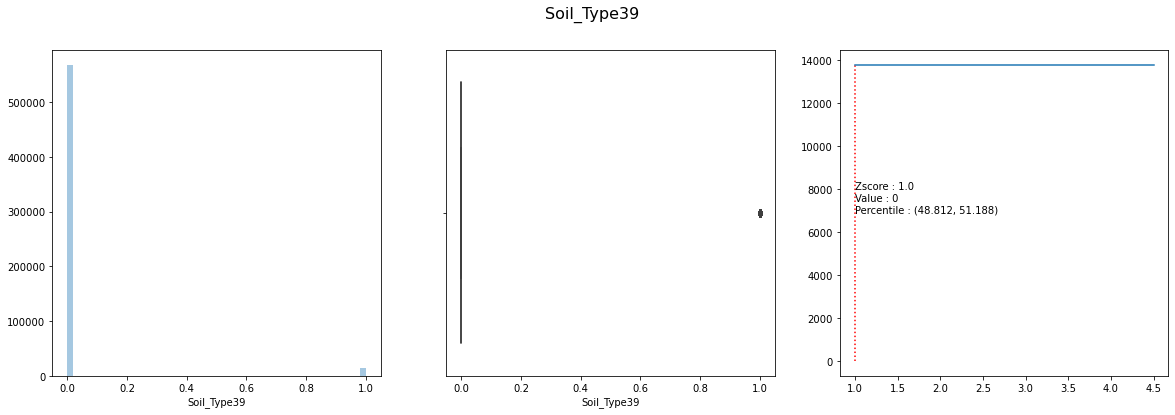

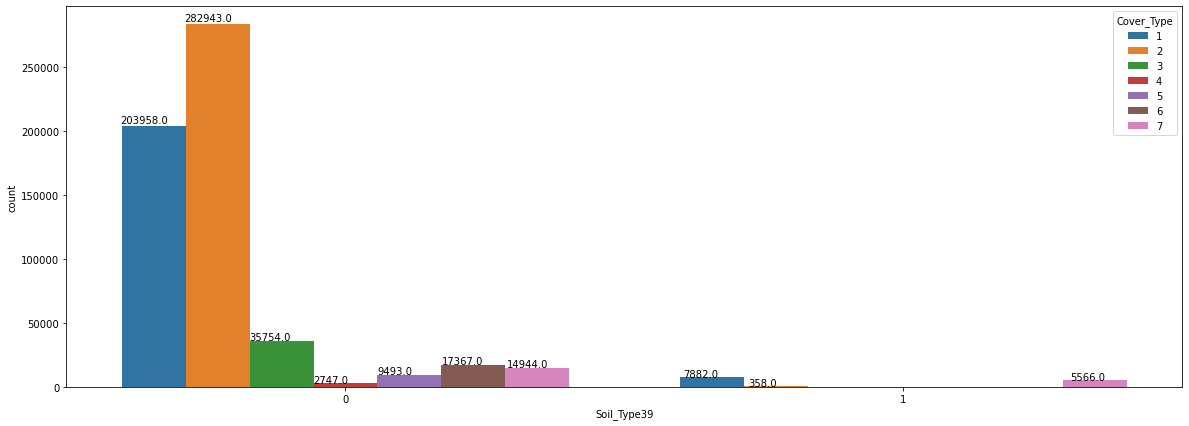

--------------------------------------
Soil_Type40


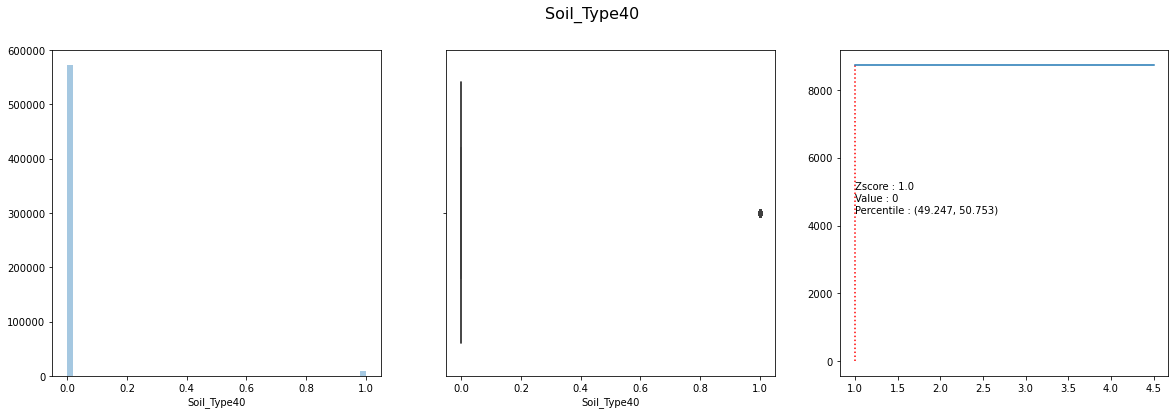

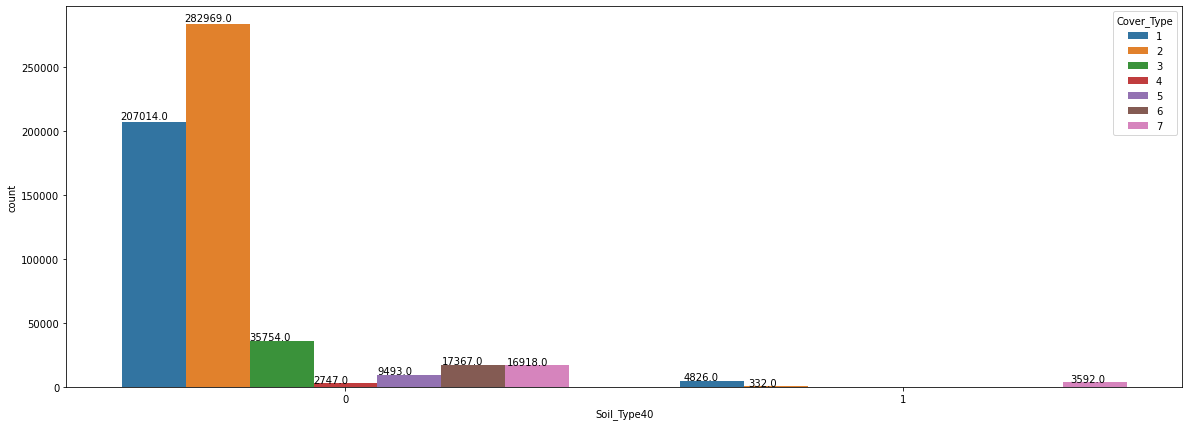

--------------------------------------
Cover_Type


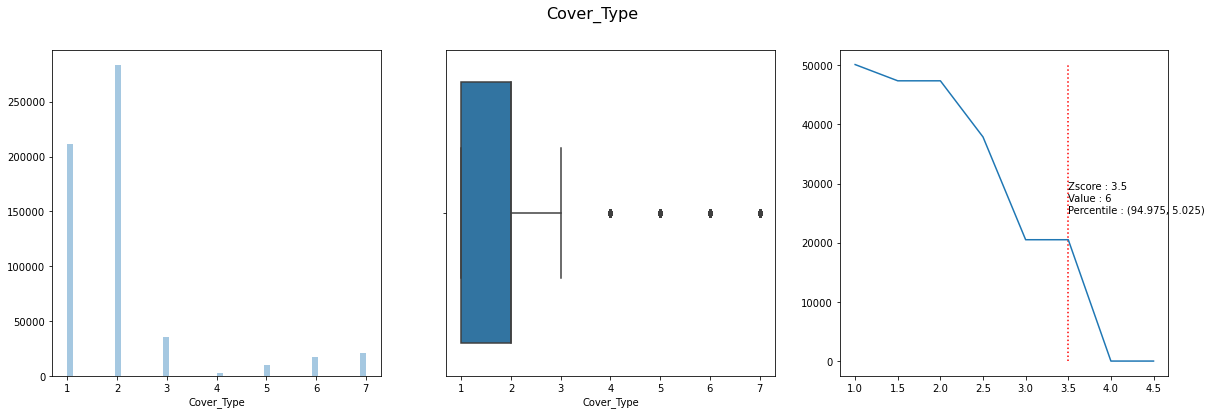

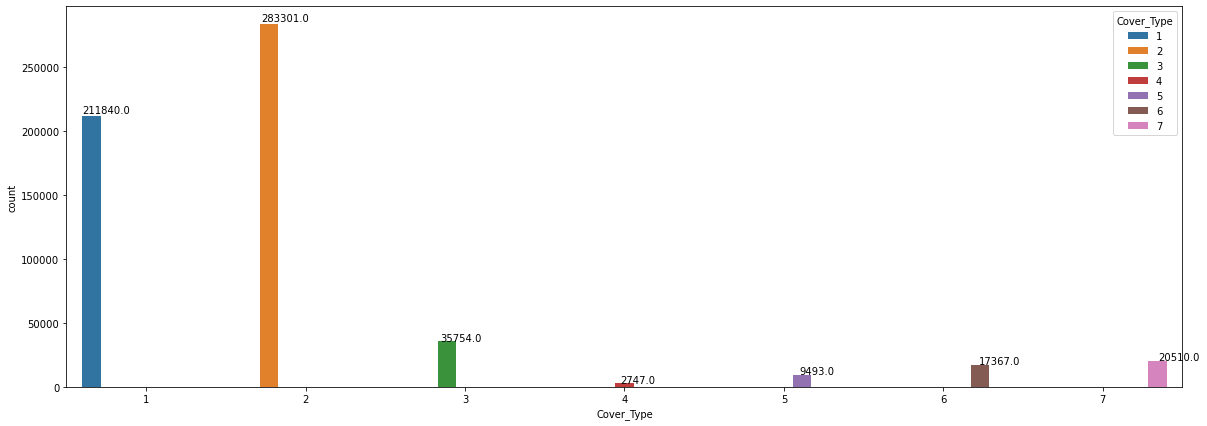

--------------------------------------


In [19]:
##Checking 0-1 valued columns:
df_0_1= ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type35', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']
df_0_1 = df[df_0_1]
for i in df_0_1.columns:
    print(i)
    outlier_inspect(df_0_1, i)
    plt.figure(figsize=(20,7))
    ax = sns.countplot(x = i ,hue='Cover_Type',data=df_0_1)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
    plt.show()
    print("--------------------------------------")

Wilderness_Area1


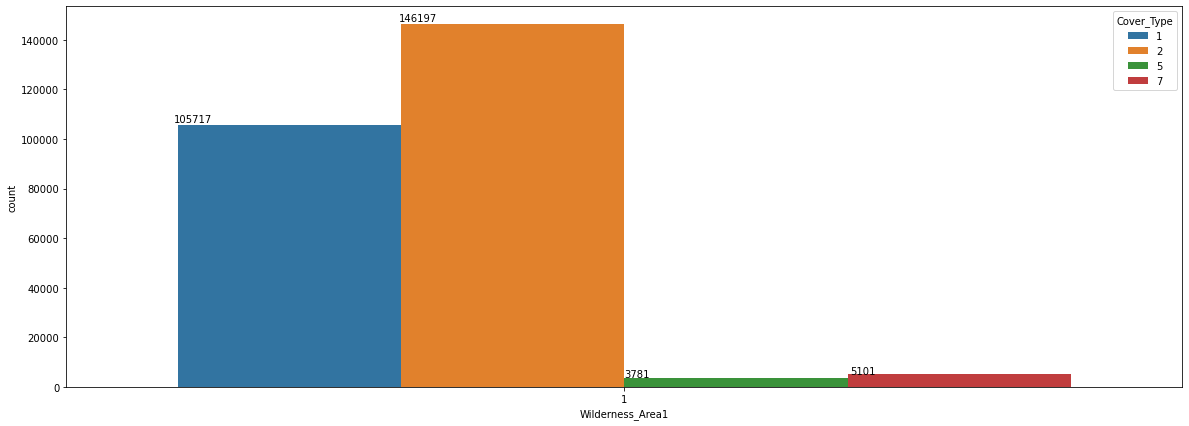

--------------------------------------
Wilderness_Area2


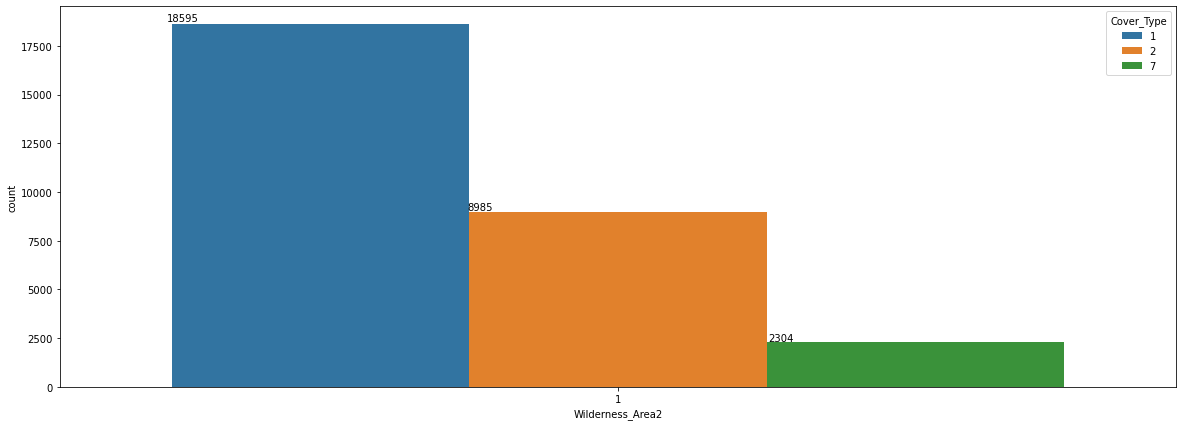

--------------------------------------
Wilderness_Area3


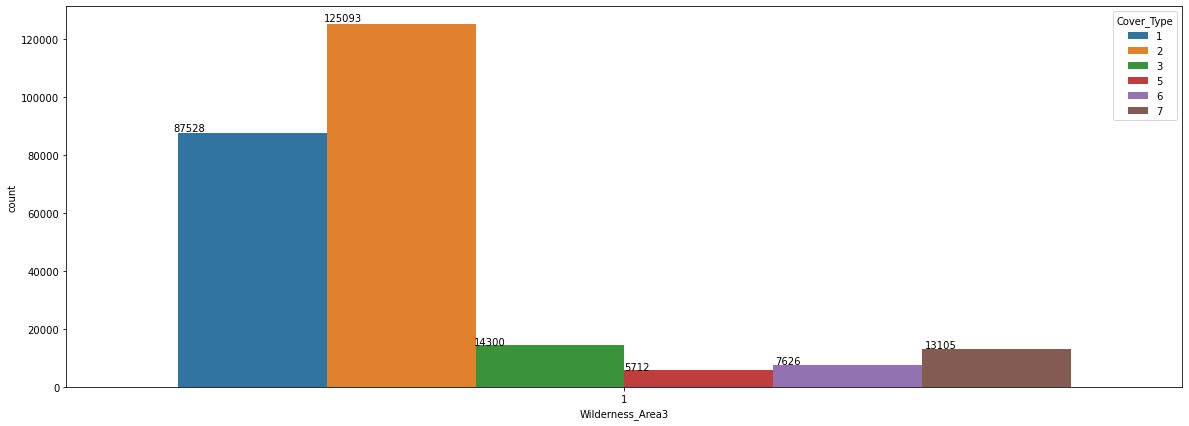

--------------------------------------
Wilderness_Area4


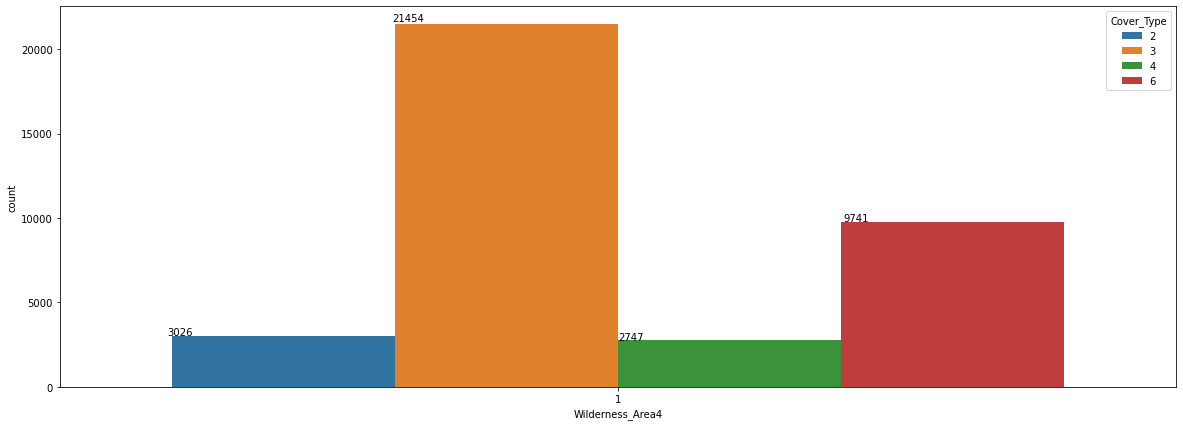

--------------------------------------
Soil_Type1


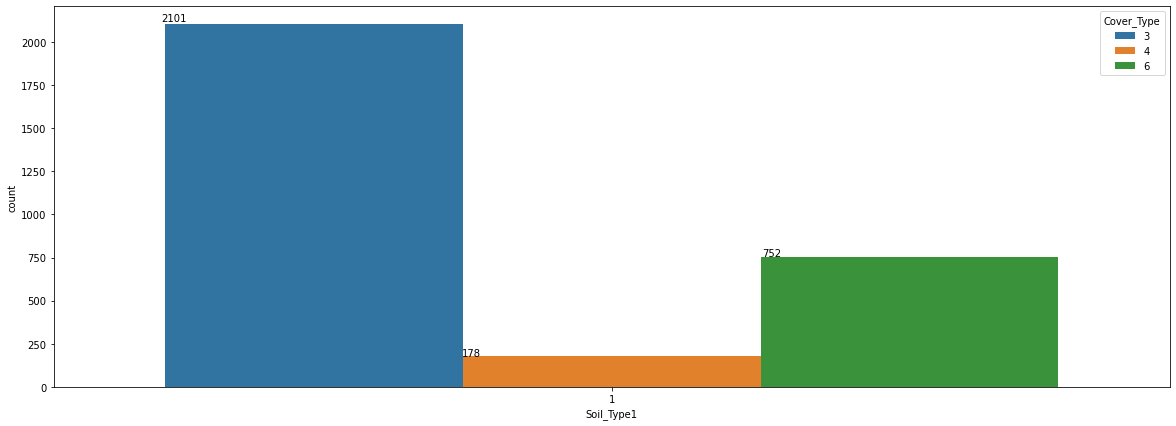

--------------------------------------
Soil_Type2


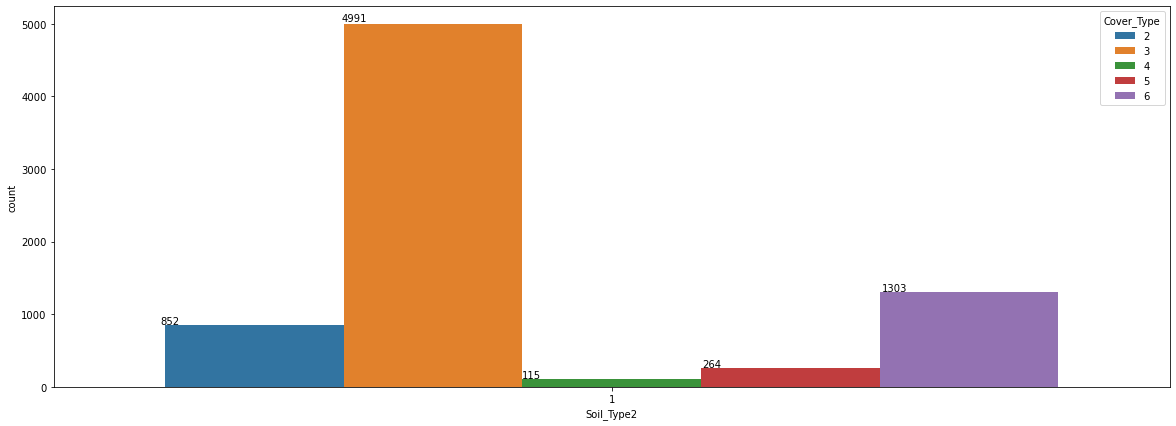

--------------------------------------
Soil_Type3


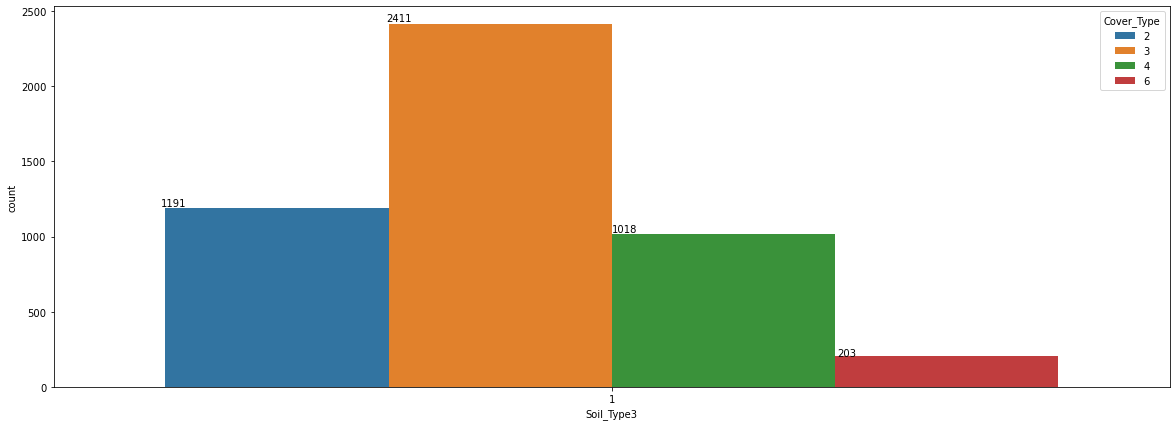

--------------------------------------
Soil_Type4


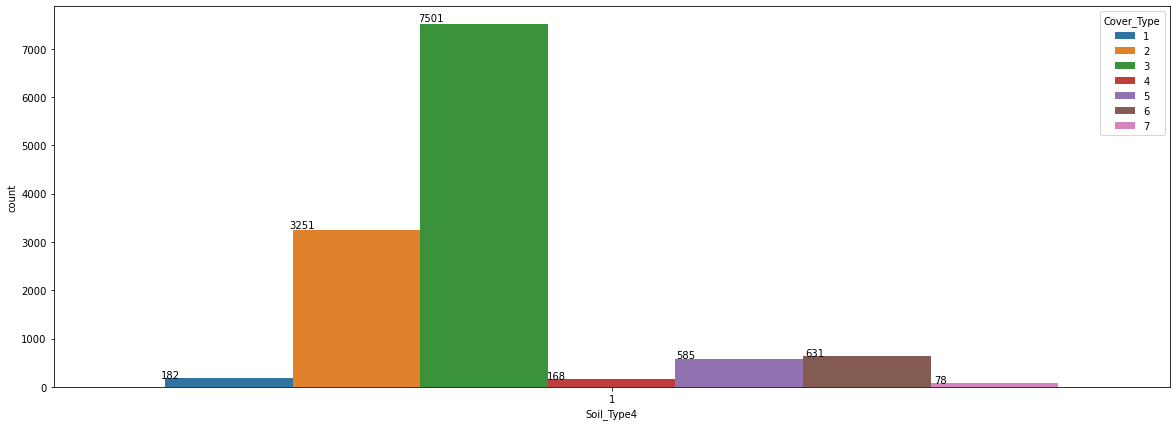

--------------------------------------
Soil_Type5


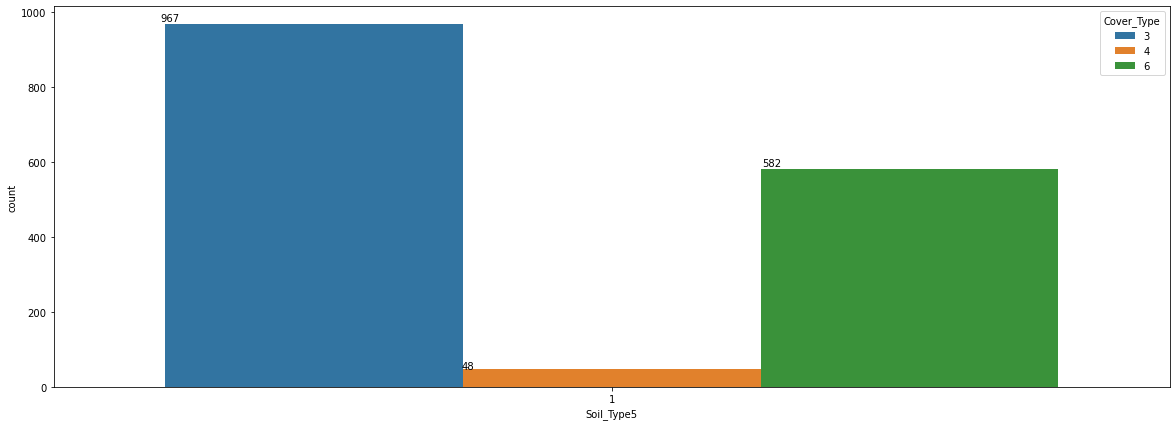

--------------------------------------
Soil_Type6


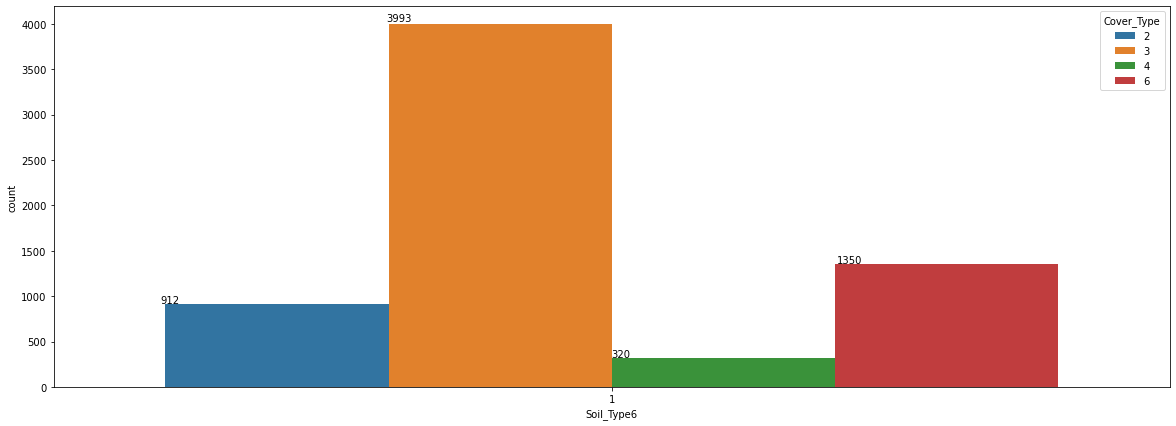

--------------------------------------
Soil_Type10


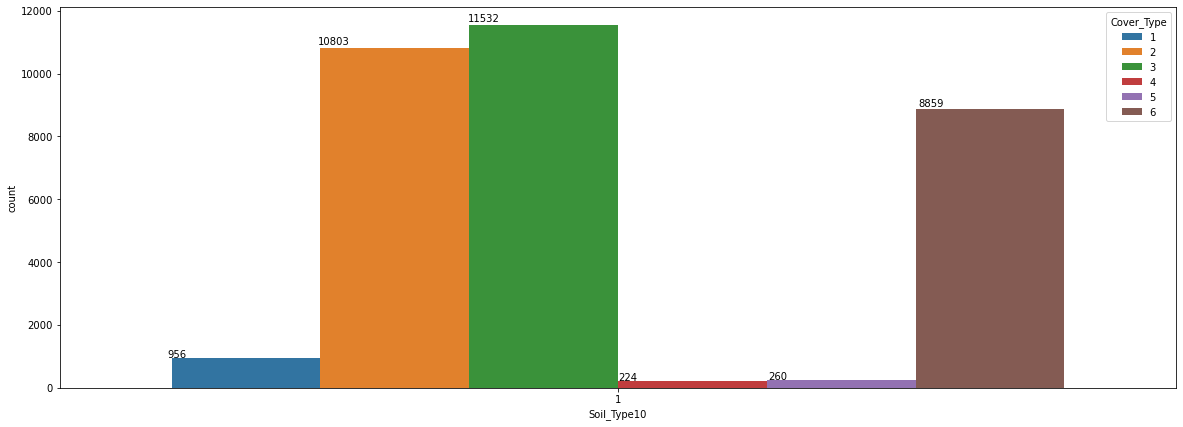

--------------------------------------
Soil_Type11


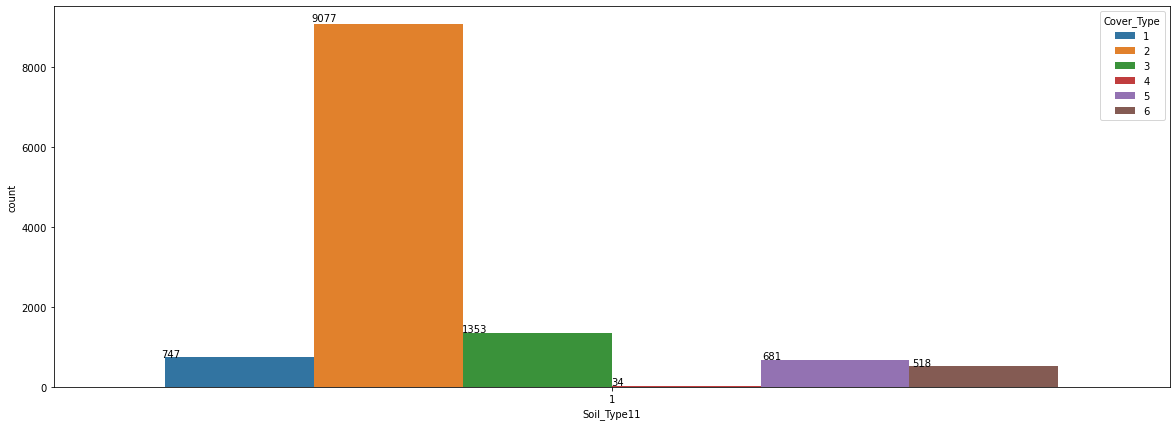

--------------------------------------
Soil_Type12


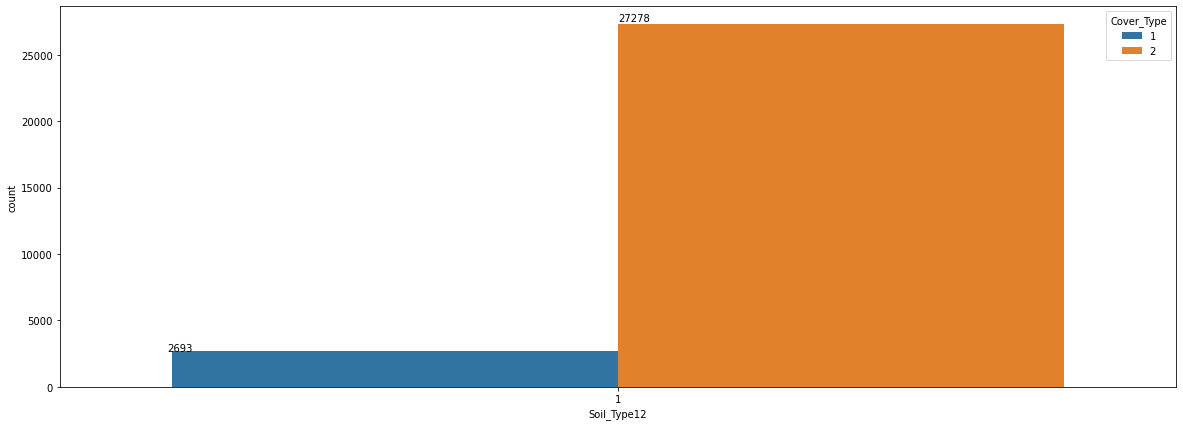

--------------------------------------
Soil_Type17


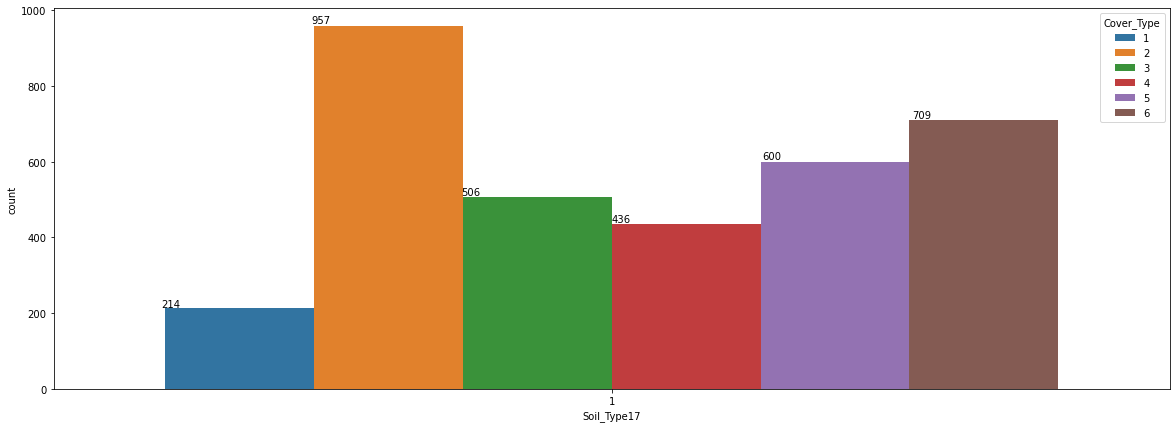

--------------------------------------
Soil_Type19


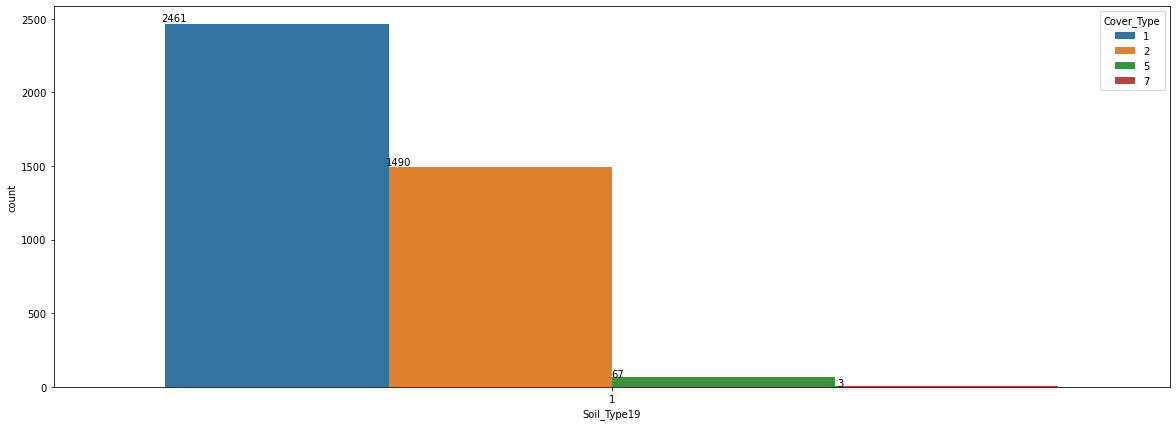

--------------------------------------
Soil_Type20


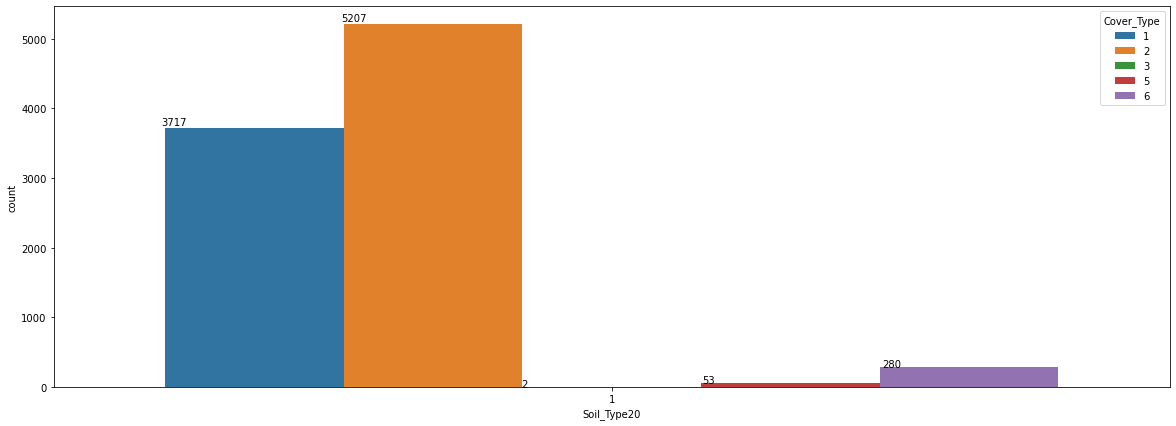

--------------------------------------
Soil_Type22


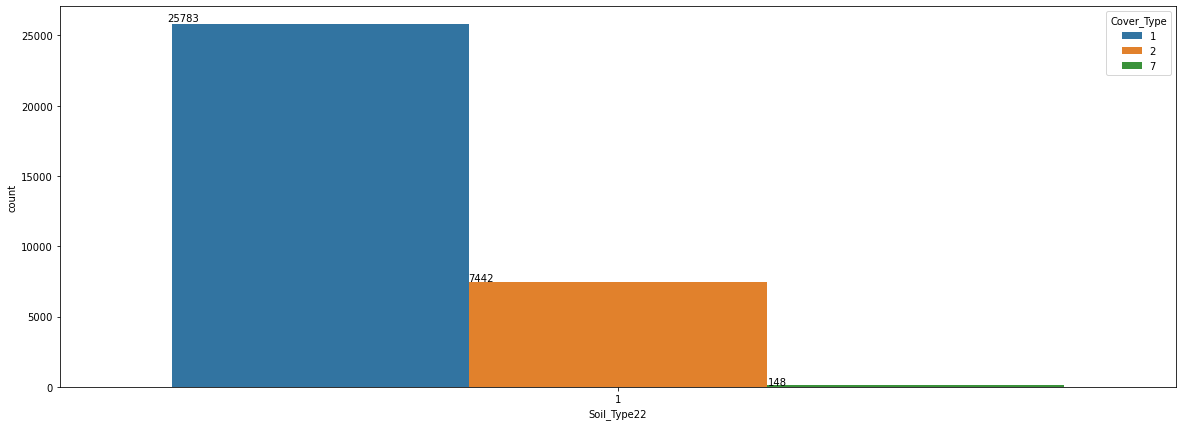

--------------------------------------
Soil_Type23


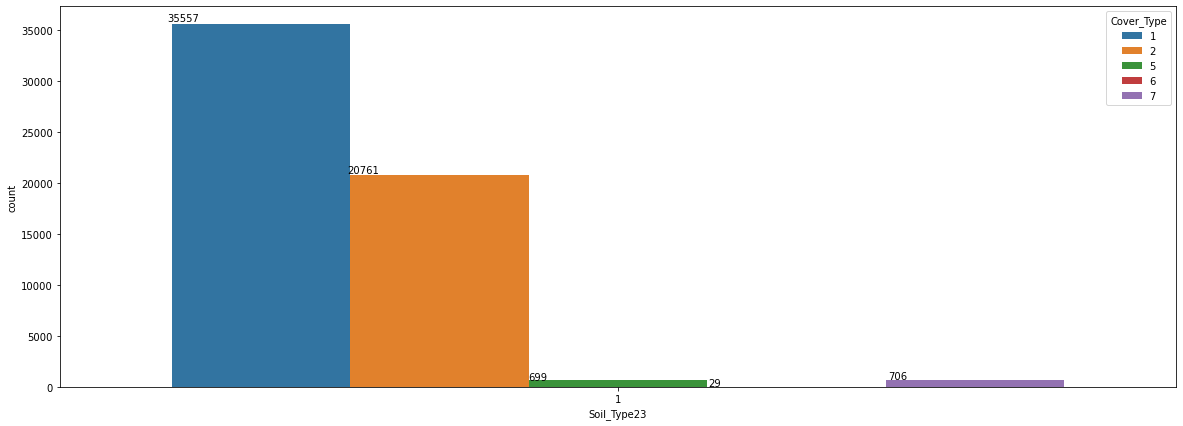

--------------------------------------
Soil_Type24


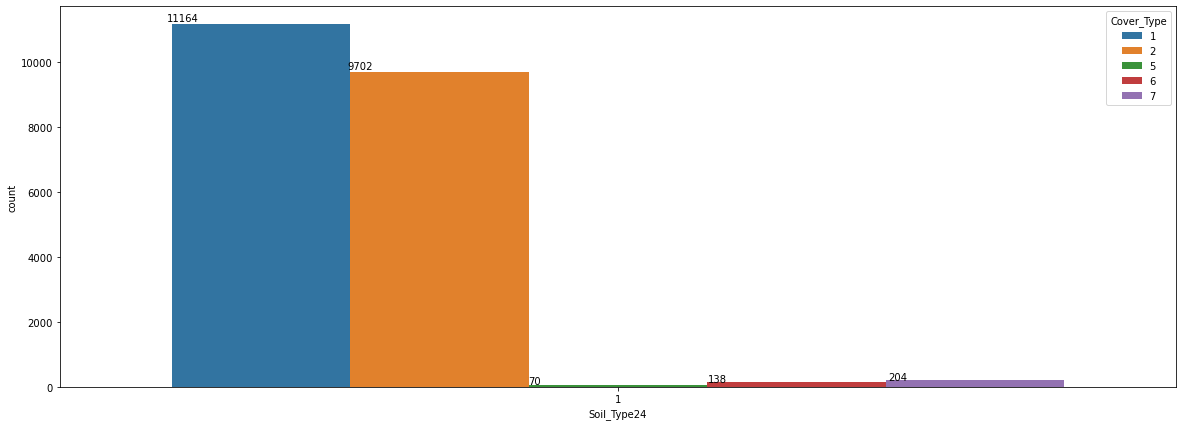

--------------------------------------
Soil_Type29


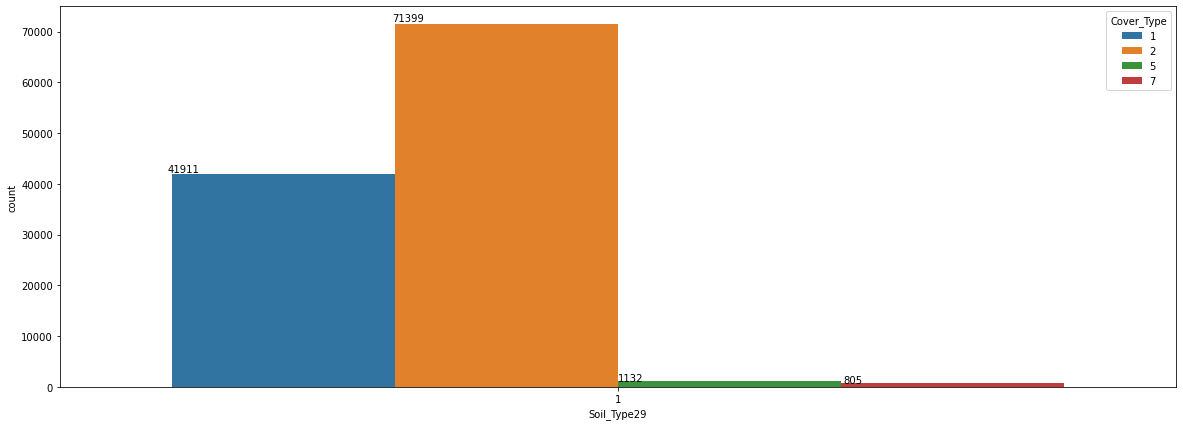

--------------------------------------
Soil_Type31


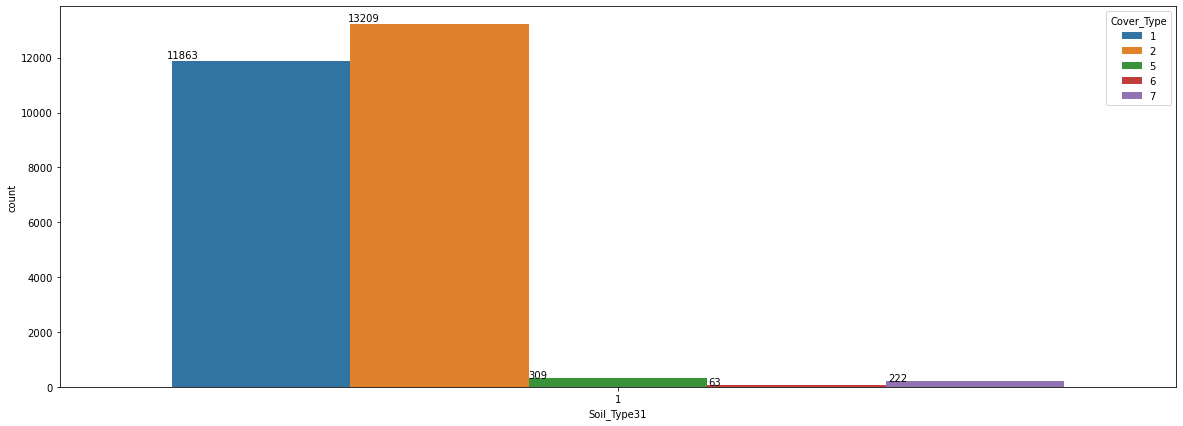

--------------------------------------
Soil_Type32


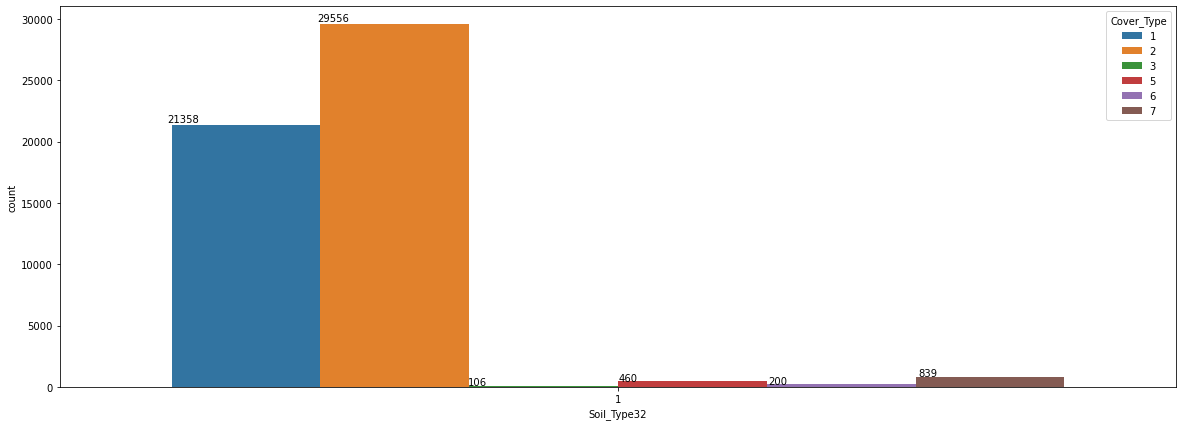

--------------------------------------
Soil_Type33


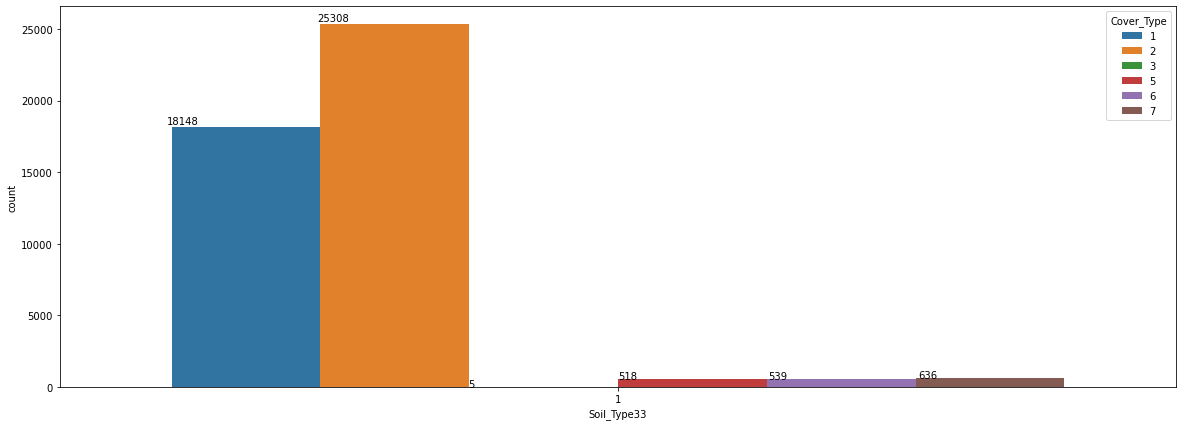

--------------------------------------
Soil_Type35


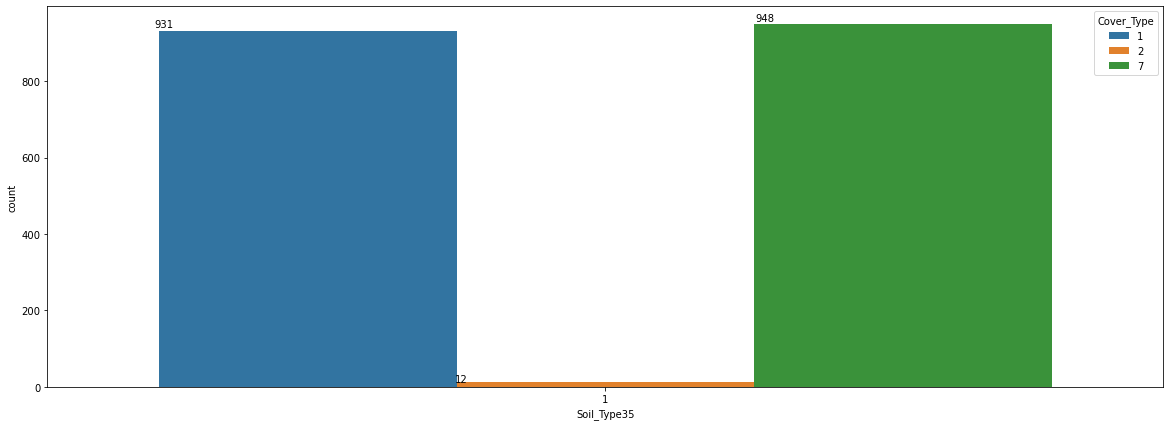

--------------------------------------
Soil_Type38


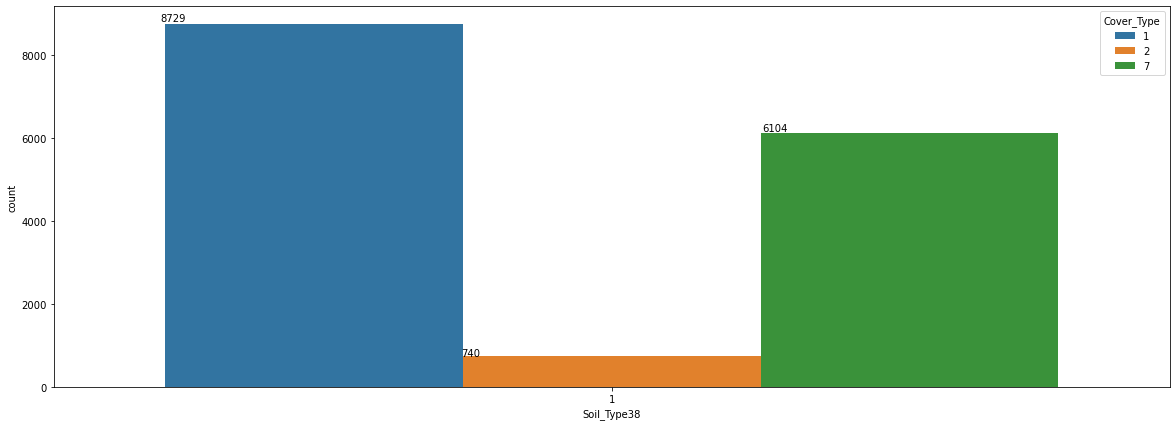

--------------------------------------
Soil_Type39


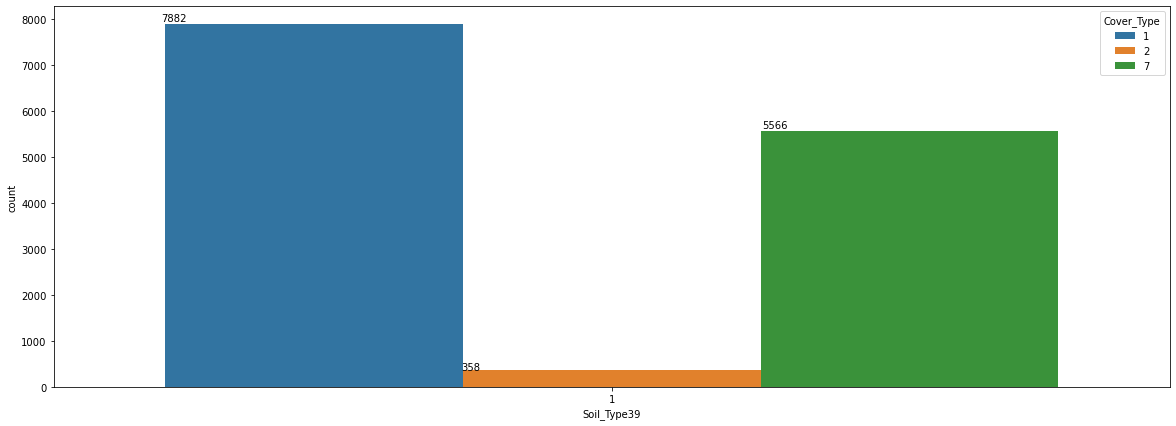

--------------------------------------
Soil_Type40


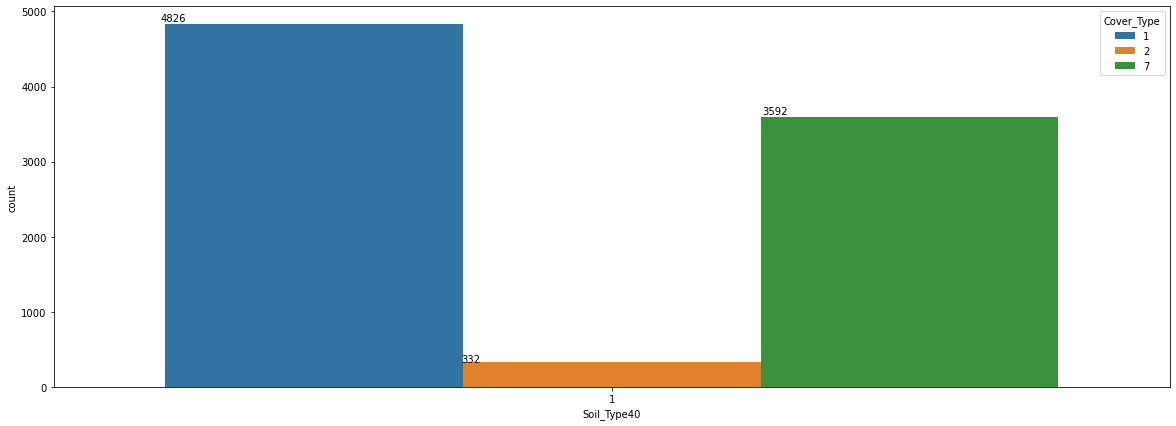

--------------------------------------
Cover_Type


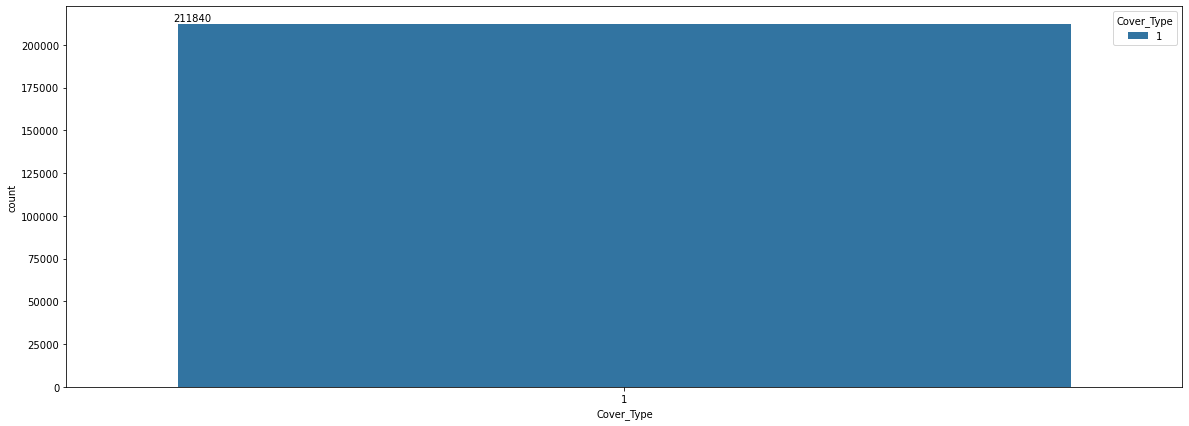

--------------------------------------


In [20]:
##Checking 1 valued columns:
df_0_1= ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type35', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']
df_0_1 = df[df_0_1]
for i in df_0_1.columns:
    print(i)
    plt.figure(figsize=(20,7))
    ax = sns.countplot(x = i ,hue='Cover_Type',data=df_0_1[df_0_1[i]==1])
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
    plt.show()
    print("--------------------------------------")

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

Elevation


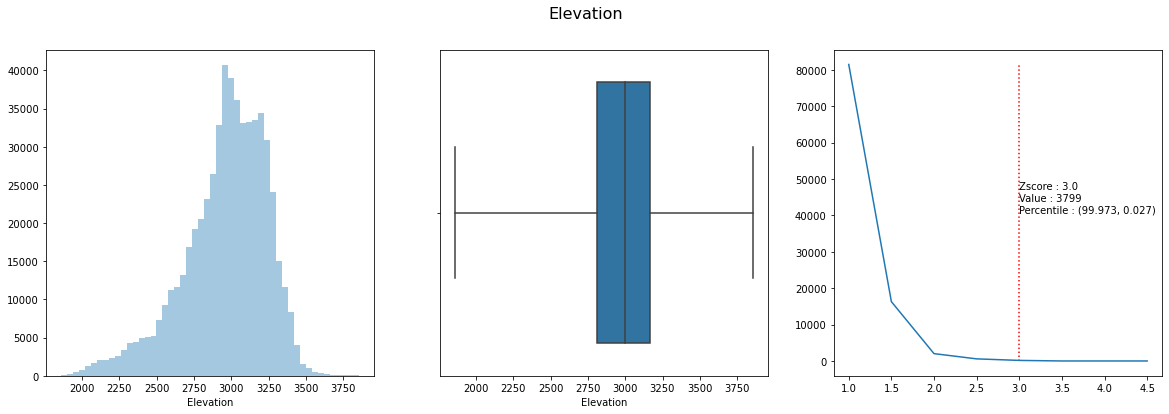

--------------------------------------
Aspect


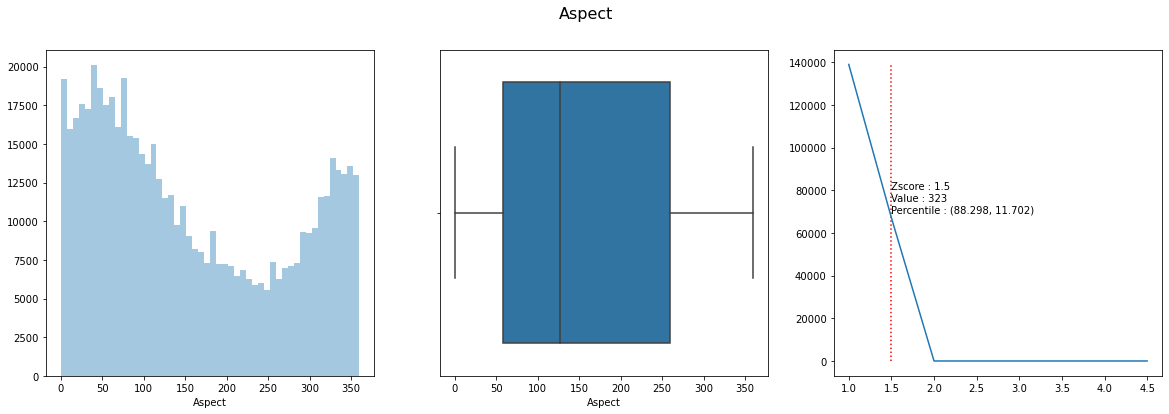

--------------------------------------
Slope


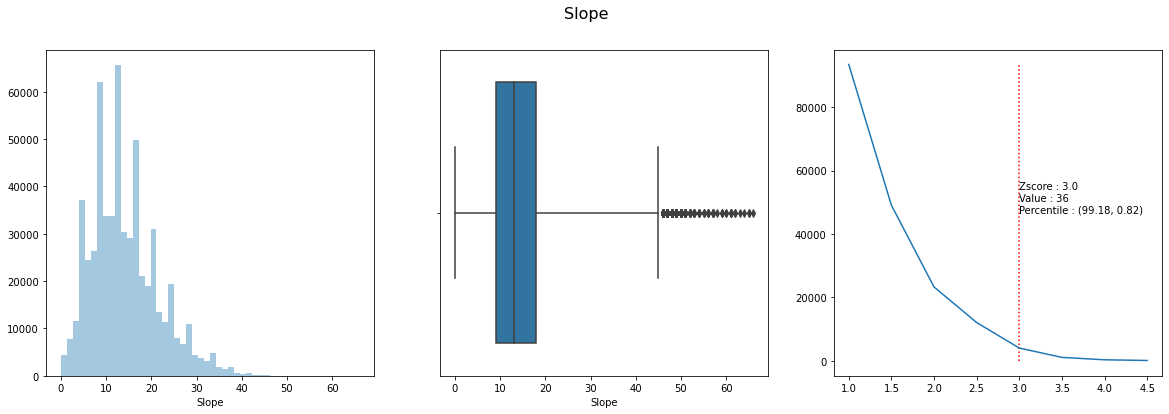

--------------------------------------
Horizontal_Distance_To_Hydrology


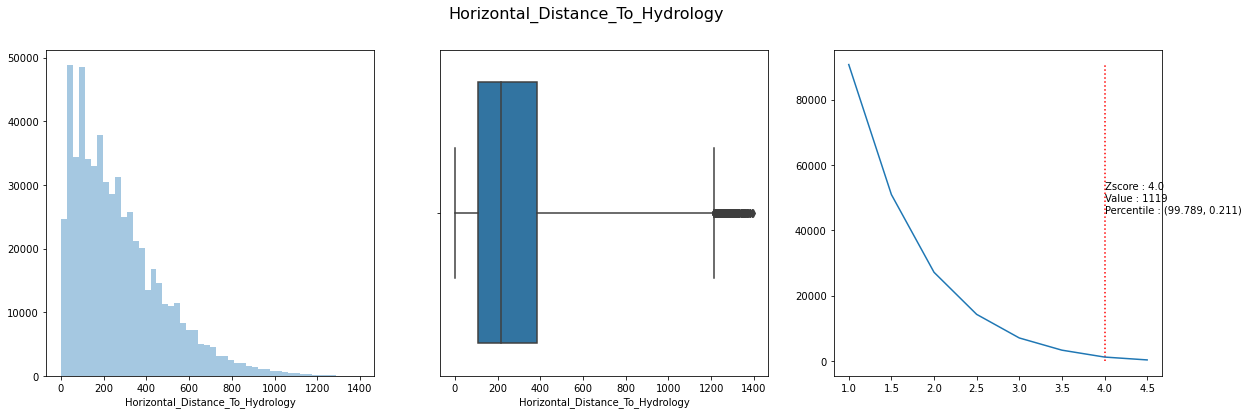

--------------------------------------
Vertical_Distance_To_Hydrology


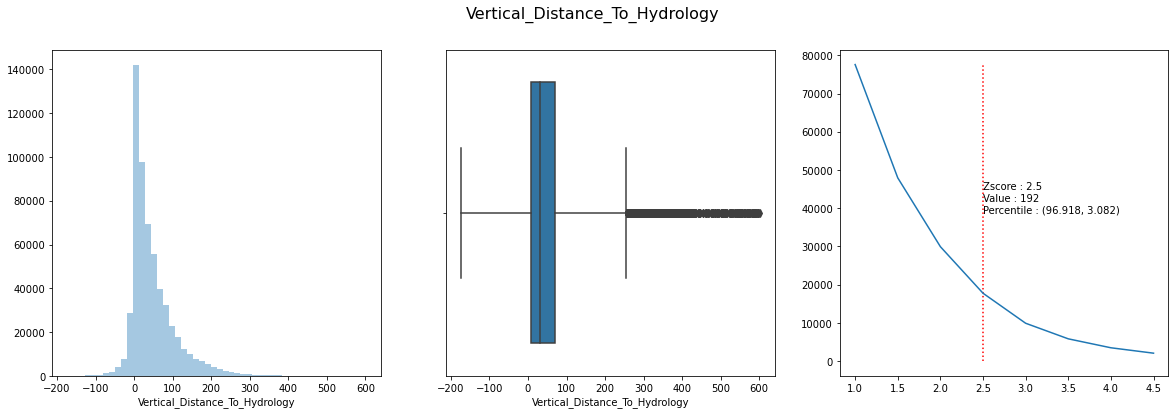

--------------------------------------
Horizontal_Distance_To_Roadways


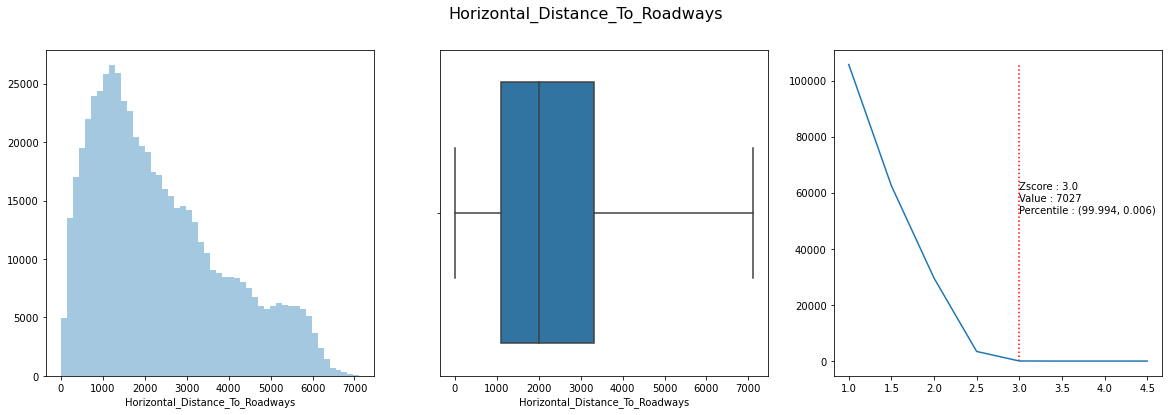

--------------------------------------
Hillshade_9am


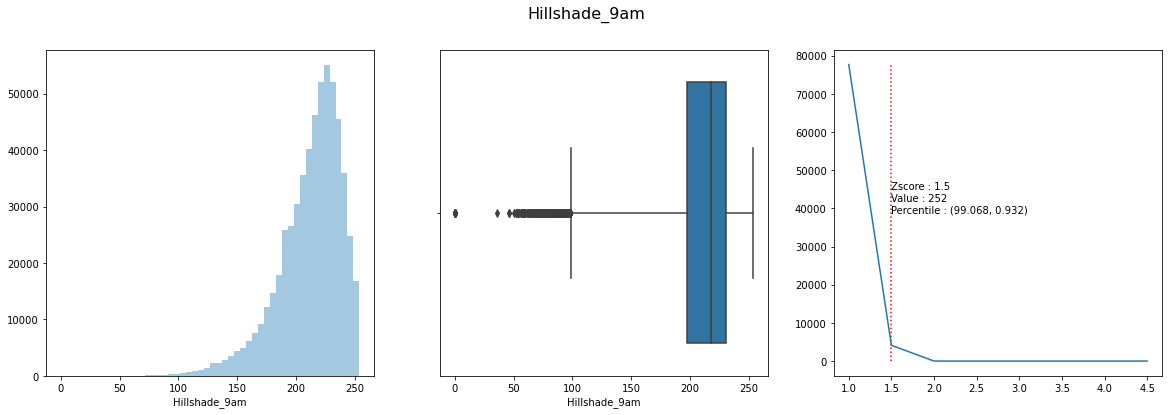

--------------------------------------
Hillshade_Noon


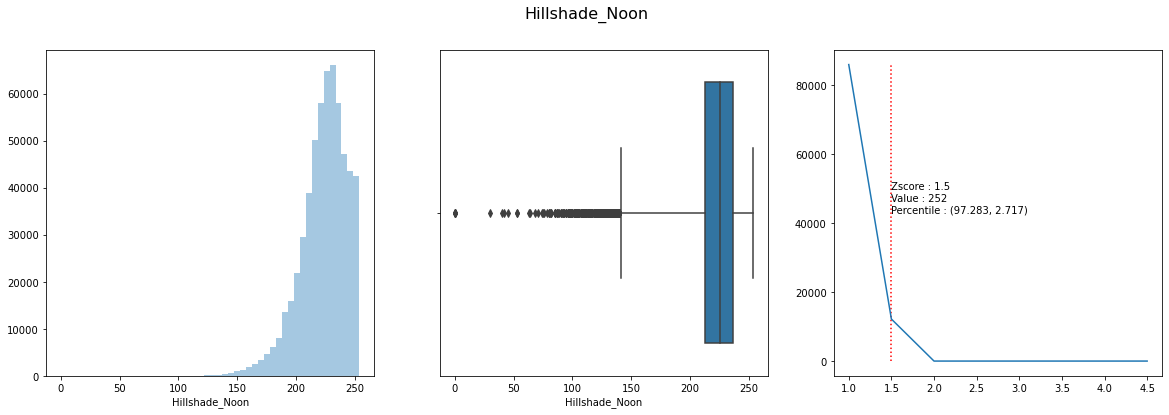

--------------------------------------
Hillshade_3pm


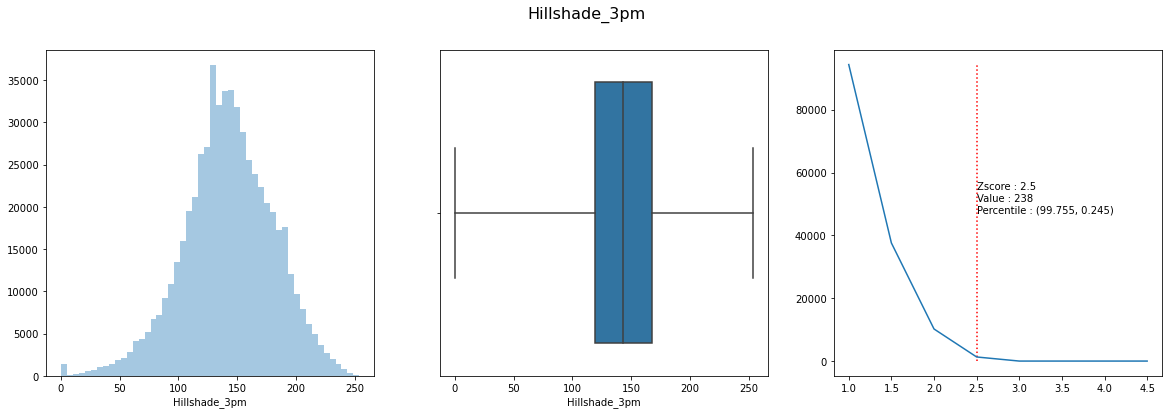

--------------------------------------
Horizontal_Distance_To_Fire_Points


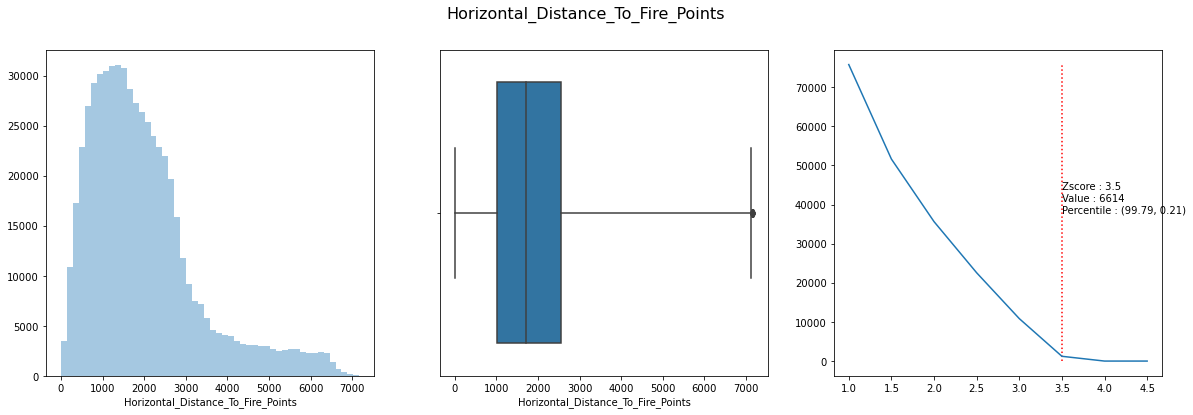

--------------------------------------
Wilderness_Area1


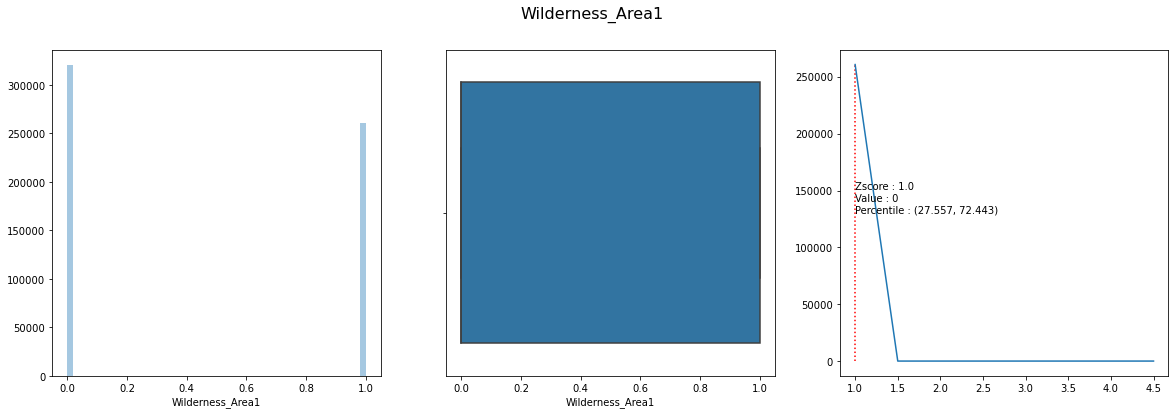

--------------------------------------
Wilderness_Area2


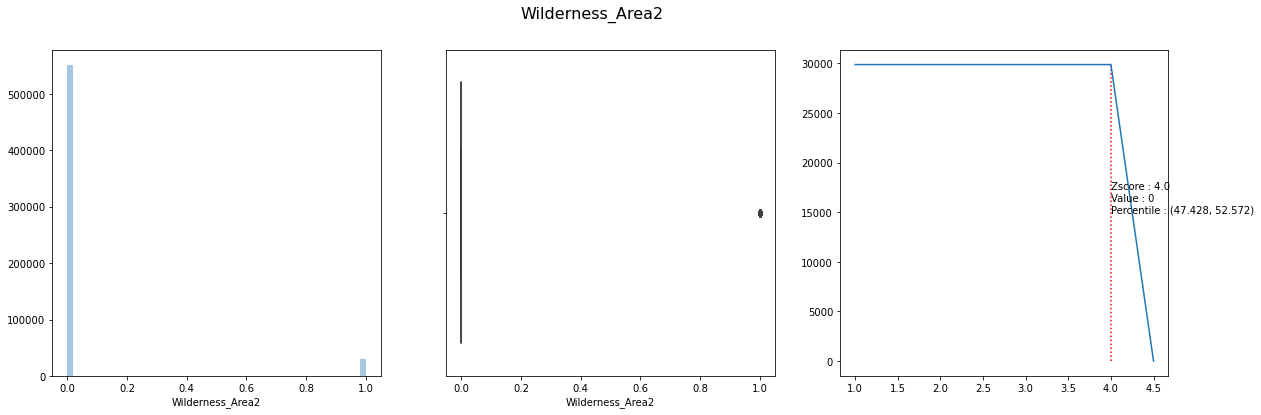

--------------------------------------
Wilderness_Area3


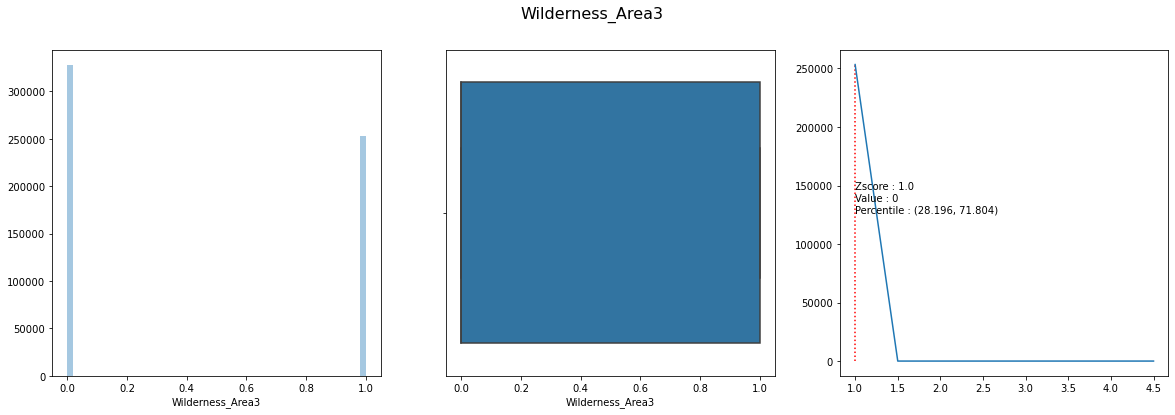

--------------------------------------
Wilderness_Area4


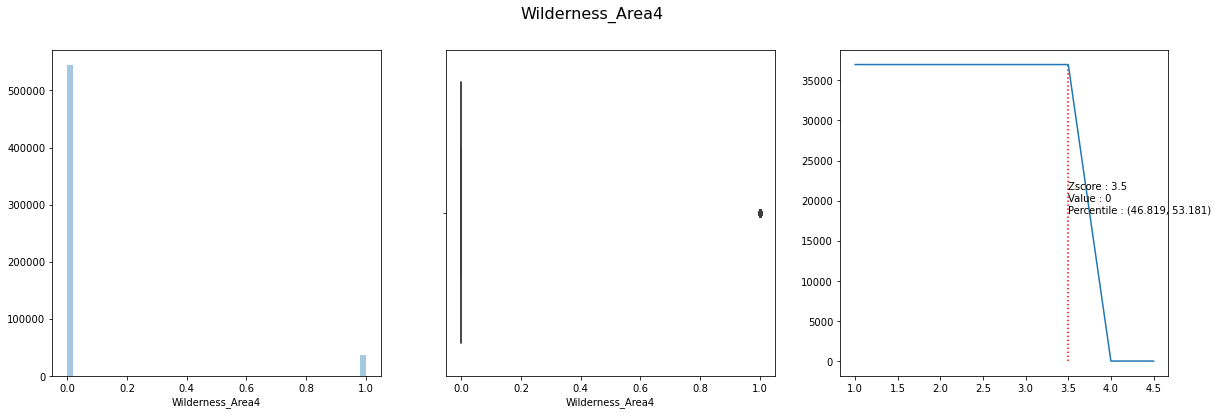

--------------------------------------
Soil_Type1


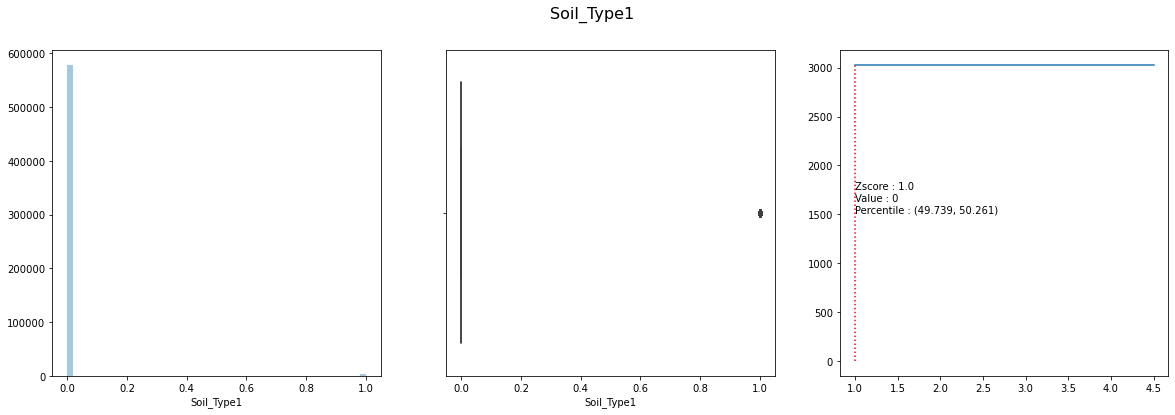

--------------------------------------
Soil_Type2


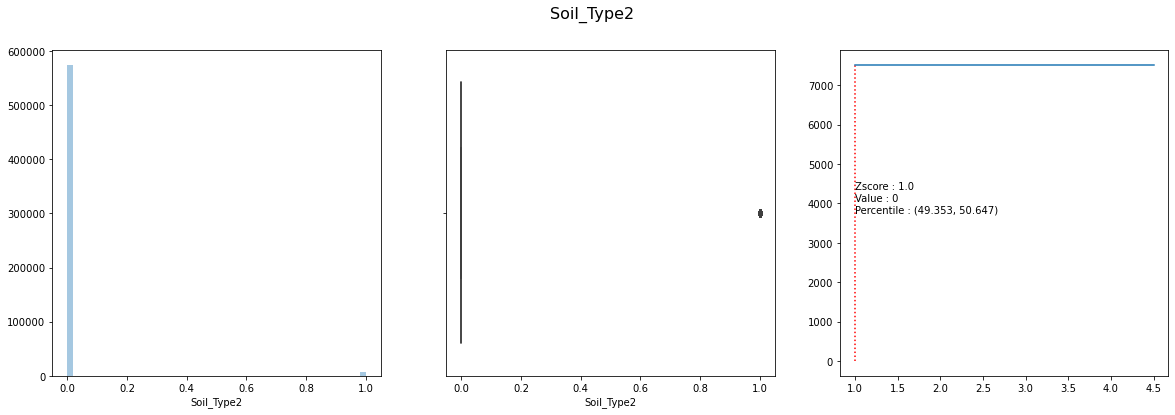

--------------------------------------
Soil_Type3


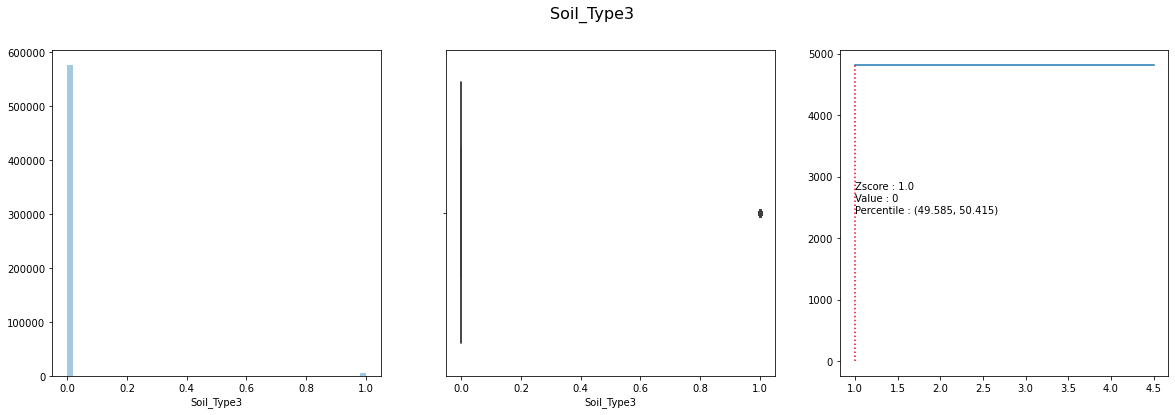

--------------------------------------
Soil_Type4


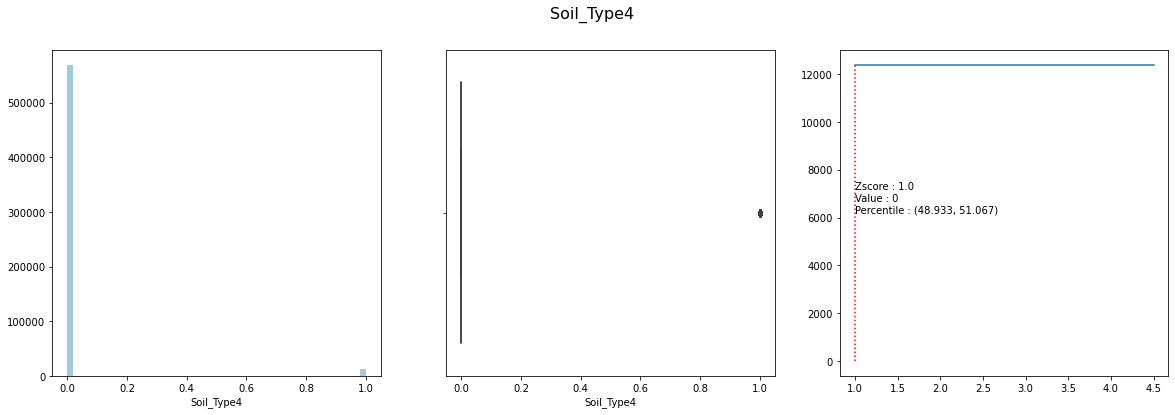

--------------------------------------
Soil_Type5


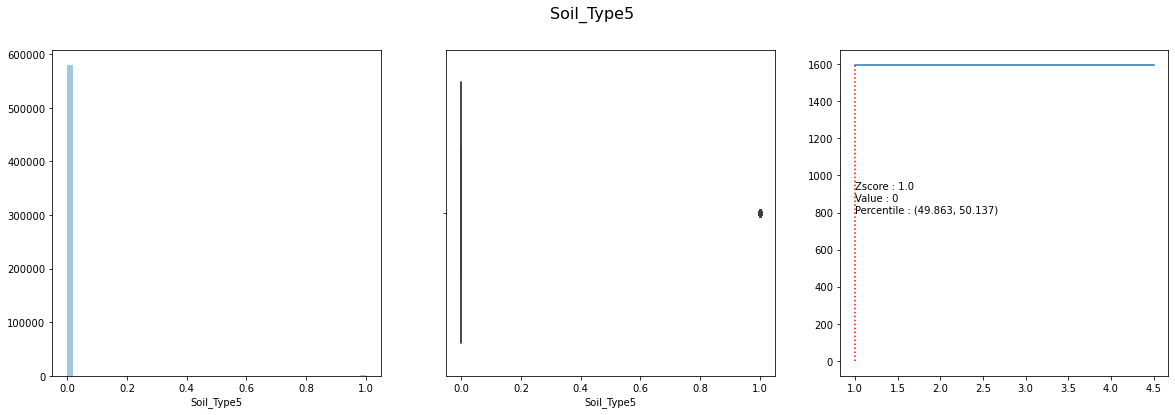

--------------------------------------
Soil_Type6


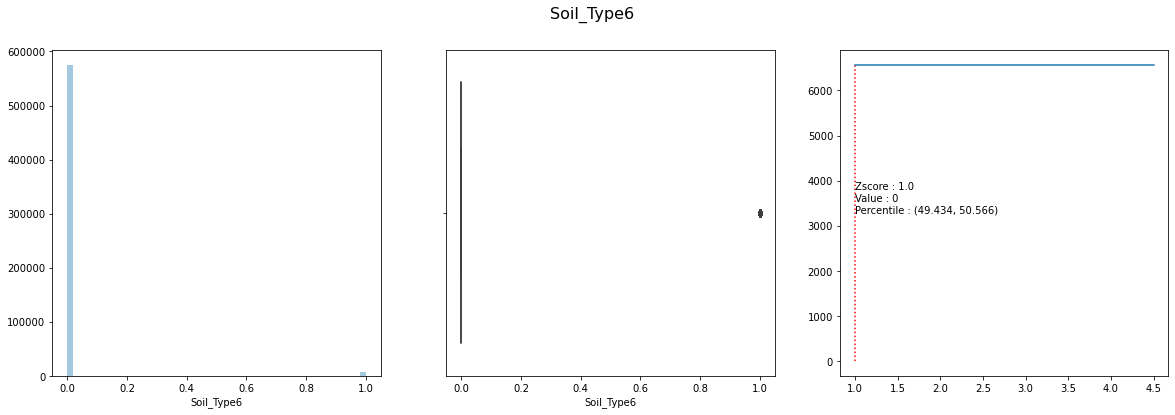

--------------------------------------
Soil_Type10


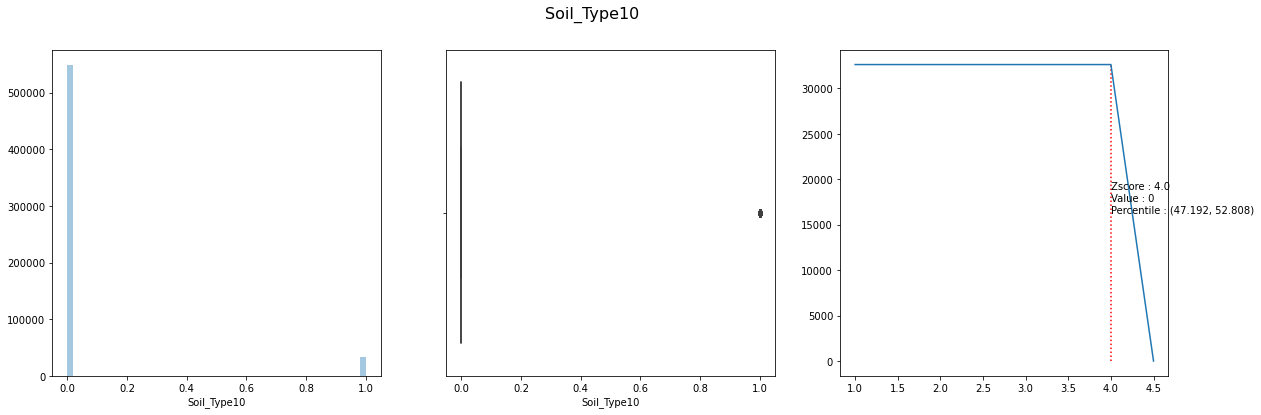

--------------------------------------
Soil_Type11


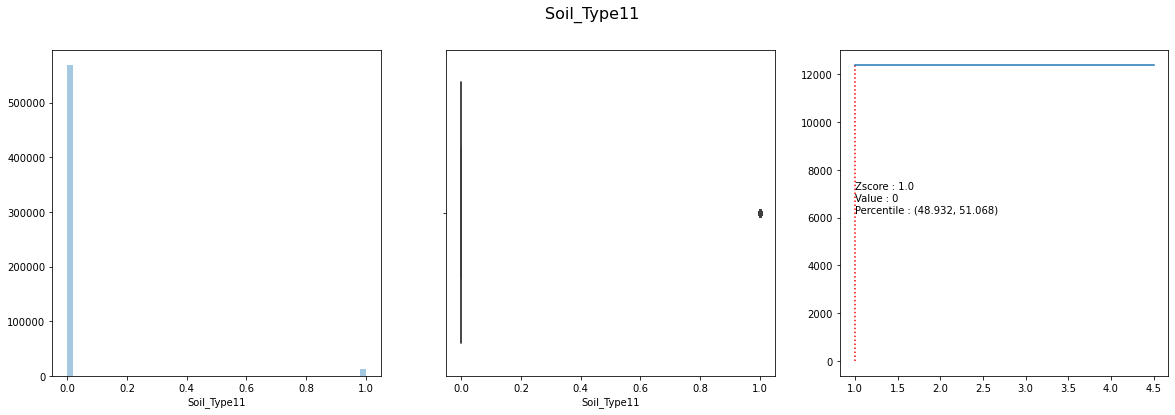

--------------------------------------
Soil_Type12


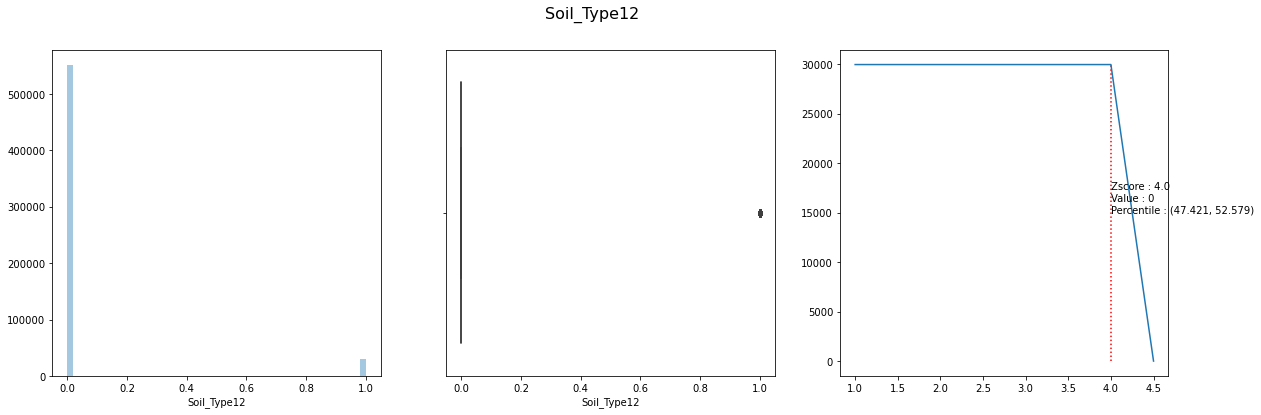

--------------------------------------
Soil_Type17


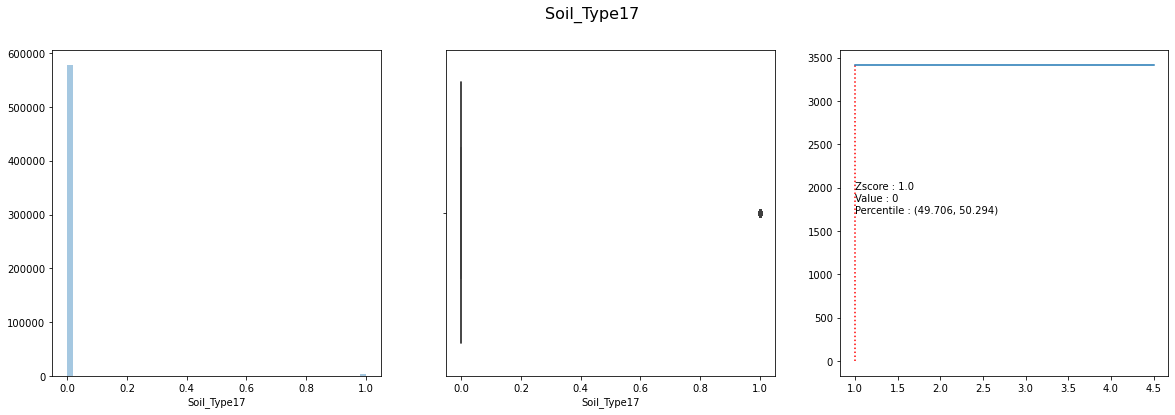

--------------------------------------
Soil_Type19


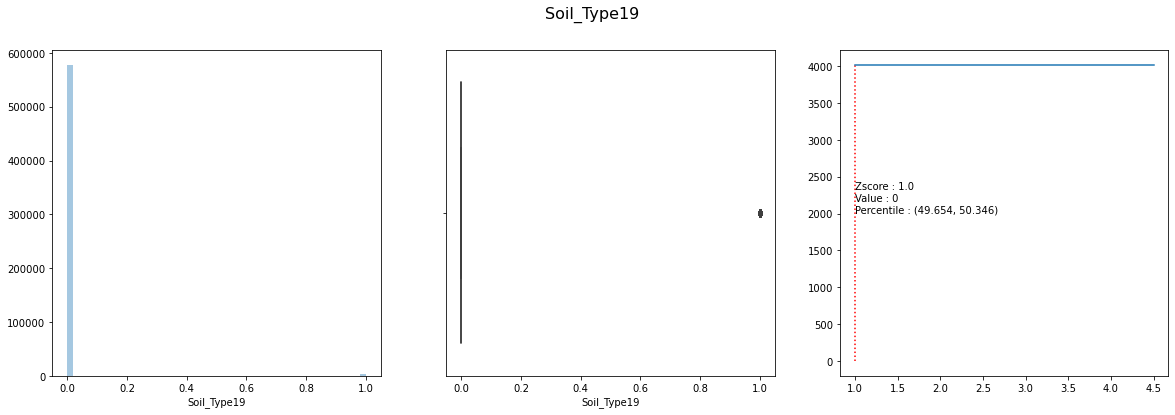

--------------------------------------
Soil_Type20


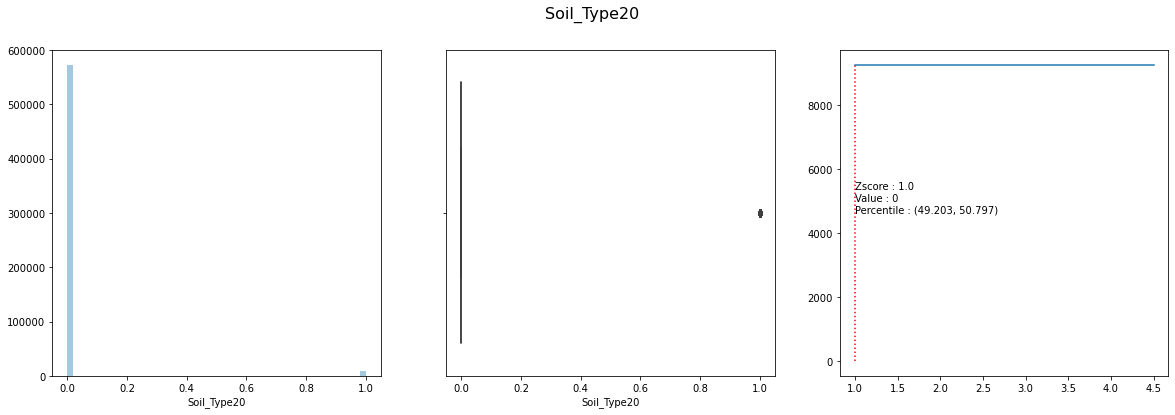

--------------------------------------
Soil_Type22


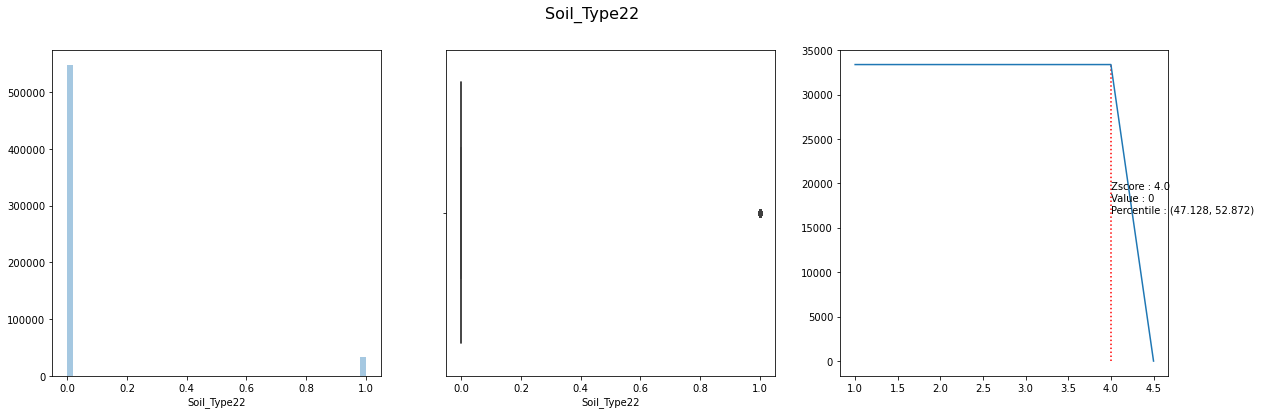

--------------------------------------
Soil_Type23


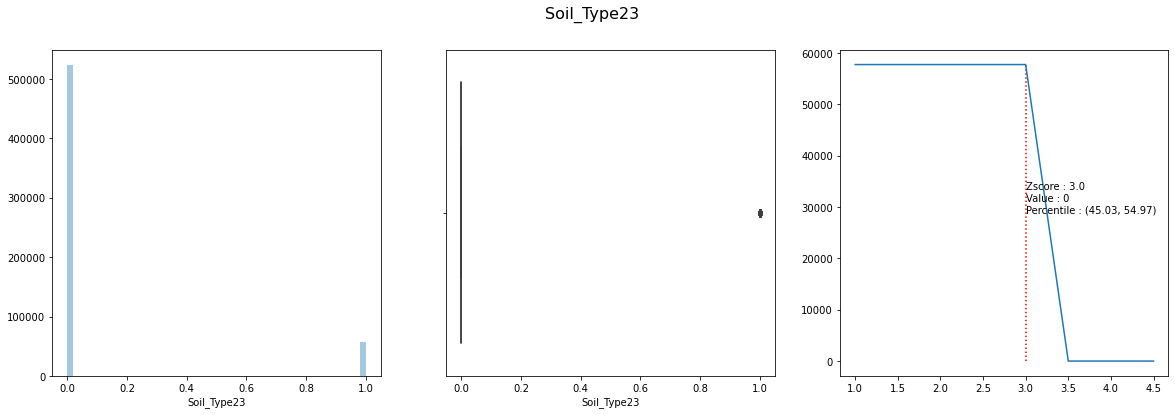

--------------------------------------
Soil_Type24


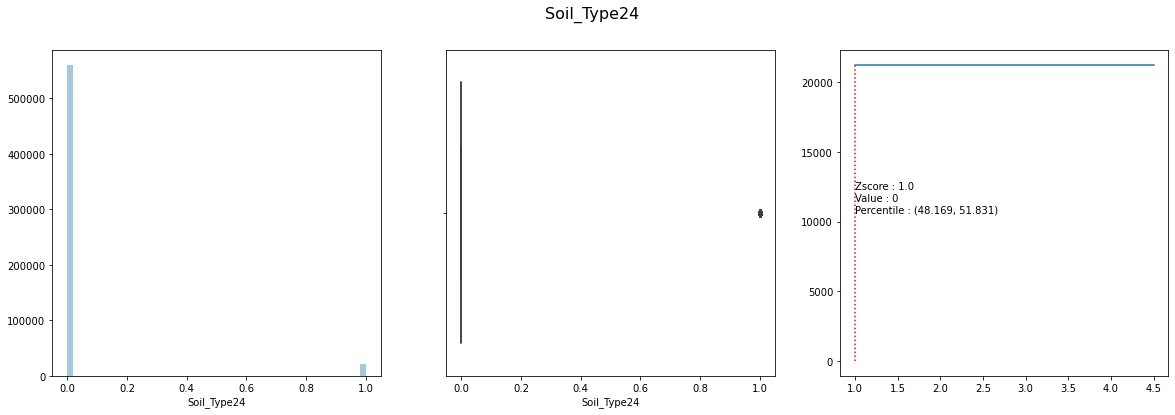

--------------------------------------
Soil_Type29


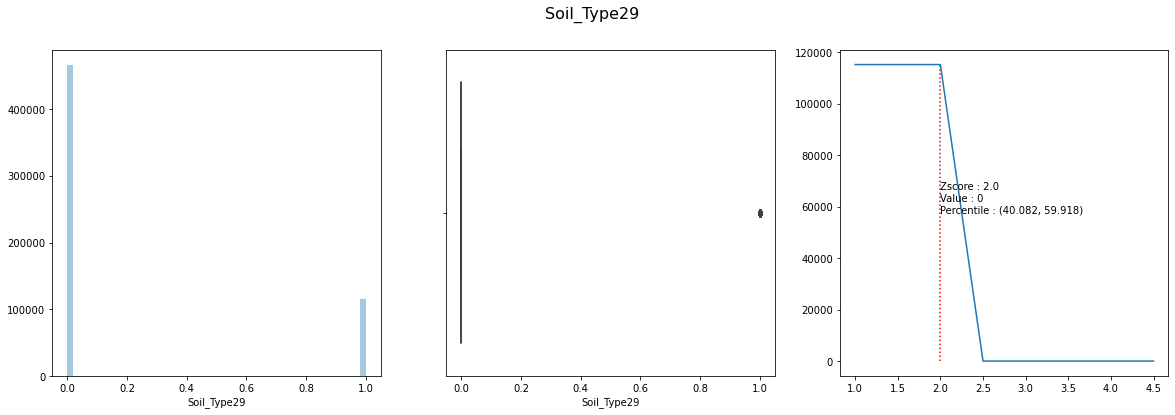

--------------------------------------
Soil_Type31


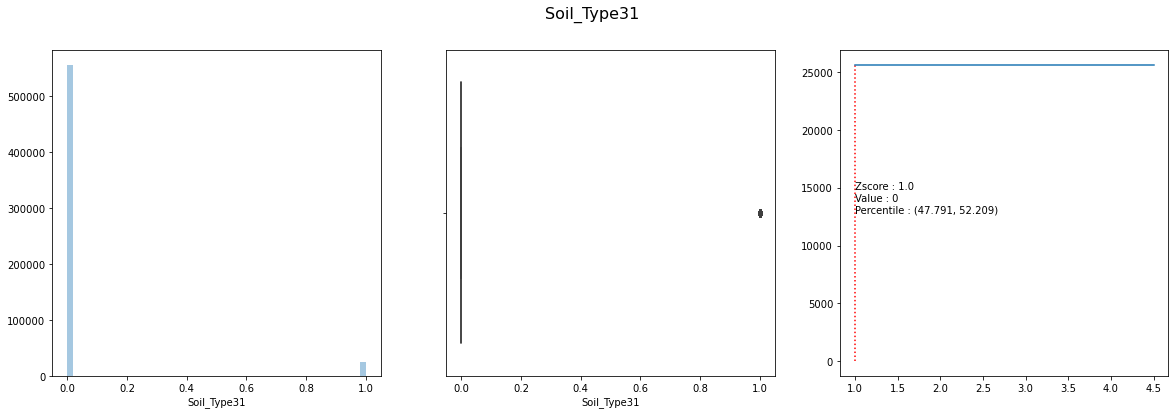

--------------------------------------
Soil_Type32


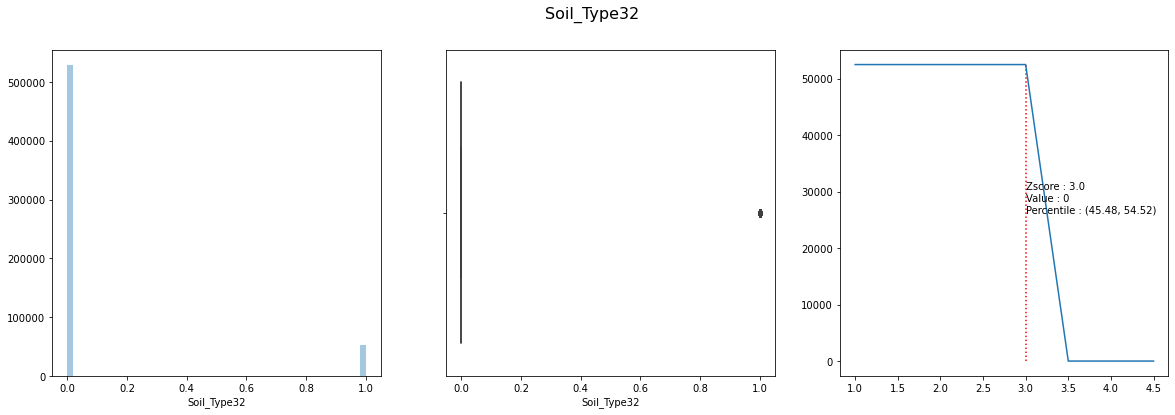

--------------------------------------
Soil_Type33


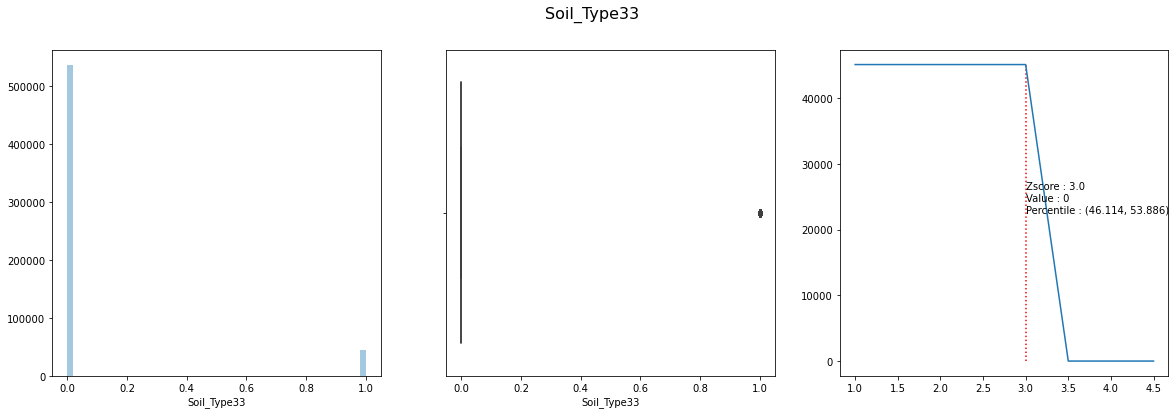

--------------------------------------
Soil_Type35


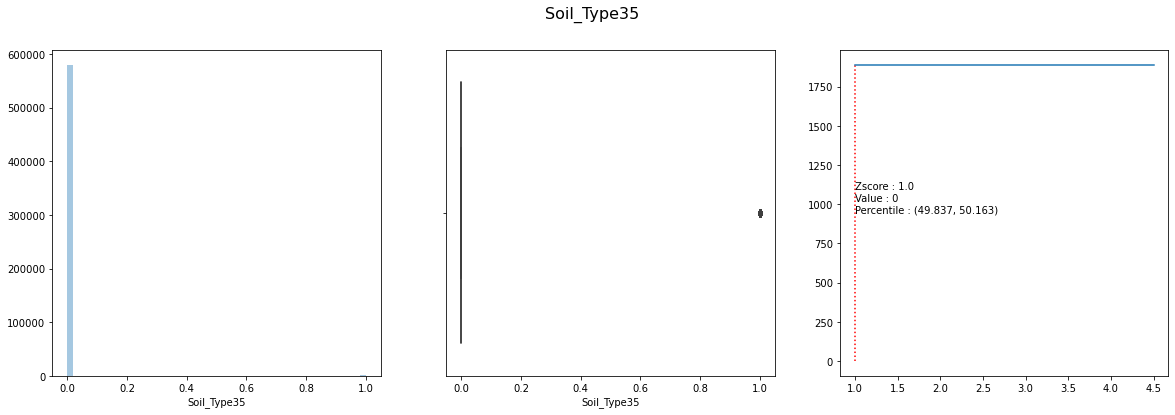

--------------------------------------
Soil_Type38


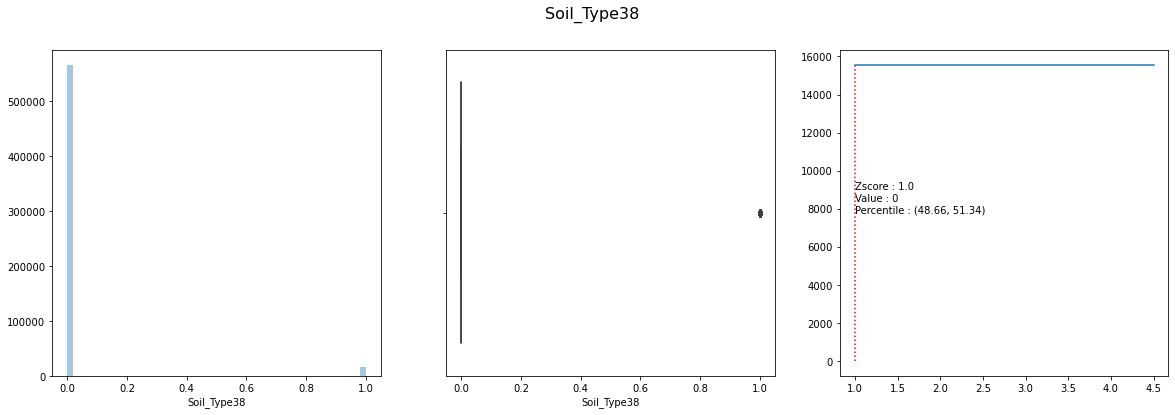

--------------------------------------
Soil_Type39


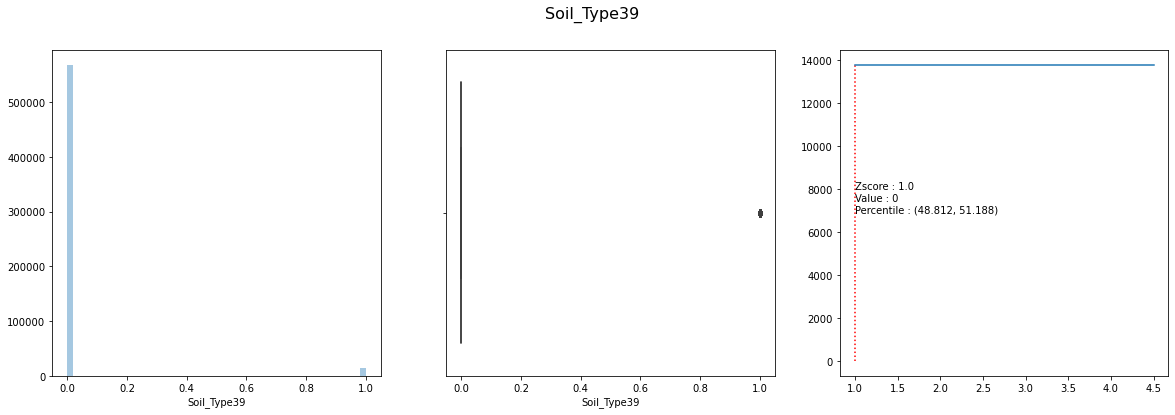

--------------------------------------
Soil_Type40


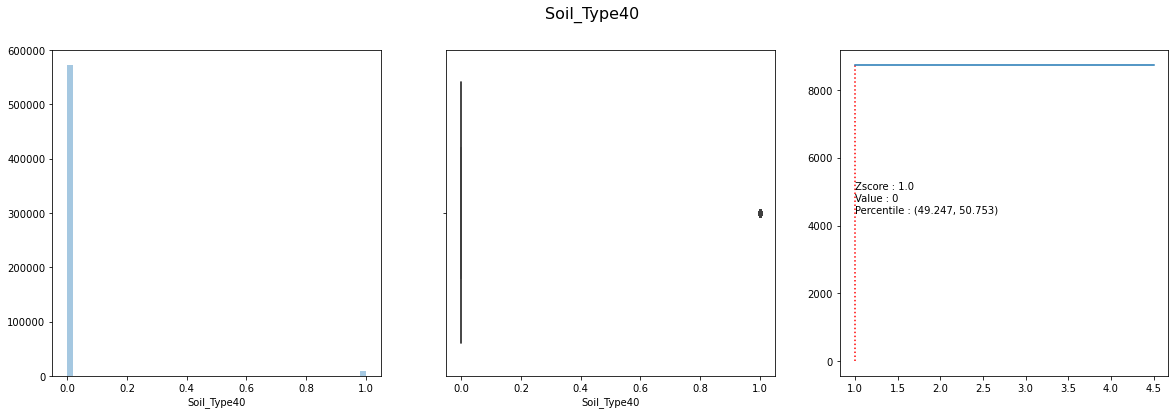

--------------------------------------
Cover_Type


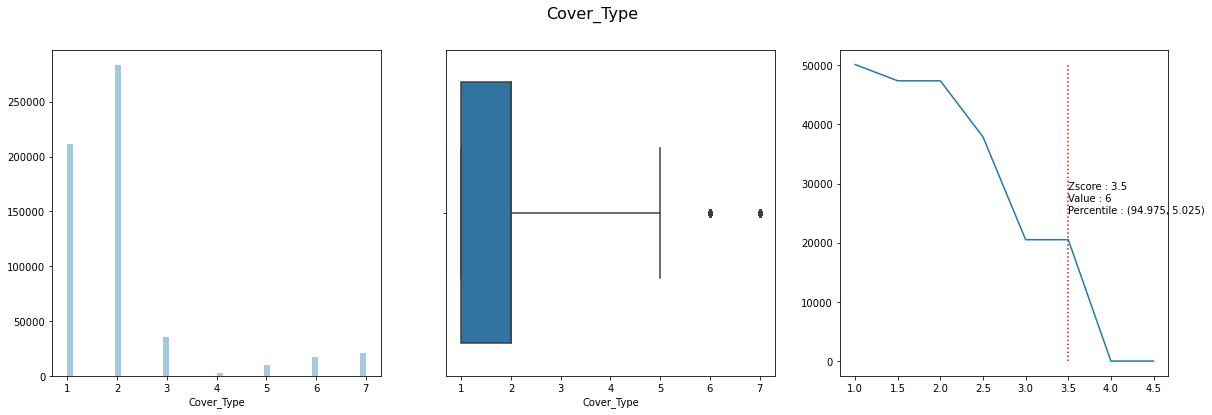

--------------------------------------


In [21]:
for i in df2.columns:
    print(i)
    outlier_inspect_whis_3(df2, i)
    plt.show()
    print("--------------------------------------")

"""
We can delete below according to outliers visuals with whiskers 3 which is quite enough...
slope > 45
Horizontal_Distance_To_Hydrology >1200
Vertical_Distance_To_Hydrology > 250
Hillshade_9am < 100
Hillshade_Noon < 120
"""
"""
drop column bec it will have no effect
Soil_Type17
Soil_Type31
Soil_Type32
Soil_Type33
"""

In [22]:
dopcol = ['Soil_Type17','Soil_Type31','Soil_Type32','Soil_Type33']
df3 = df2.drop(dopcol,axis = 1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [23]:
"""We can delete below according to outliers visuals with whiskers 3 which is quite enough...
slope > 45
Horizontal_Distance_To_Hydrology >1200
Vertical_Distance_To_Hydrology > 250
Hillshade_9am < 100
Hillshade_Noon < 120"""
df3 = df3.drop(df3[df3['Slope']> 45].index)
df3 = df3.drop(df3[df3['Horizontal_Distance_To_Hydrology']>1200].index)
df3 = df3.drop(df3[df3['Vertical_Distance_To_Hydrology']> 250].index)
df3 = df3.drop(df3[df3['Hillshade_9am']< 100].index)
df3 = df3.drop(df3[df3['Hillshade_Noon']< 140].index)

'Elevation'


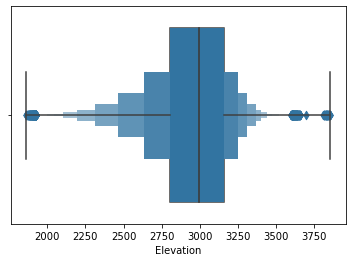

--------------------------------------
'Aspect'


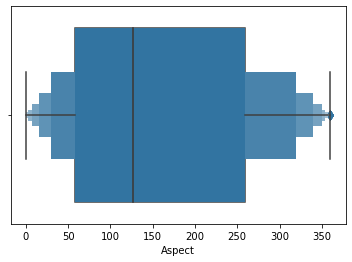

--------------------------------------
'Slope'


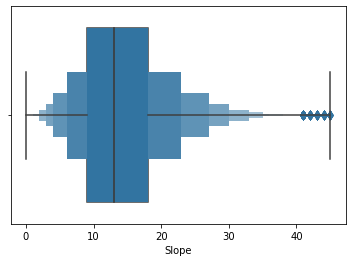

--------------------------------------
'Horizontal_Distance_To_Hydrology'


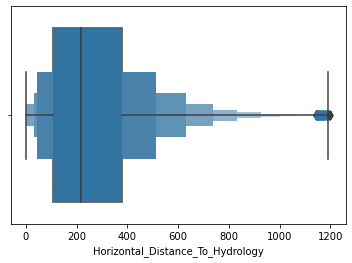

--------------------------------------
'Vertical_Distance_To_Hydrology'


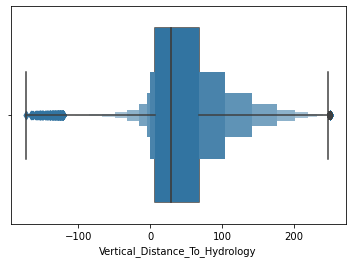

--------------------------------------
'Horizontal_Distance_To_Roadways'


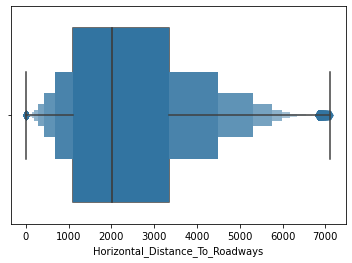

--------------------------------------
'Hillshade_9am'


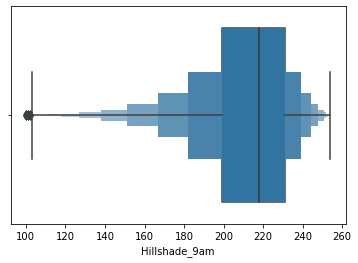

--------------------------------------
'Hillshade_Noon'


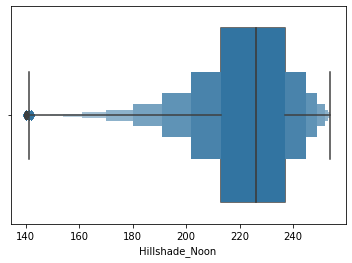

--------------------------------------
'Hillshade_3pm'


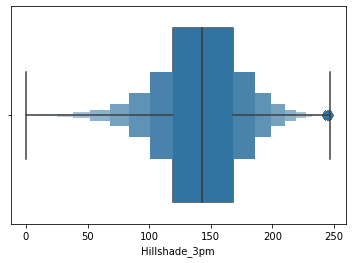

--------------------------------------
'Horizontal_Distance_To_Fire_Points'


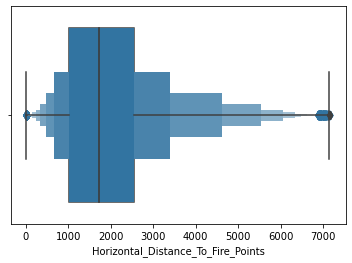

--------------------------------------
'Wilderness_Area1'


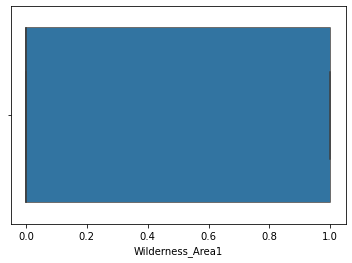

--------------------------------------
'Wilderness_Area2'


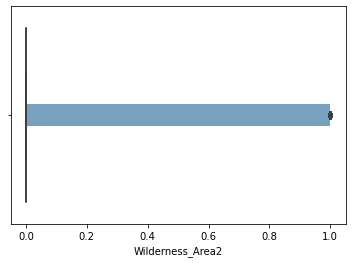

--------------------------------------
'Wilderness_Area3'


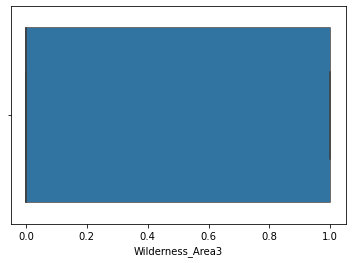

--------------------------------------
'Wilderness_Area4'


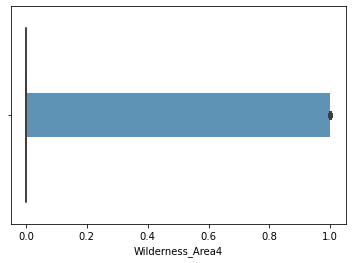

--------------------------------------
'Soil_Type1'


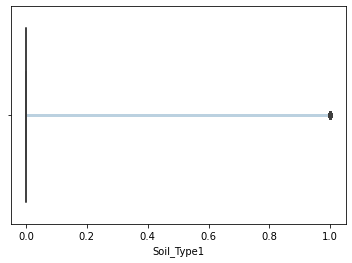

--------------------------------------
'Soil_Type2'


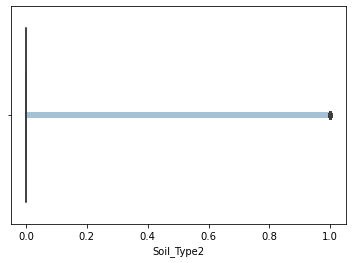

--------------------------------------
'Soil_Type3'


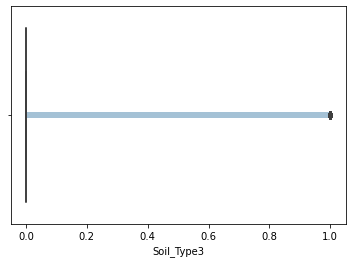

--------------------------------------
'Soil_Type4'


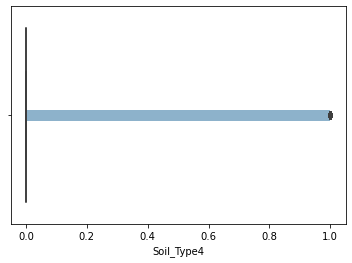

--------------------------------------
'Soil_Type5'


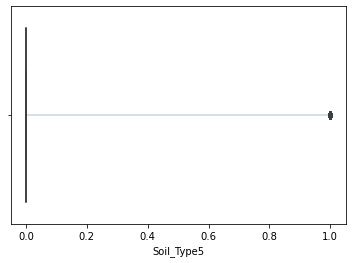

--------------------------------------
'Soil_Type6'


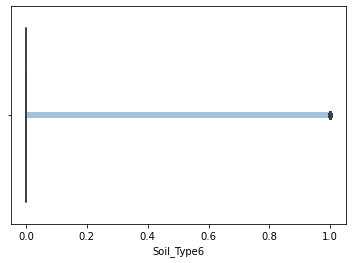

--------------------------------------
'Soil_Type10'


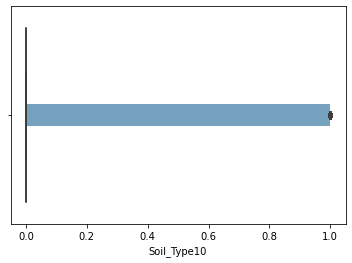

--------------------------------------
'Soil_Type11'


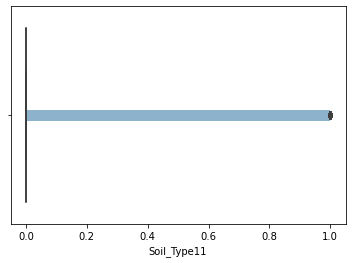

--------------------------------------
'Soil_Type12'


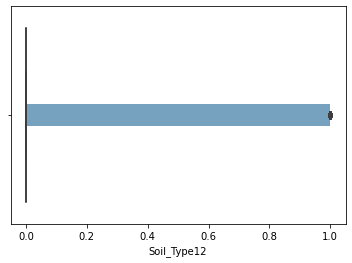

--------------------------------------
'Soil_Type19'


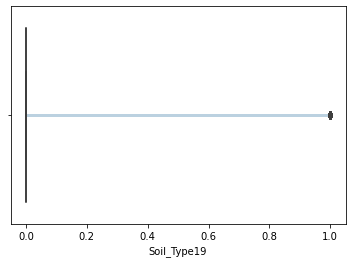

--------------------------------------
'Soil_Type20'


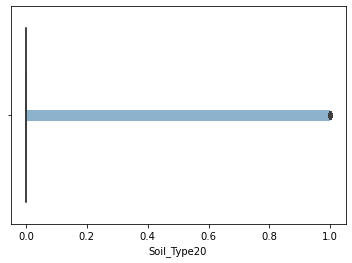

--------------------------------------
'Soil_Type22'


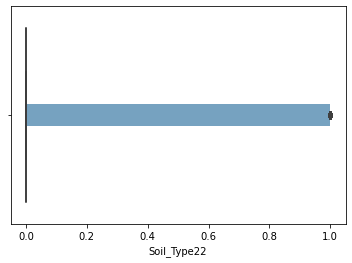

--------------------------------------
'Soil_Type23'


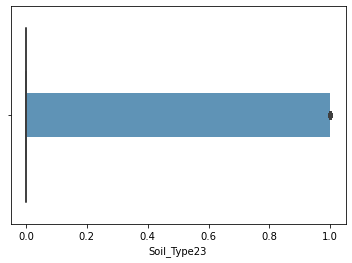

--------------------------------------
'Soil_Type24'


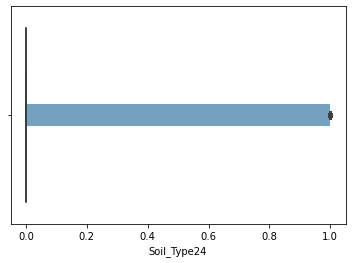

--------------------------------------
'Soil_Type29'


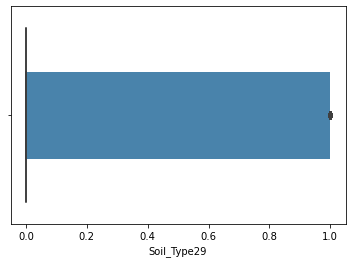

--------------------------------------
'Soil_Type35'


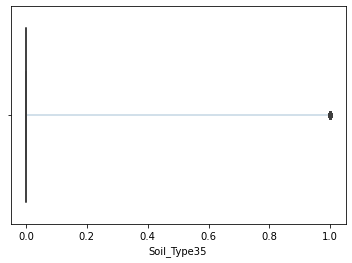

--------------------------------------
'Soil_Type38'


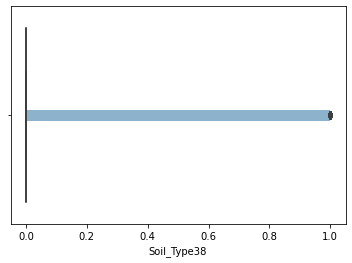

--------------------------------------
'Soil_Type39'


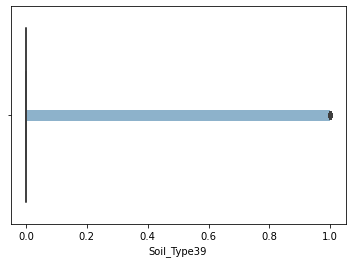

--------------------------------------
'Soil_Type40'


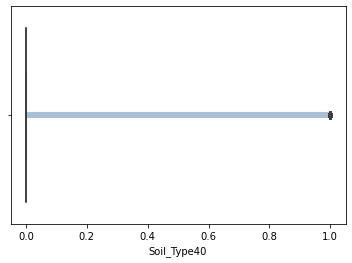

--------------------------------------
'Cover_Type'


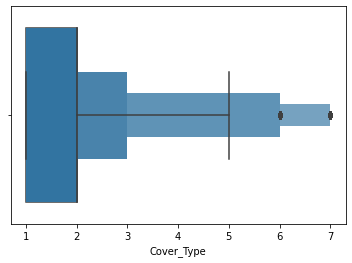

--------------------------------------


In [24]:
for i in df3.columns:
    print("'" + i +"'")
    sns.boxplot(df3[i],whis=3)
    sns.boxenplot(df3[i])
    plt.show()
    print("--------------------------------------")

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [25]:
#i prefer to skip this as of now

In [26]:
df3

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
0                                     6279                 1   
1                                     6225                 1   
2                                     6121                 1   
3                                     6211                 1   
4                                     6172                 1   
...                                    ...               ...   
581007                                 837                 0   
581008                                 845                 0   
581009                                 854                 0   
581010                                 864                 0   
581011                                 875                 0   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
0                      0                 0                 0           0   
1                      0                 0                 0           0   
2                      0                 0                 0           0   
3                      0                 0                 0           0   
4                      0                 0                 0           0   
...                  ...               ...               ...         ...   
581007                 0                 1                 0           0   
581008                 0                 1                 0           0   
581009                 0                 1                 0           0   
581010                 0                 1                 0    

In [27]:
df3.to_csv('tree_updated',index_label=False)

***
***

In [1]:
df = pd.read_csv('tree_updated')
df

NameError: name 'pd' is not defined

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('tree_updated')
#df = df.head(100)

In [4]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type29, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 34 columns]


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [5]:
X = df.drop(['Cover_Type'],axis = 1)
y = df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

## trying with KNN took ages so i decided skip KNN, KNN is good at small datasets...
"""from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale, StandardScaler
knn_sc = StandardScaler()
X_train_s = knn_sc.fit_transform(X_train)
X_test_s = knn_sc.transform(X_test)

model_knn_sc = KNeighborsClassifier(n_neighbors = 1).fit(X_train_s, y_train)
y_pred = model_knn_sc.predict(X_test_s)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="viridis",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

"""

"""#KNN Tune
error_rate = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_s, y_train)
    y_pred_i = model.predict(X_test_s)  
    error_rate.append(np.mean(y_pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')"""

"""acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_s,y_train)
    yhat = neigh.predict(X_test_s)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))"""

"""# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_test_s)
print('WITH K=15')
print('\n')
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))"""

"""from yellowbrick.classifier import ConfusionMatrix
knn_cm = ConfusionMatrix(knn)
knn_cm.fit(X_train_s, y_train)
knn_cm.score(X_test_s, y_test)
knn_cm.show()"""

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
model_dt_cm = ConfusionMatrix(model_dt)
model_dt_cm.fit(X_train, y_train)
model_dt_cm.score(X_test, y_test)
model_dt_cm.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59026  3878     1     0    18    10   135]
 [ 1940 81254   169     0    92   111    18]
 [    1   179 10051    32     6   198     0]
 [    0     0    91   722     0    25     0]
 [   58   699    42     0  2098     9     0]
 [    7   179   360    22     1  4655     0]
 [  279    30     0     0     1     0  5465]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63068
           2       0.94      0.97      0.96     83584
           3       0.94      0.96      0.95     10467
           4       0.93      0.86      0.89       838
           5       0.95      0.72      0.82      2906
           6       0.93      0.89      0.91      5224
           7       0.97      0.95      0.96      5775

    accuracy                           0.95    171862
   macro avg       0.95      0.90      0.92    171862
weighted avg       0.95      0.95      0.95    171862



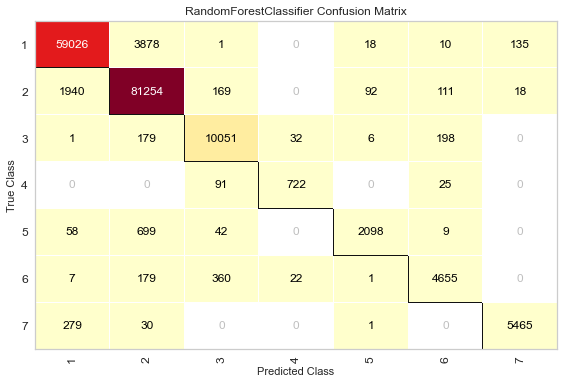

In [5]:
from yellowbrick.classifier import ConfusionMatrix
rf_model_cm = ConfusionMatrix(rf_model)
rf_model_cm.fit(X_train, y_train)
rf_model_cm.score(X_test, y_test)
rf_model_cm.show()

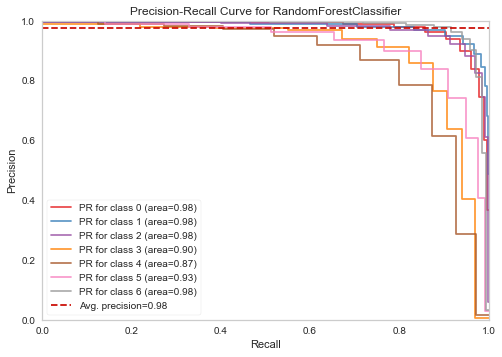

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

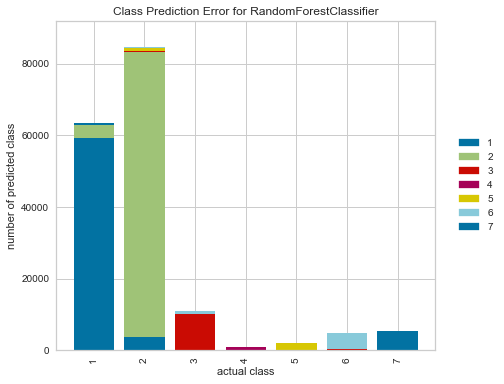

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10))

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [7]:
#**RF Tunning**
rf=RandomForestClassifier()
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print(rf_cv_model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 154.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 257.2min finished


{'max_depth': 7, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 50}


In [9]:
print(rf_cv_model.best_params_['n_estimators'])

50


In [10]:
# rf_tuned = RandomForestClassifier(max_depth = 9,             
#                                   max_features = 3, 
#                                   min_samples_split = 4, 
#                                   n_estimators = 1000).fit(X_train, y_train)
rf_tuned = RandomForestClassifier(max_depth = rf_cv_model.best_params_['max_depth'],             
                                  max_features = rf_cv_model.best_params_['max_features'], 
                                  min_samples_split = rf_cv_model.best_params_['min_samples_split'], 
                                  n_estimators = rf_cv_model.best_params_['n_estimators']).fit(X_train, y_train)


y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46541 16294     4     0     0     0   229]
 [17195 65846   516     0     0    26     1]
 [    0  1916  8490    15     0    46     0]
 [    0     0   614   221     0     3     0]
 [    0  2855    51     0     0     0     0]
 [    0  2086  2754    12     0   372     0]
 [ 3976     7     0     0     0     0  1792]]
              precision    recall  f1-score   support

           1       0.69      0.74      0.71     63068
           2       0.74      0.79      0.76     83584
           3       0.68      0.81      0.74     10467
           4       0.89      0.26      0.41       838
           5       0.00      0.00      0.00      2906
           6       0.83      0.07      0.13      5224
           7       0.89      0.31      0.46      5775

    accuracy                           0.72    171862
   macro avg       0.67      0.43      0.46    171862
weighted avg       0.71      0.72      0.70    171862



In [11]:
rf_tuned = RandomForestClassifier(max_depth = 9,             
                                   max_features = 20, 
                                   min_samples_split = 6, 
                                   n_estimators = 50).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46732 16001     5     0     1     3   326]
 [12739 70134   403     4    37   255    12]
 [    0  1090  9015    77     0   285     0]
 [    0     0   258   574     0     6     0]
 [   27  2391    67     0   420     1     0]
 [    0  1401  1916    22     0  1885     0]
 [ 1848    14     0     0     0     0  3913]]
              precision    recall  f1-score   support

           1       0.76      0.74      0.75     63068
           2       0.77      0.84      0.80     83584
           3       0.77      0.86      0.81     10467
           4       0.85      0.68      0.76       838
           5       0.92      0.14      0.25      2906
           6       0.77      0.36      0.49      5224
           7       0.92      0.68      0.78      5775

    accuracy                           0.77    171862
   macro avg       0.82      0.62      0.66    171862
weighted avg       0.78      0.77      0.77    171862



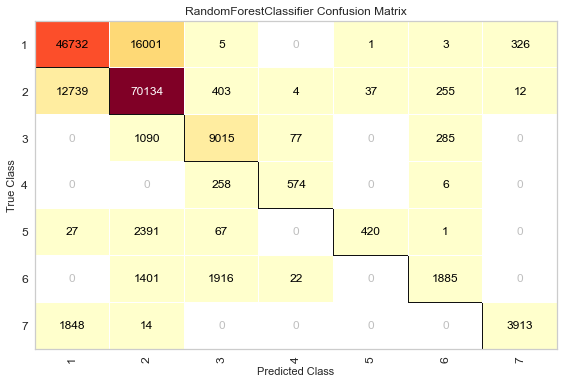

In [12]:
from yellowbrick.classifier import ConfusionMatrix
rf_tuned_cm = ConfusionMatrix(rf_tuned)
rf_tuned_cm.fit(X_train, y_train)
rf_tuned_cm.score(X_test, y_test)
rf_tuned_cm.show()

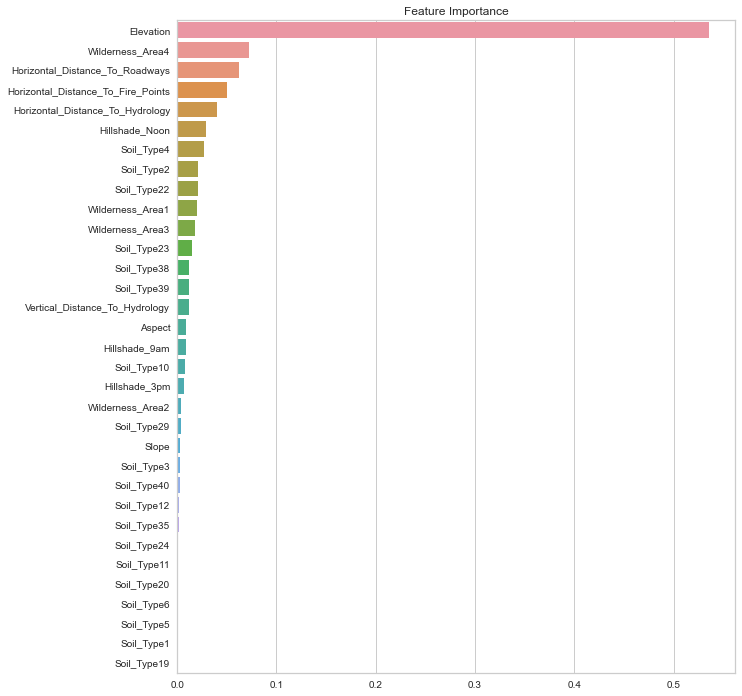

In [13]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize = (10, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [6]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52446 10327     1     0    23    13   258]
 [ 8135 74794   262     0   138   227    28]
 [    0   438  9506    48     2   473     0]
 [    0     0    85   722     0    31     0]
 [   27  1266    51     0  1553     9     0]
 [    7   384   615    25     2  4191     0]
 [  495    27     0     0     0     0  5253]]
              precision    recall  f1-score   support

           1       0.86      0.83      0.84     63068
           2       0.86      0.89      0.88     83584
           3       0.90      0.91      0.91     10467
           4       0.91      0.86      0.88       838
           5       0.90      0.53      0.67      2906
           6       0.85      0.80      0.82      5224
           7       0.95      0.91      0.93      5775

    accuracy                           0.86    171862
   macro avg       0.89      0.82      0.85    171862
weighted avg       0.86      0.86      0.86    171862



In [7]:
#**XBboost Tunning**
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50, 100, 300], "subsample":[0.5,0.8,1], "max_depth":[3,5,7], "learning_rate":[0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_cv_model.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [8]:
xgb_cv_model.best_params_

NameError: name 'xgb_cv_model' is not defined

In [9]:
#xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.8).fit(X_train, y_train)
xgb_tuned = XGBClassifier(learning_rate= xgb_cv_model.best_params_['learning_rate'], 
                          max_depth=  xgb_cv_model.best_params_['max_depth'], 
                          n_estimators= xgb_cv_model.best_params_['n_estimators'], 
                          subsample= xgb_cv_model.best_params_['subsample'] ).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'xgb_cv_model' is not defined

In [10]:
#xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.8).fit(X_train, y_train)
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                          max_depth=  7, 
                          n_estimators= 500, 
                          subsample= 0.8 ).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49111 13599     3     0     8     8   339]
 [10395 72563   354     0    80   172    20]
 [    0   807  9132    65     0   463     0]
 [    0     0   123   696     0    19     0]
 [   19  2100    51     0   734     2     0]
 [    8   941  1673    22     1  2579     0]
 [ 1201    13     0     0     0     0  4561]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.79     63068
           2       0.81      0.87      0.84     83584
           3       0.81      0.87      0.84     10467
           4       0.89      0.83      0.86       838
           5       0.89      0.25      0.39      2906
           6       0.80      0.49      0.61      5224
           7       0.93      0.79      0.85      5775

    accuracy                           0.81    171862
   macro avg       0.85      0.70      0.74    171862
weighted avg       0.81      0.81      0.81    171862



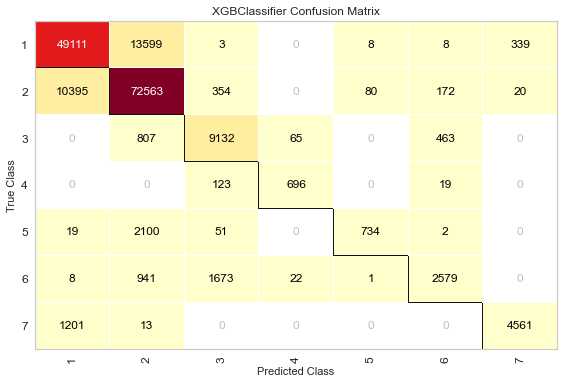

In [11]:
from yellowbrick.classifier import ConfusionMatrix
xgb_tuned_cm = ConfusionMatrix(xgb_tuned)
xgb_tuned_cm.fit(X_train, y_train)
xgb_tuned_cm.score(X_test, y_test)
xgb_tuned_cm.show()

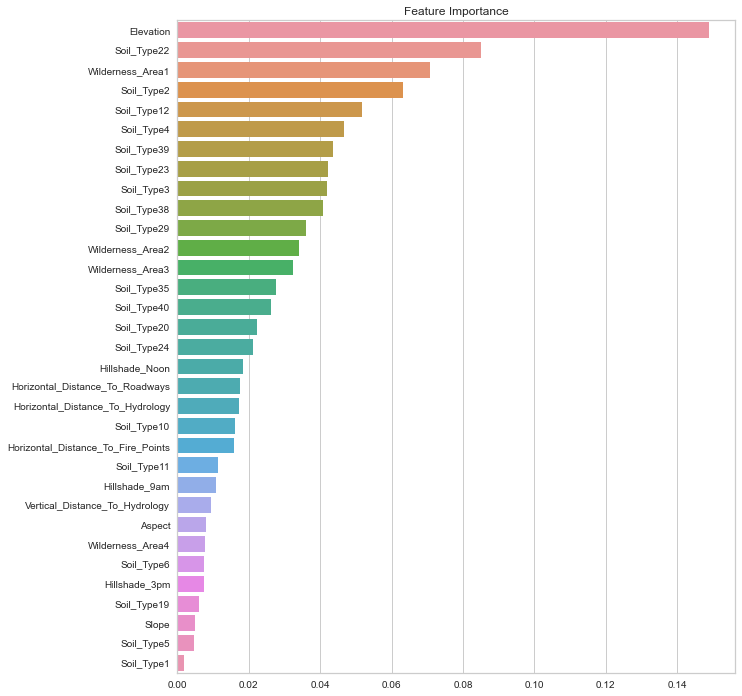

In [12]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize = (10, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import scale, StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
model_svc_sc = SVC().fit(X_train_s, y_train)
y_pred = model_svc_sc.predict(X_test_s)

from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid, verbose=3, refit=True)
grid.fit(X_train_s, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, grid_pred)
print(cnf_matrix)

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test,grid_pred))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
grid_cm = ConfusionMatrix(grid)
grid_cm.fit(X_train_s, y_train)
grid_cm.score(X_test_s, y_test)
grid_cm.show()

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Elevation


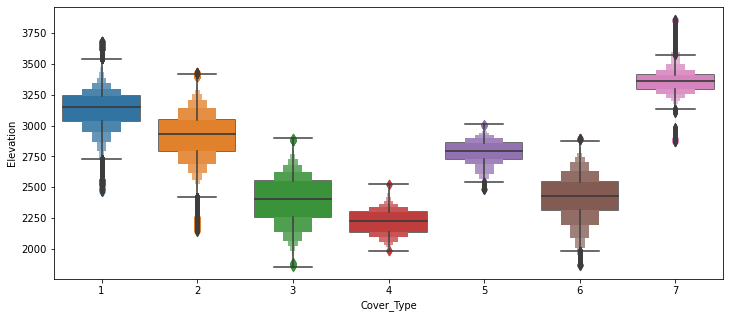

---------------------------------------------------
Aspect


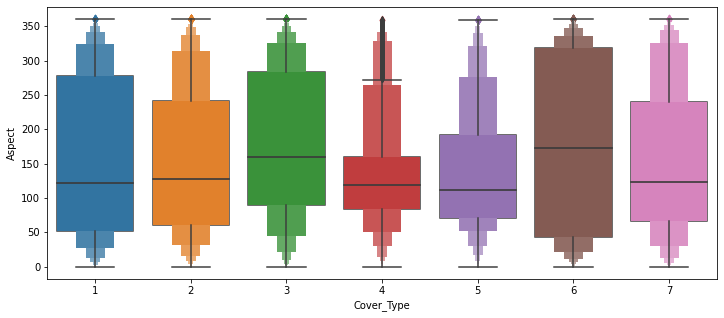

---------------------------------------------------
Slope


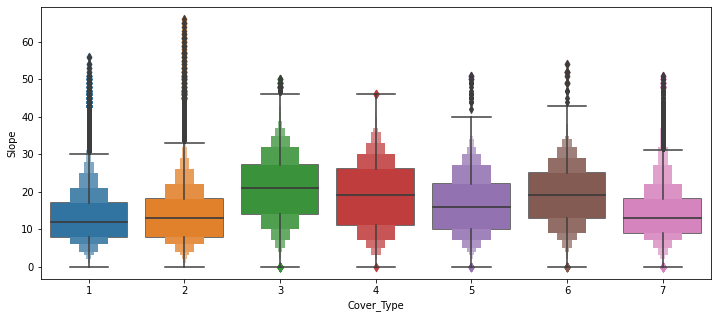

---------------------------------------------------
Horizontal_Distance_To_Hydrology


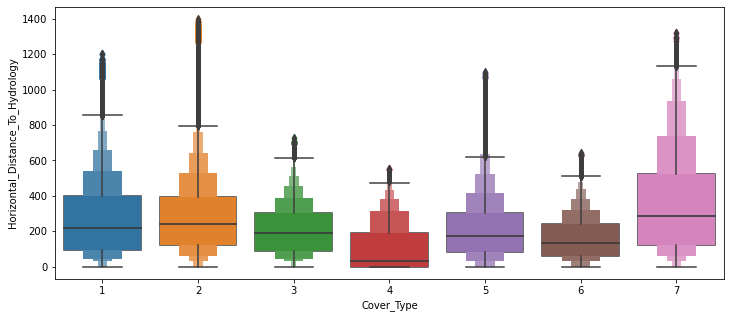

---------------------------------------------------
Vertical_Distance_To_Hydrology


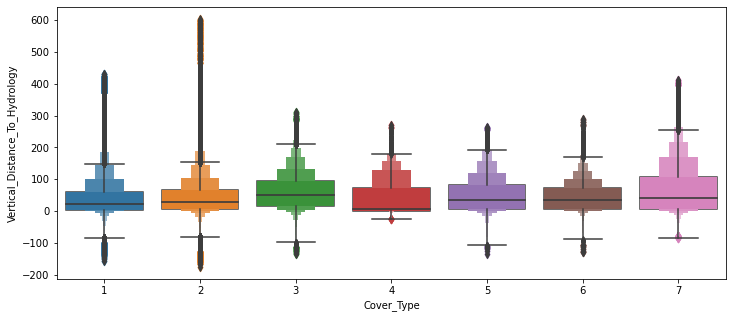

---------------------------------------------------
Horizontal_Distance_To_Roadways


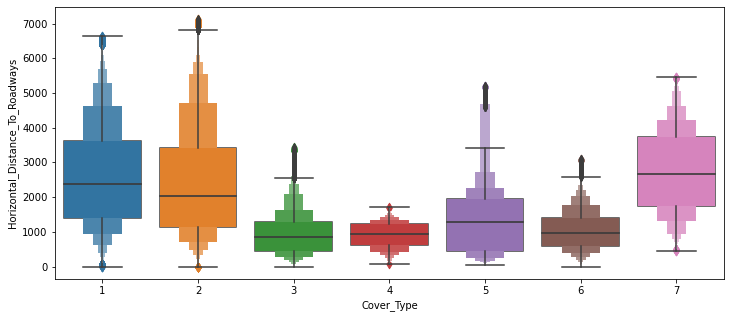

---------------------------------------------------
Hillshade_9am


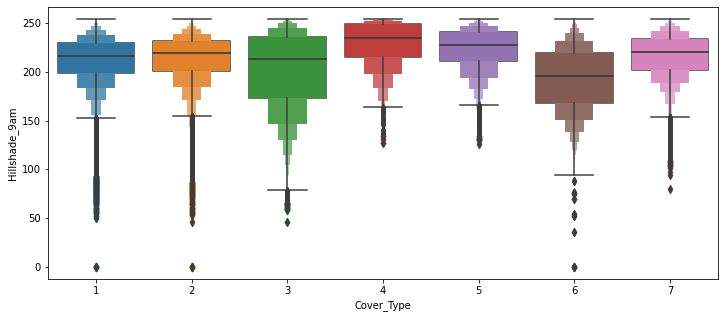

---------------------------------------------------
Hillshade_Noon


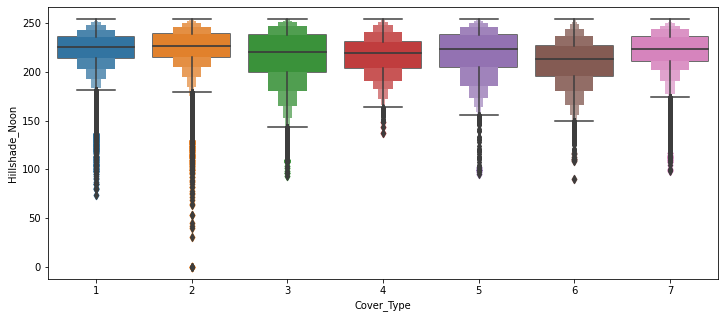

---------------------------------------------------
Hillshade_3pm


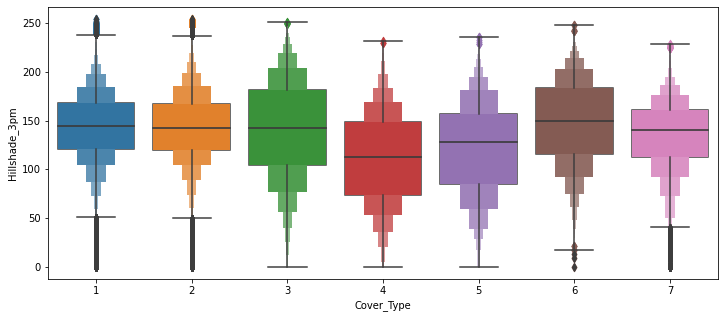

---------------------------------------------------
Horizontal_Distance_To_Fire_Points


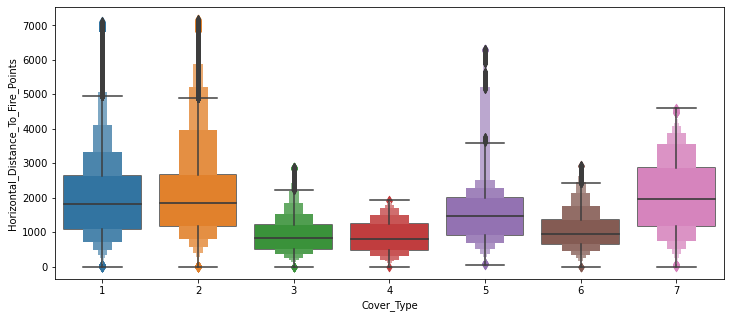

---------------------------------------------------
Wilderness_Area1


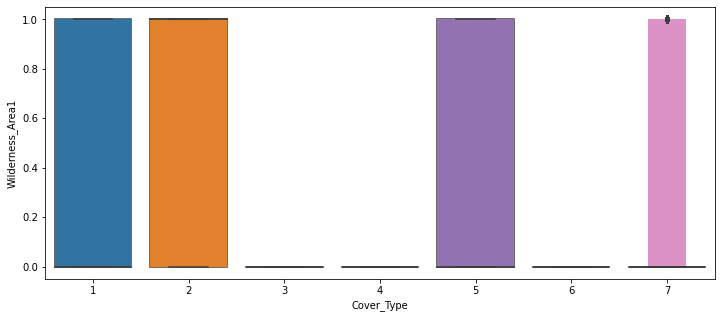

---------------------------------------------------
Wilderness_Area2


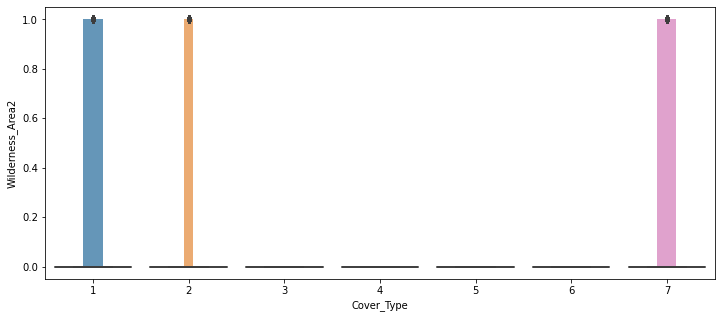

---------------------------------------------------
Wilderness_Area3


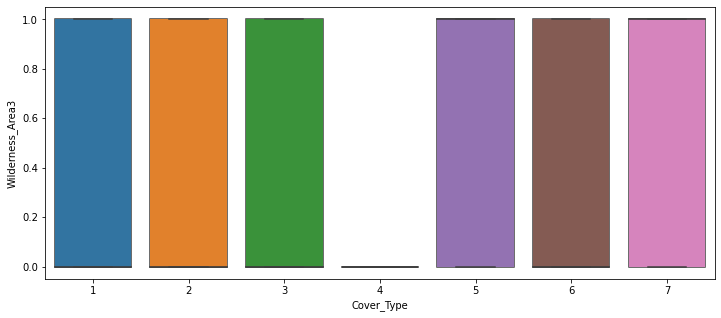

---------------------------------------------------
Wilderness_Area4


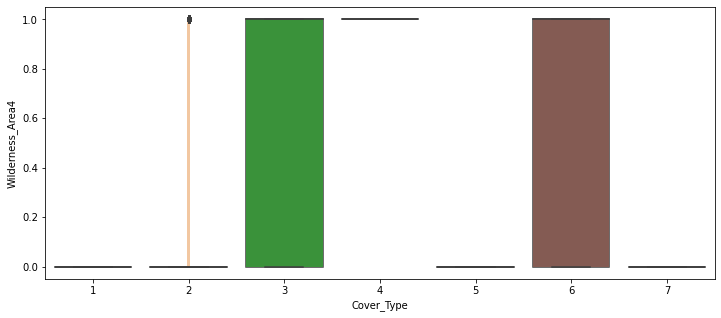

---------------------------------------------------
Soil_Type1


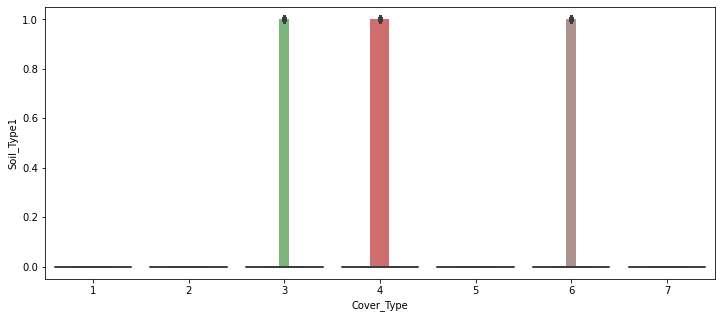

---------------------------------------------------
Soil_Type2


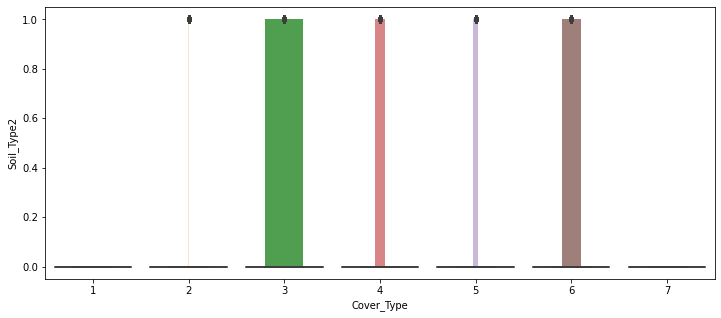

---------------------------------------------------
Soil_Type3


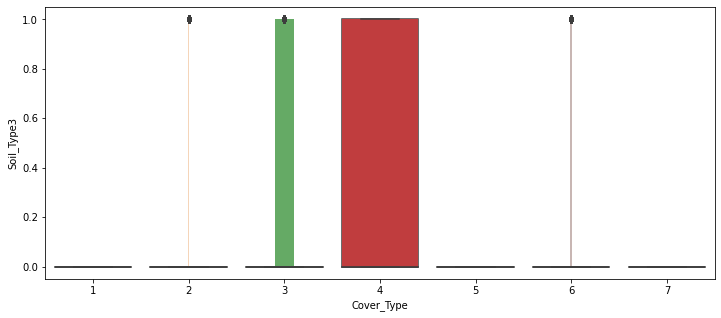

---------------------------------------------------
Soil_Type4


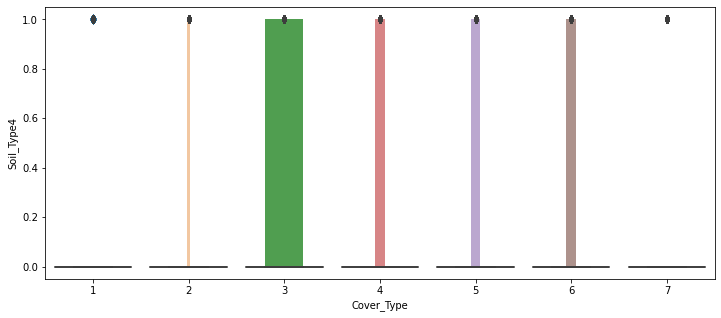

---------------------------------------------------
Soil_Type5


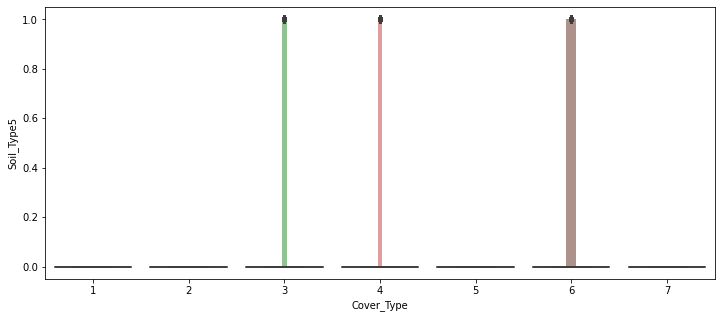

---------------------------------------------------
Soil_Type6


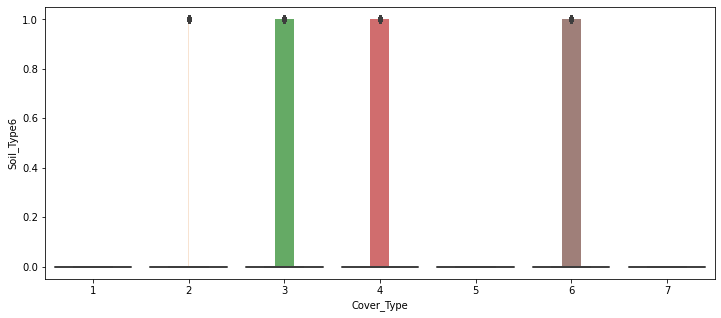

---------------------------------------------------
Soil_Type7


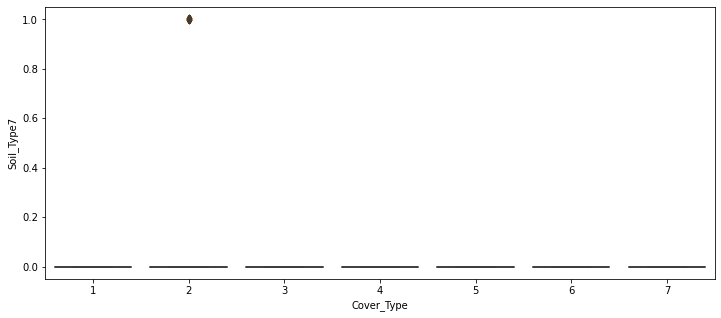

---------------------------------------------------
Soil_Type8


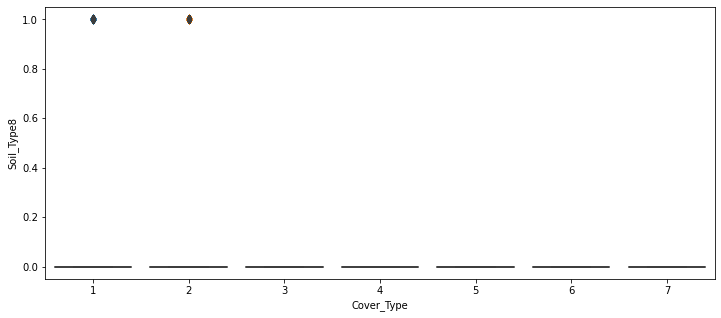

---------------------------------------------------
Soil_Type9


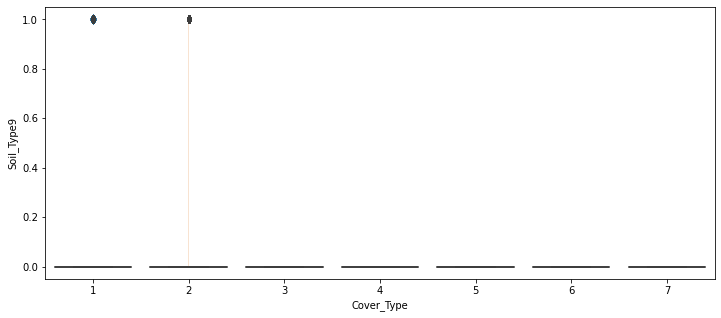

---------------------------------------------------
Soil_Type10


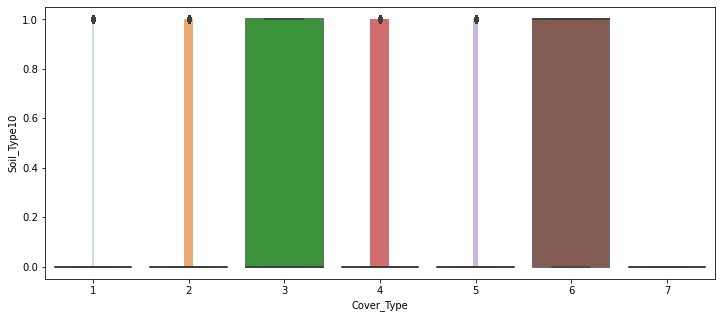

---------------------------------------------------
Soil_Type11


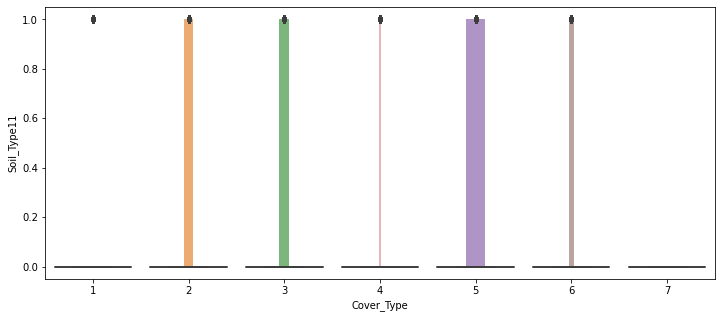

---------------------------------------------------
Soil_Type12


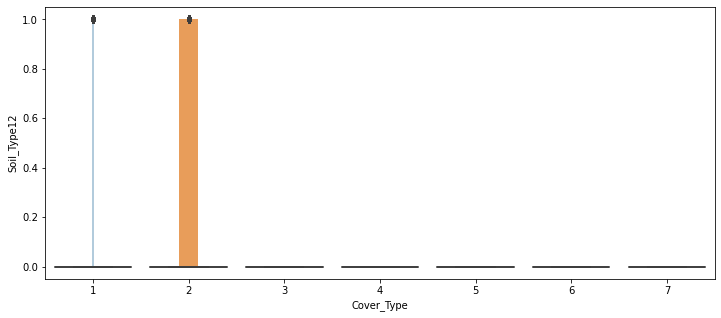

---------------------------------------------------
Soil_Type13


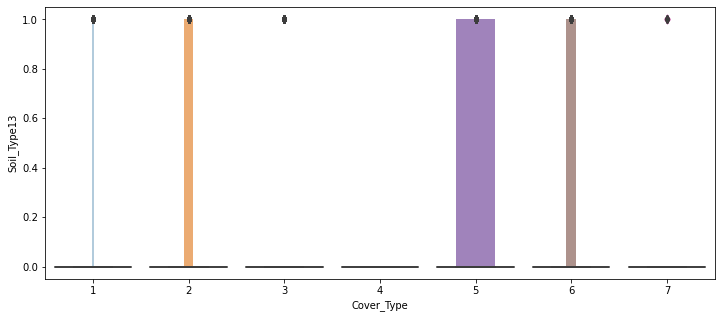

---------------------------------------------------
Soil_Type14


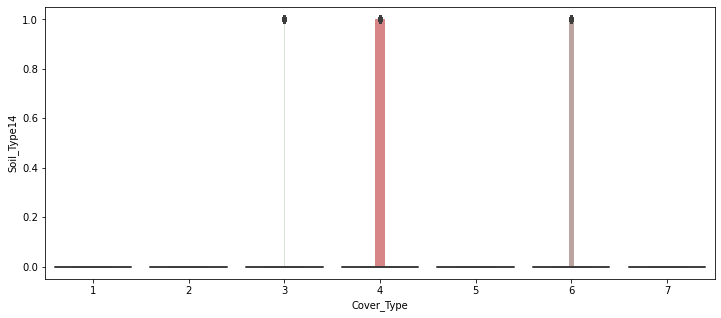

---------------------------------------------------
Soil_Type15


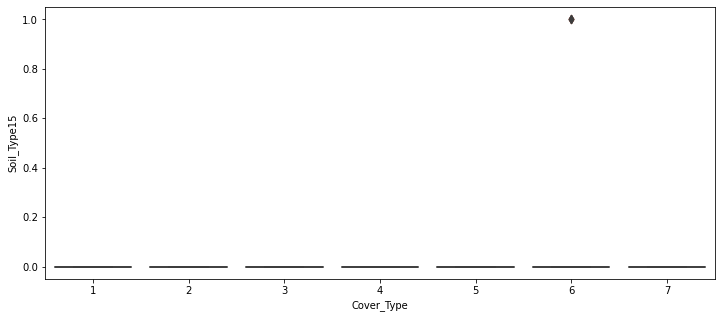

---------------------------------------------------
Soil_Type16


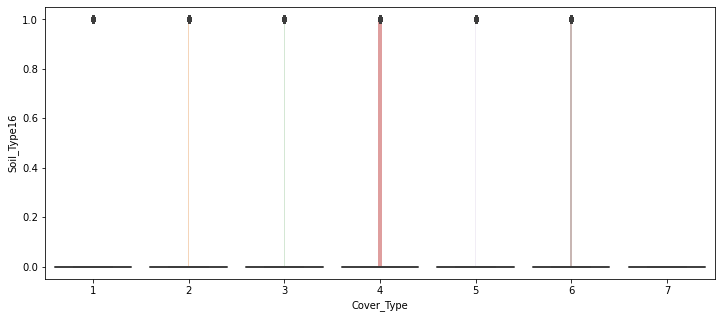

---------------------------------------------------
Soil_Type17


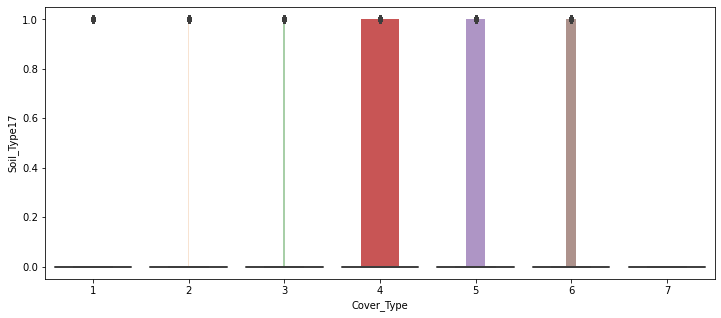

---------------------------------------------------
Soil_Type18


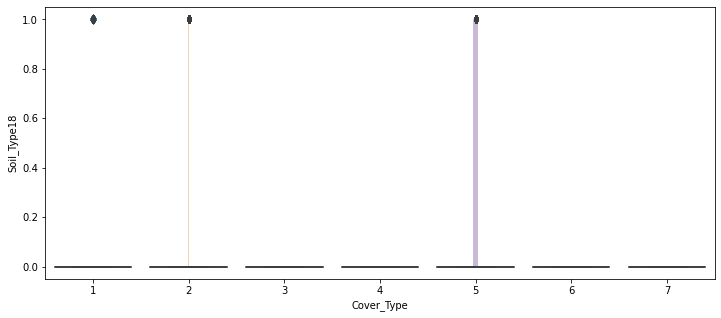

---------------------------------------------------
Soil_Type19


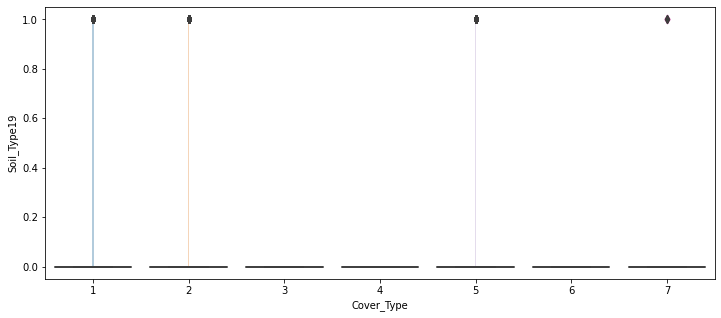

---------------------------------------------------
Soil_Type20


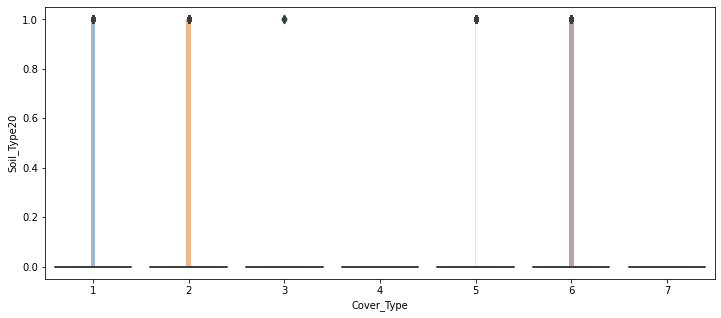

---------------------------------------------------
Soil_Type21


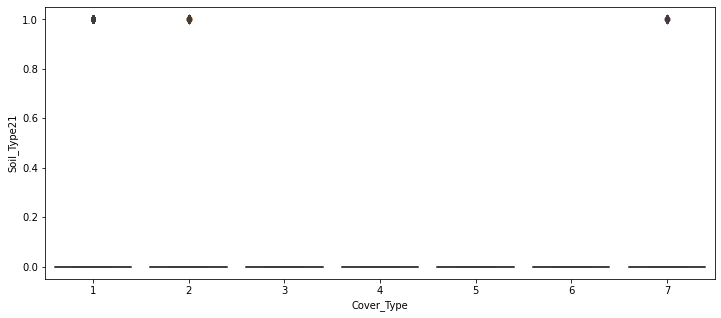

---------------------------------------------------
Soil_Type22


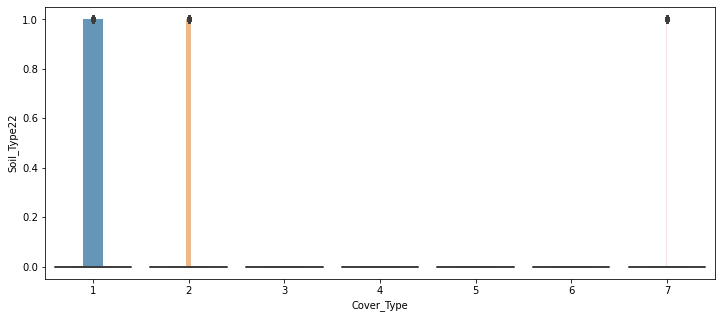

---------------------------------------------------
Soil_Type23


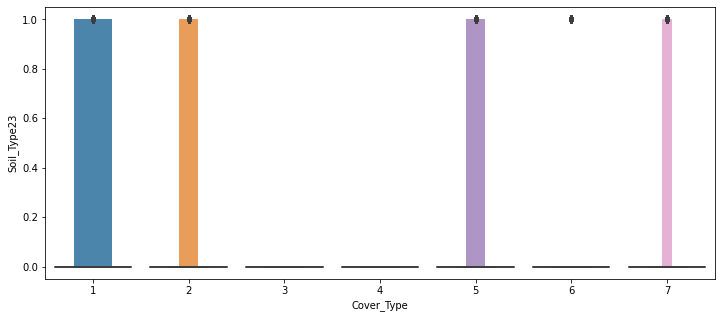

---------------------------------------------------
Soil_Type24


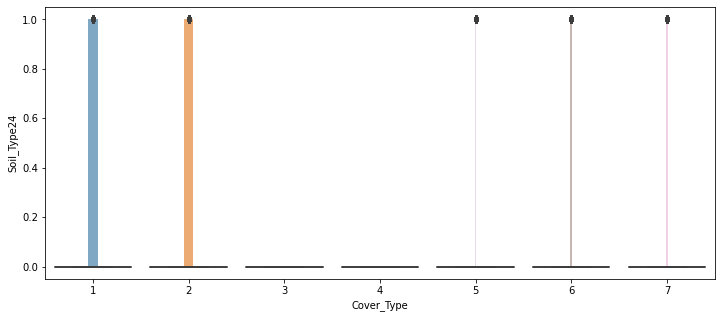

---------------------------------------------------
Soil_Type25


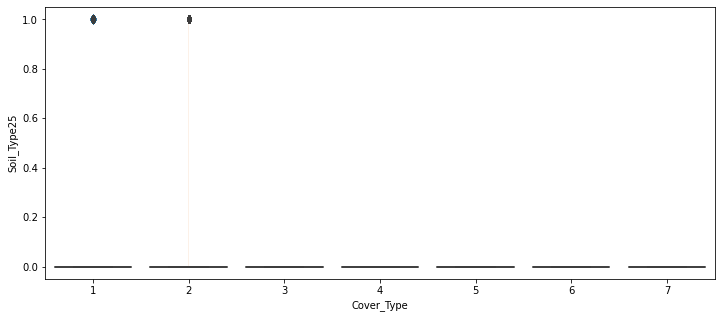

---------------------------------------------------
Soil_Type26


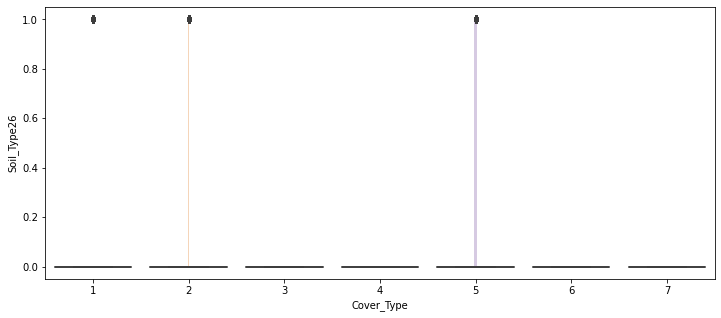

---------------------------------------------------
Soil_Type27


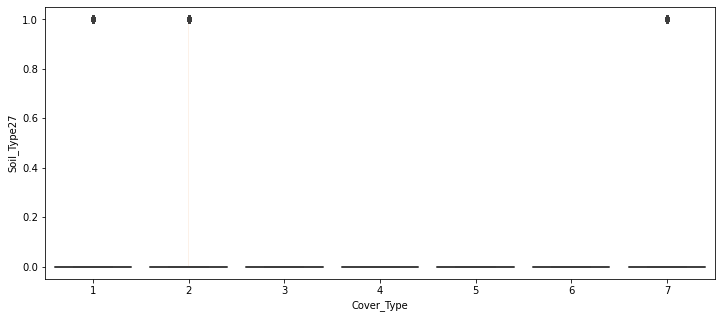

---------------------------------------------------
Soil_Type28


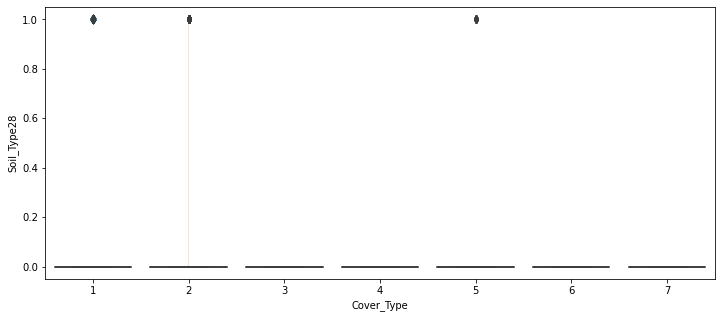

---------------------------------------------------
Soil_Type29


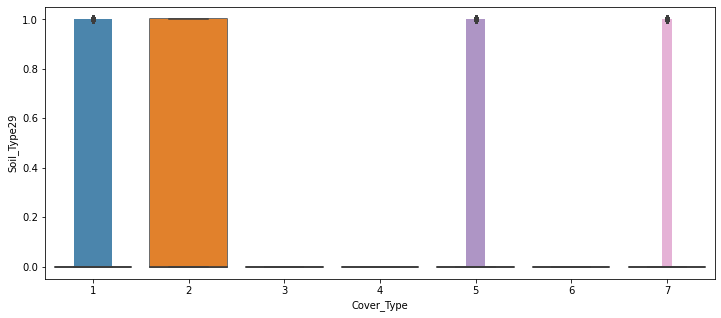

---------------------------------------------------
Soil_Type30


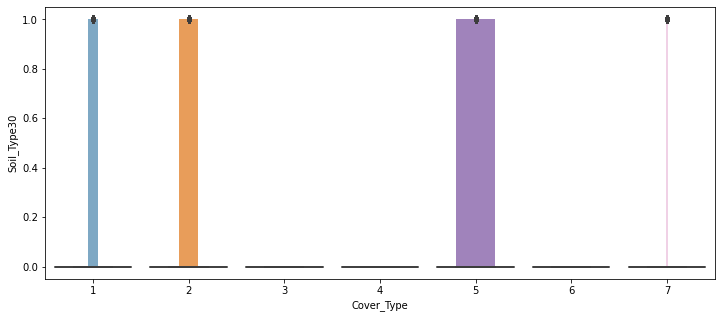

---------------------------------------------------
Soil_Type31


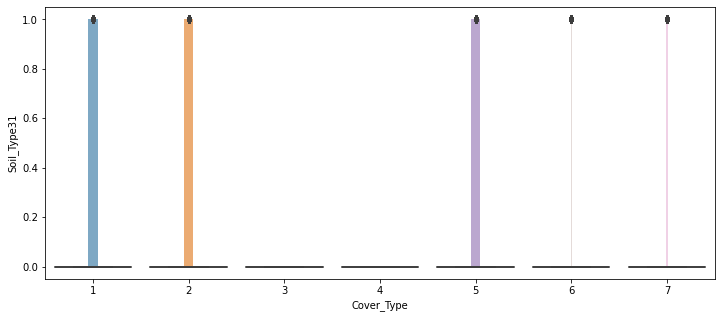

---------------------------------------------------
Soil_Type32


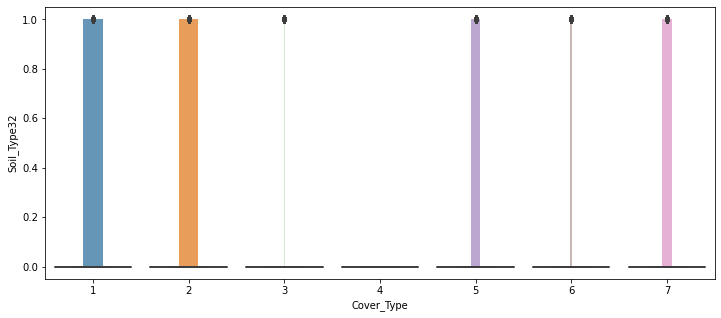

---------------------------------------------------
Soil_Type33


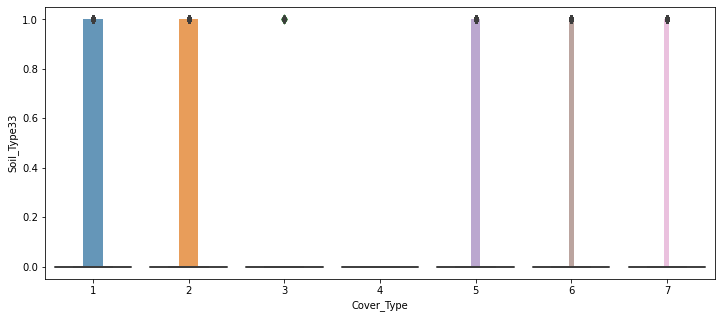

---------------------------------------------------
Soil_Type34


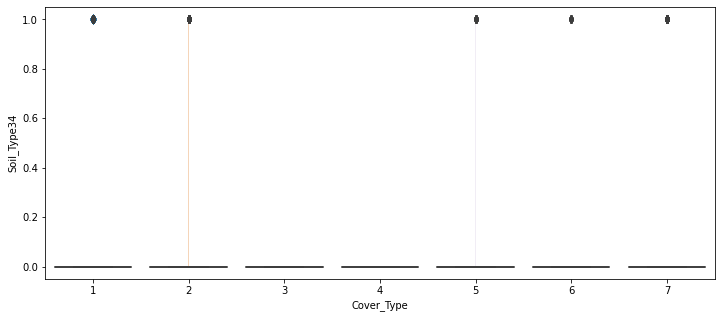

---------------------------------------------------
Soil_Type35


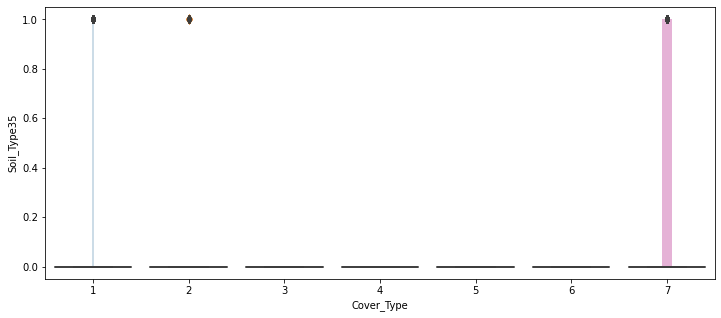

---------------------------------------------------
Soil_Type36


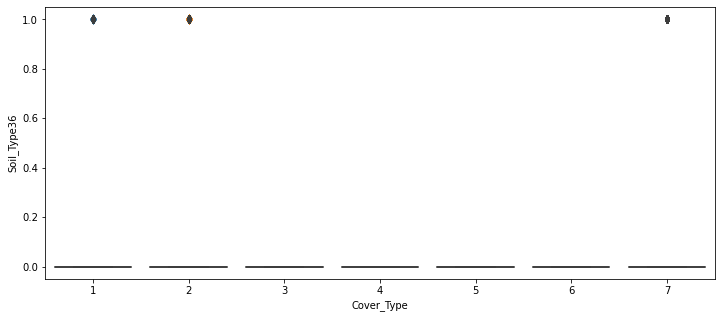

---------------------------------------------------
Soil_Type37


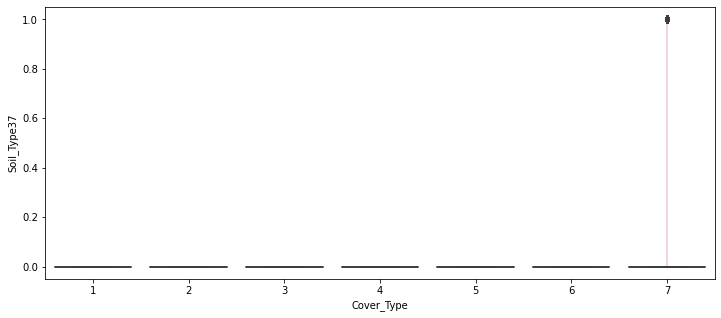

---------------------------------------------------
Soil_Type38


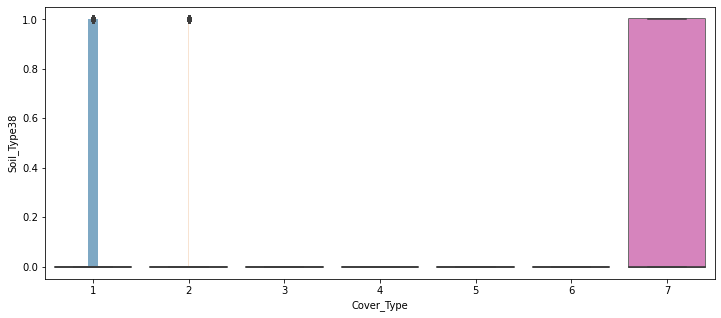

---------------------------------------------------
Soil_Type39


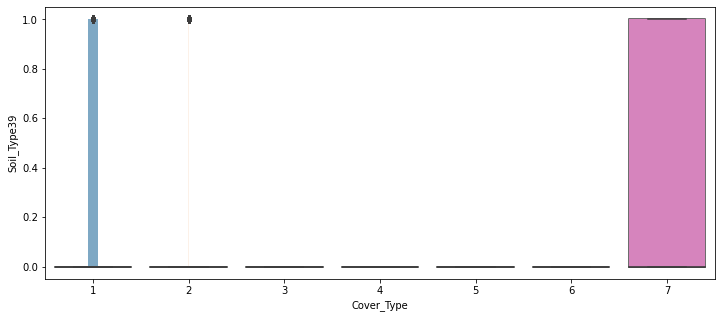

---------------------------------------------------
Soil_Type40


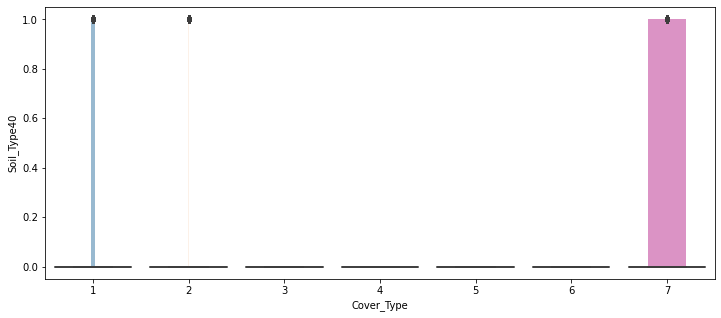

---------------------------------------------------
Cover_Type


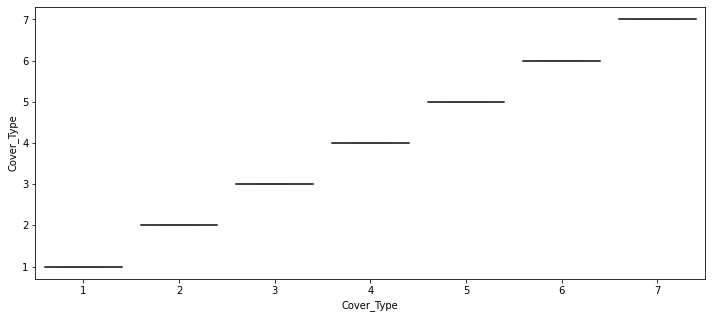

---------------------------------------------------


In [18]:
firstdf = pd.read_csv('covtype.csv')
for i in firstdf.columns:
    print(i)
    plt.figure(figsize=(12,5))
    sns.boxenplot(y=firstdf[i], x=firstdf.Cover_Type)
    sns.boxplot(y=firstdf[i], x=firstdf.Cover_Type)
    plt.show()
    print("---------------------------------------------------")

Elevation


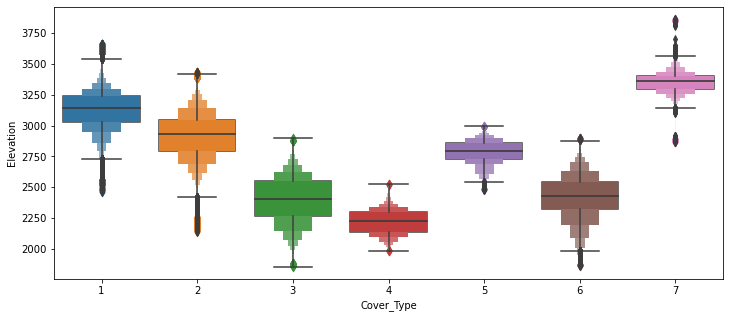

---------------------------------------------------
Aspect


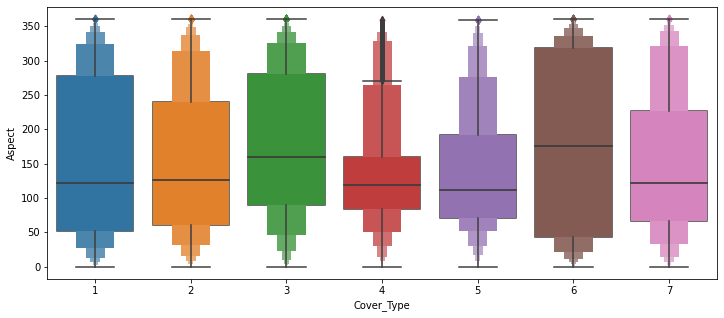

---------------------------------------------------
Slope


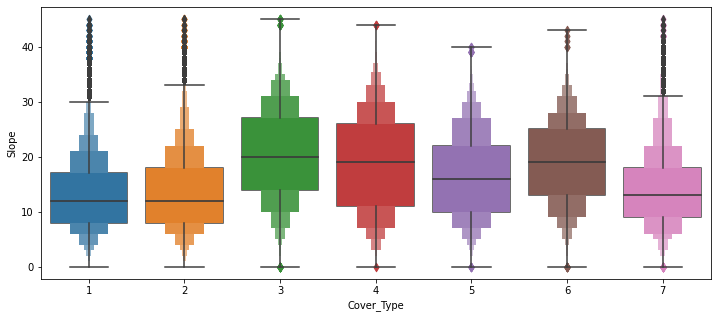

---------------------------------------------------
Horizontal_Distance_To_Hydrology


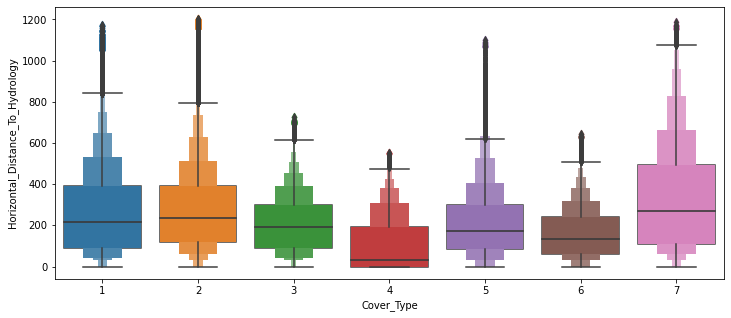

---------------------------------------------------
Vertical_Distance_To_Hydrology


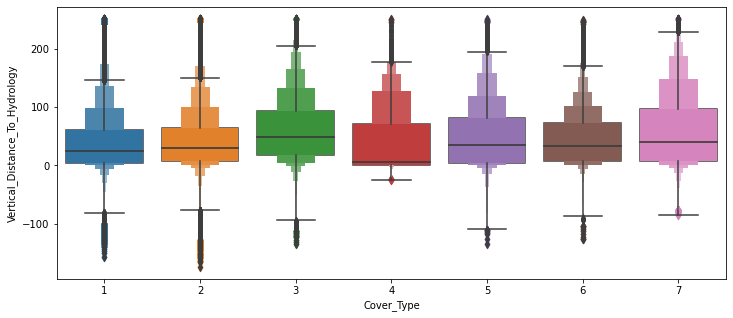

---------------------------------------------------
Horizontal_Distance_To_Roadways


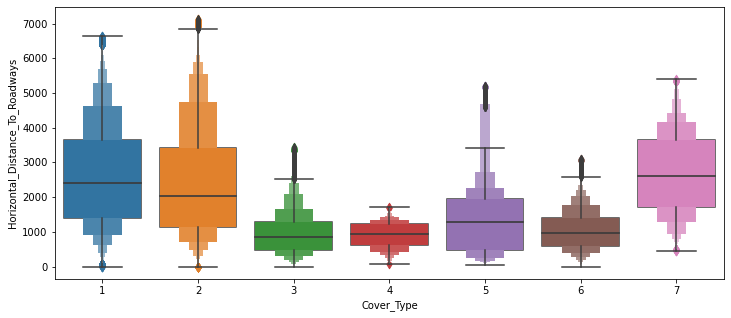

---------------------------------------------------
Hillshade_9am


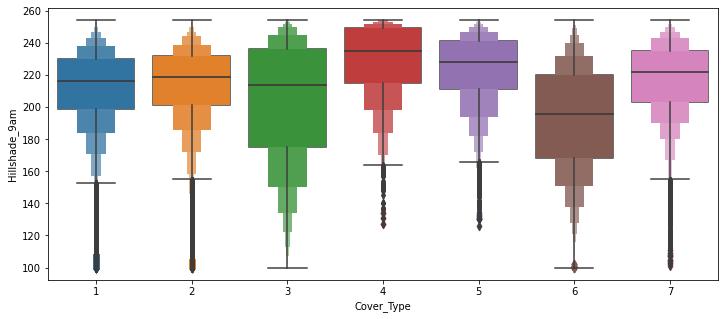

---------------------------------------------------
Hillshade_Noon


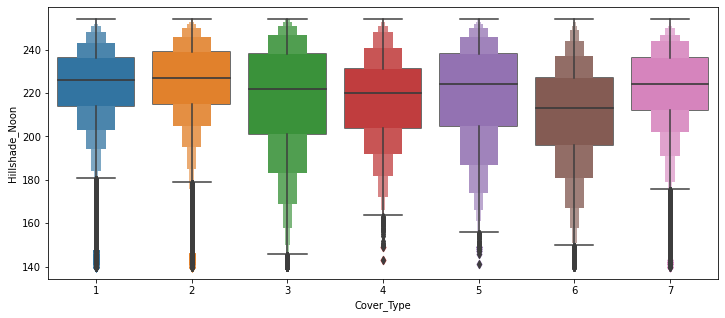

---------------------------------------------------
Hillshade_3pm


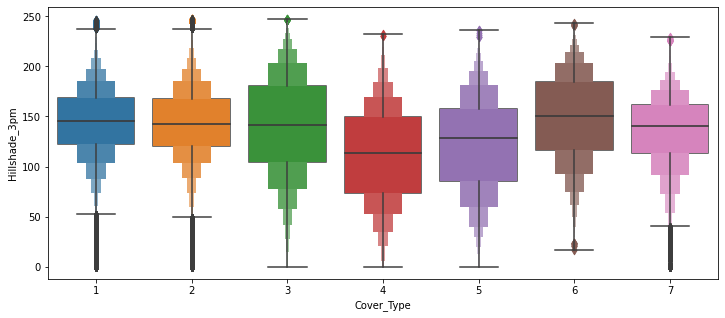

---------------------------------------------------
Horizontal_Distance_To_Fire_Points


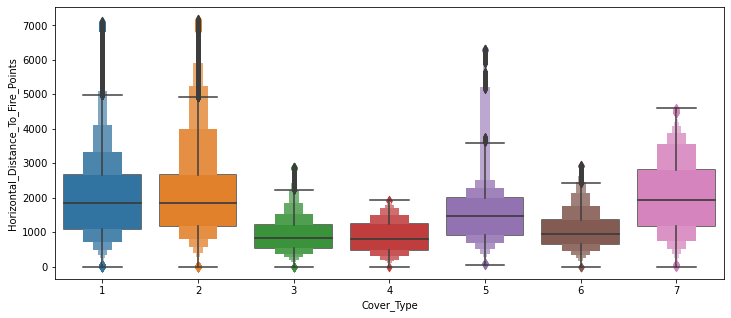

---------------------------------------------------
Wilderness_Area1


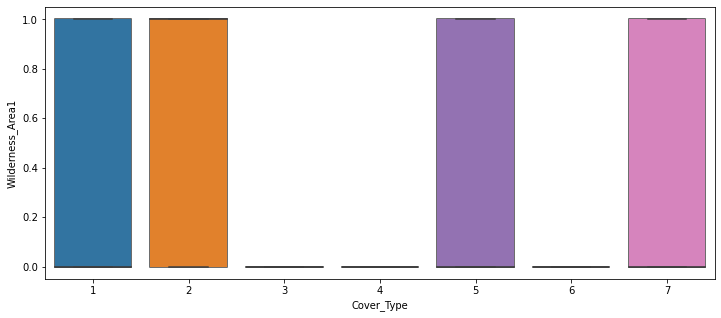

---------------------------------------------------
Wilderness_Area2


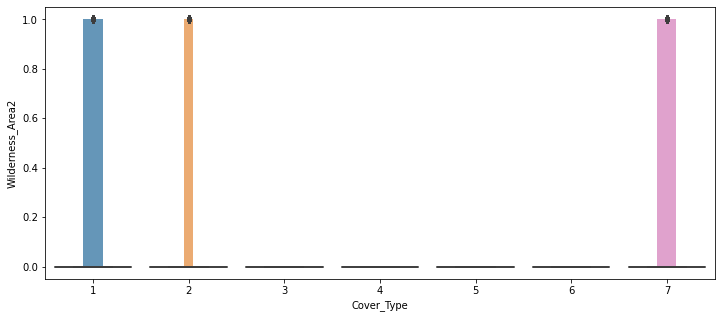

---------------------------------------------------
Wilderness_Area3


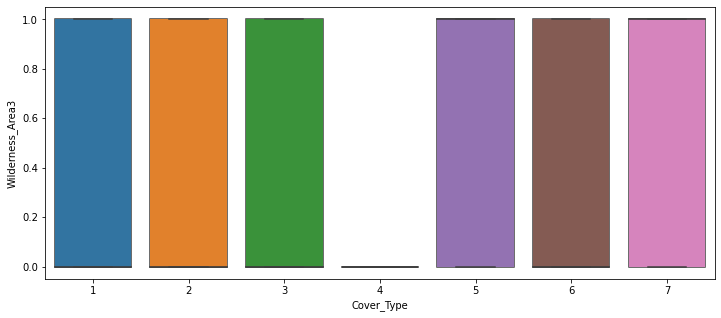

---------------------------------------------------
Wilderness_Area4


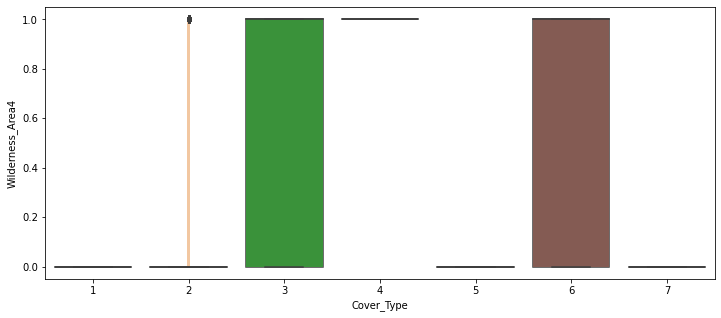

---------------------------------------------------
Soil_Type1


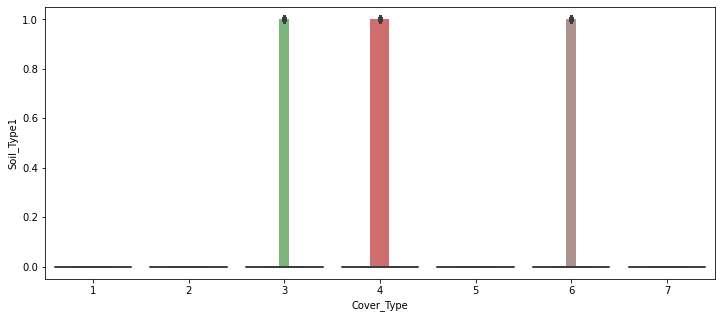

---------------------------------------------------
Soil_Type2


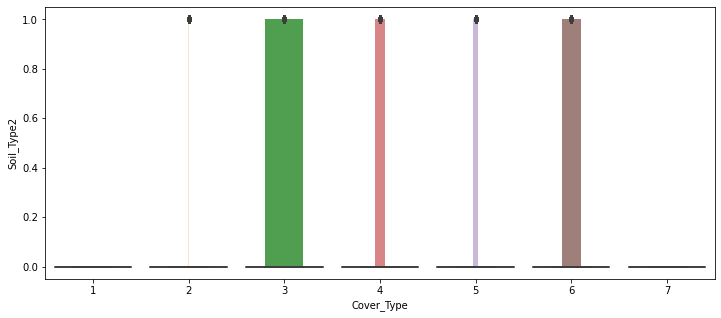

---------------------------------------------------
Soil_Type3


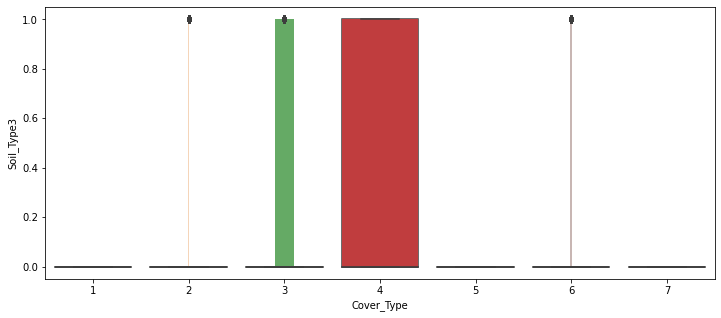

---------------------------------------------------
Soil_Type4


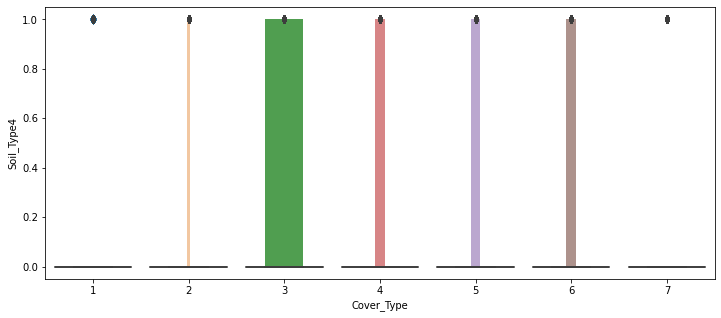

---------------------------------------------------
Soil_Type5


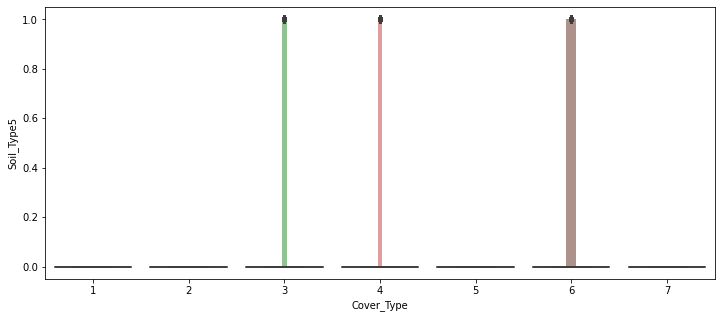

---------------------------------------------------
Soil_Type6


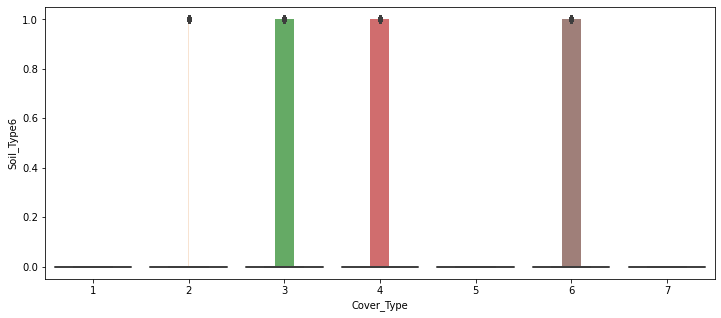

---------------------------------------------------
Soil_Type10


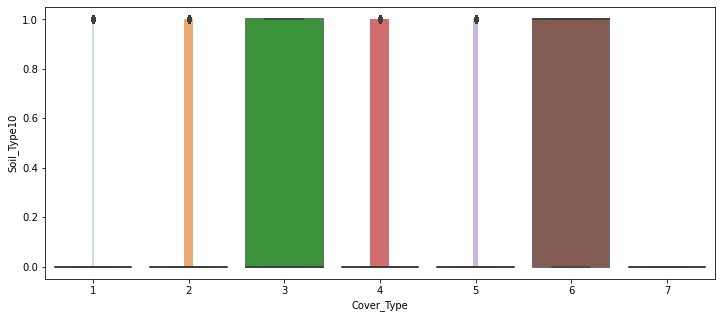

---------------------------------------------------
Soil_Type11


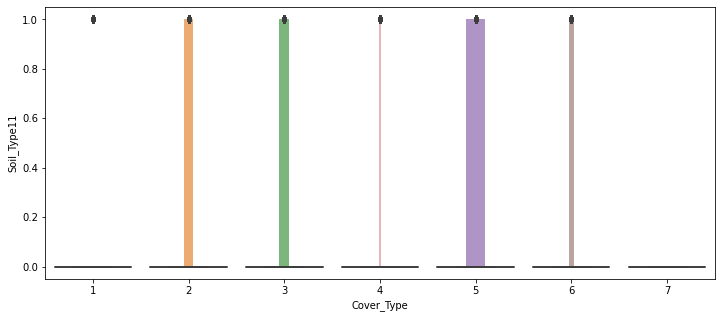

---------------------------------------------------
Soil_Type12


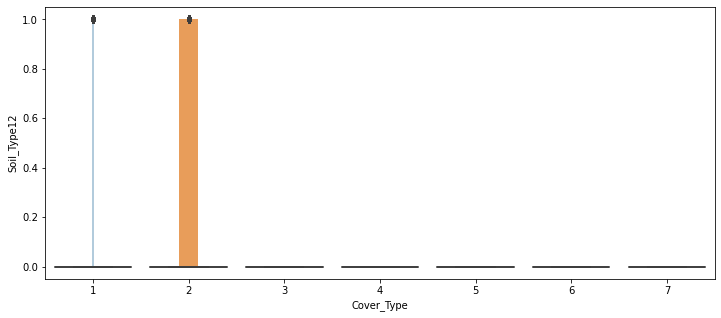

---------------------------------------------------
Soil_Type19


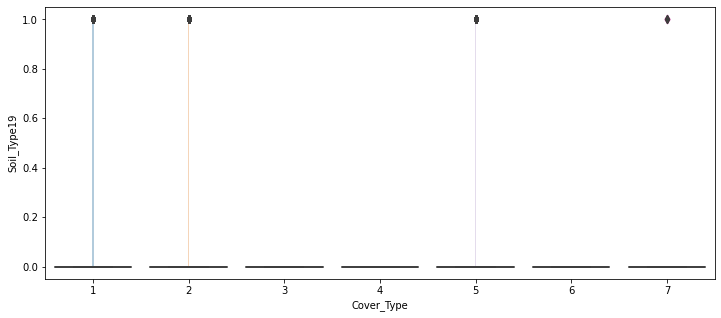

---------------------------------------------------
Soil_Type20


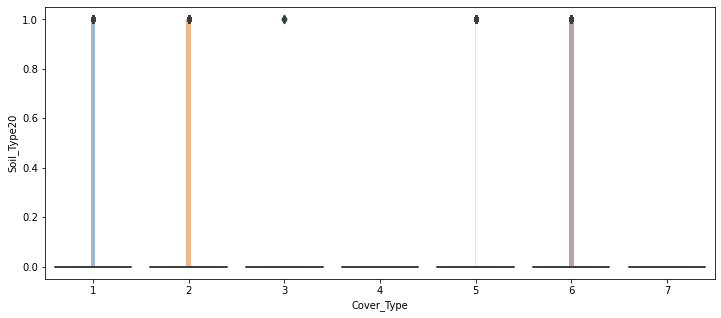

---------------------------------------------------
Soil_Type22


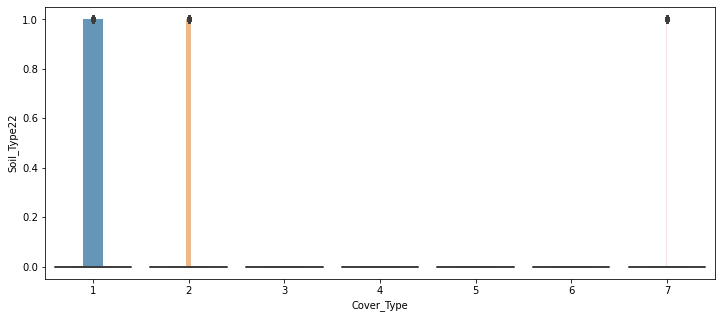

---------------------------------------------------
Soil_Type23


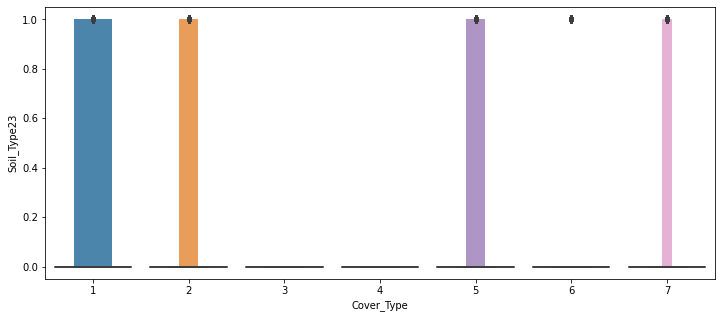

---------------------------------------------------
Soil_Type24


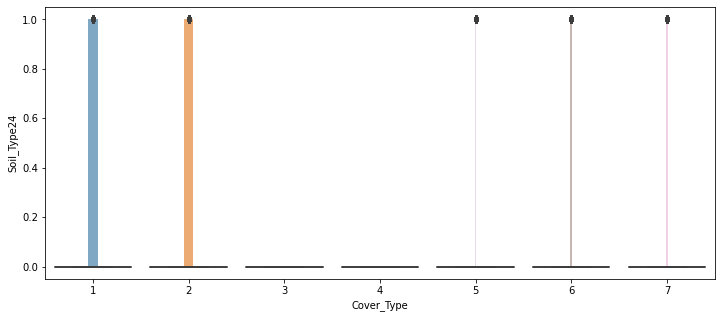

---------------------------------------------------
Soil_Type29


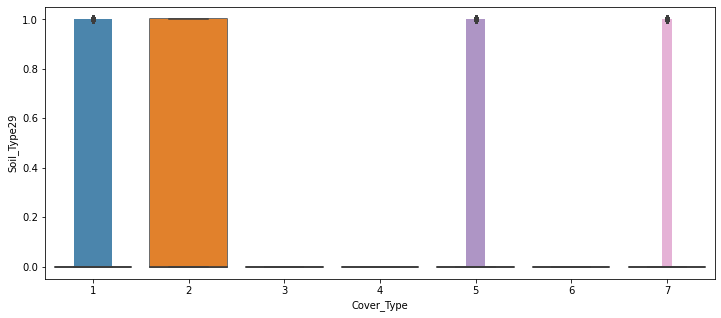

---------------------------------------------------
Soil_Type35


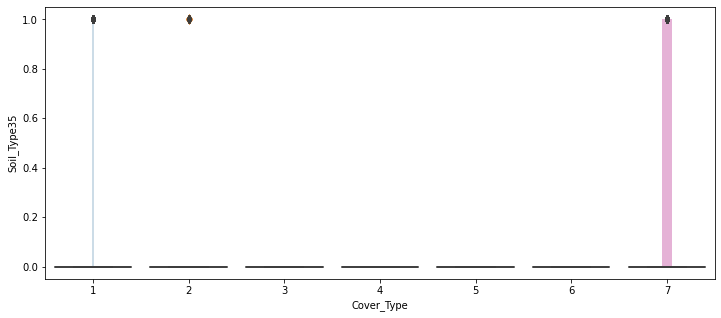

---------------------------------------------------
Soil_Type38


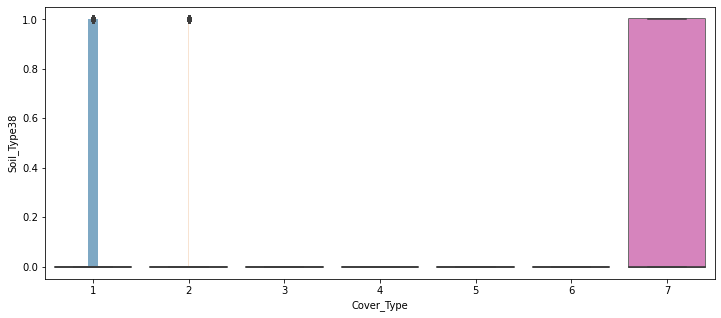

---------------------------------------------------
Soil_Type39


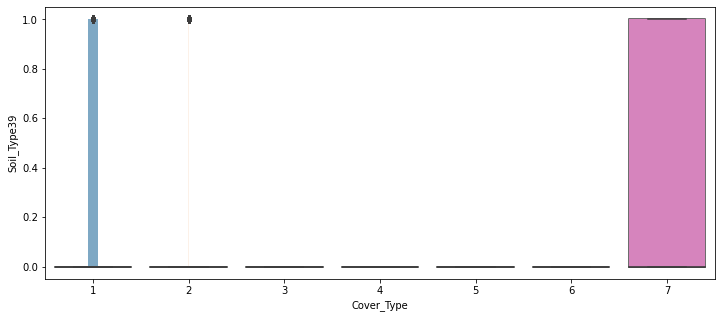

---------------------------------------------------
Soil_Type40


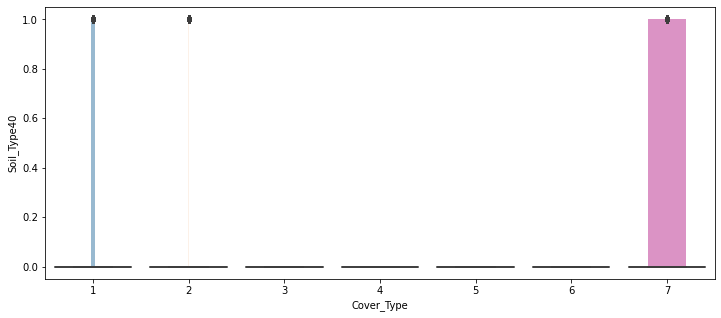

---------------------------------------------------
Cover_Type


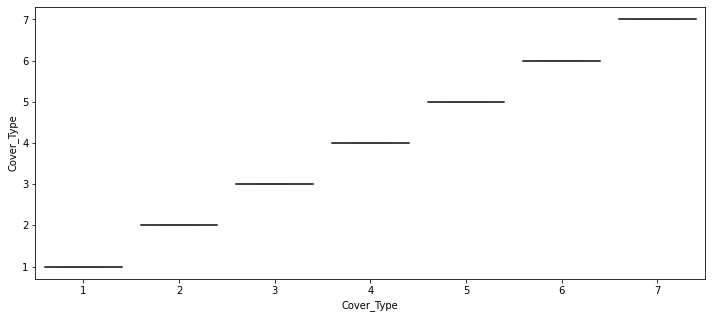

---------------------------------------------------


In [21]:
final_df = pd.read_csv('tree_updated')
for i in final_df.columns:
    print(i)
    plt.figure(figsize=(12,5))
    sns.boxenplot(y=final_df[i], x=final_df.Cover_Type)
    sns.boxplot(y=final_df[i], x=final_df.Cover_Type)
    plt.show()
    print("---------------------------------------------------")

In [23]:
print(final_df.info())
final_touch = final_df[final_df["Elevation"]<3500]
final_touch = final_touch[final_touch["Elevation"]>2000]
final_touch = final_touch[final_touch["Slope"]<35]
final_touch = final_touch[final_touch["Horizontal_Distance_To_Hydrology"]<800]
final_touch = final_touch[final_touch["Vertical_Distance_To_Hydrology"]<200]
final_touch = final_touch[final_touch["Vertical_Distance_To_Hydrology"]>-10]
final_touch = final_touch[final_touch["Horizontal_Distance_To_Roadways"]<6500]
final_touch = final_touch[final_touch["Hillshade_9am"]>140]
final_touch = final_touch[final_touch["Hillshade_Noon"]>170]
final_touch = final_touch[final_touch["Hillshade_3pm"]<220]
final_touch = final_touch[final_touch["Hillshade_3pm"]>25]
final_touch = final_touch[final_touch["Horizontal_Distance_To_Fire_Points"]<5000]
final_touch = final_touch[final_touch["Hillshade_Noon"]>170]
final_touch = final_touch[final_touch["Hillshade_Noon"]>170]
final_touch = final_touch[final_touch["Hillshade_Noon"]>170]
print(final_touch.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572873 entries, 0 to 581011
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           572873 non-null  int64
 1   Aspect                              572873 non-null  int64
 2   Slope                               572873 non-null  int64
 3   Horizontal_Distance_To_Hydrology    572873 non-null  int64
 4   Vertical_Distance_To_Hydrology      572873 non-null  int64
 5   Horizontal_Distance_To_Roadways     572873 non-null  int64
 6   Hillshade_9am                       572873 non-null  int64
 7   Hillshade_Noon                      572873 non-null  int64
 8   Hillshade_3pm                       572873 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  572873 non-null  int64
 10  Wilderness_Area1                    572873 non-null  int64
 11  Wilderness_Area2                    572873 non-null 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [35]:
X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20
                                                    , random_state=101,stratify = y)

rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[34045  1948     0     0    16     3    53]
 [ 1110 44688    81     1    52    74    13]
 [    1   102  5044    25     4   113     0]
 [    0     0    43   446     0    10     0]
 [   25   397    20     0  1144     4     0]
 [    2    89   185    13     3  2472     0]
 [  169    15     0     0     0     0  2912]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     36065
           2       0.95      0.97      0.96     46019
           3       0.94      0.95      0.95      5289
           4       0.92      0.89      0.91       499
           5       0.94      0.72      0.81      1590
           6       0.92      0.89      0.91      2764
           7       0.98      0.94      0.96      3096

    accuracy                           0.95     95322
   macro avg       0.94      0.90      0.92     95322
weighted avg       0.95      0.95      0.95     95322



In [36]:
X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30
                                                    , random_state=101,stratify = y)

rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[50827  3135     1     0    17    11   106]
 [ 1809 66855   155     2    71   117    19]
 [    1   192  7486    47     6   202     0]
 [    0     0    87   641     0    21     0]
 [   29   655    31     0  1659    11     0]
 [    3   144   294    35     4  3666     0]
 [  274    33     0     0     0     0  4337]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     54097
           2       0.94      0.97      0.95     69028
           3       0.93      0.94      0.94      7934
           4       0.88      0.86      0.87       749
           5       0.94      0.70      0.80      2385
           6       0.91      0.88      0.90      4146
           7       0.97      0.93      0.95      4644

    accuracy                           0.95    142983
   macro avg       0.93      0.89      0.91    142983
weighted avg       0.95      0.95      0.95    142983



In [37]:
X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10
                                                    , random_state=101,stratify = y)

rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[17064   924     0     0    10     2    32]
 [  525 22377    42     0    26    35     4]
 [    0    48  2526    16     1    54     0]
 [    0     0    28   215     0     7     0]
 [   12   181    12     0   588     2     0]
 [    1    41    91     6     0  1243     0]
 [   75     5     0     0     0     0  1468]]
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     18032
           2       0.95      0.97      0.96     23009
           3       0.94      0.96      0.95      2645
           4       0.91      0.86      0.88       250
           5       0.94      0.74      0.83       795
           6       0.93      0.90      0.91      1382
           7       0.98      0.95      0.96      1548

    accuracy                           0.95     47661
   macro avg       0.94      0.90      0.92     47661
weighted avg       0.95      0.95      0.95     47661



In [38]:
#**RF Tunning**
rf=RandomForestClassifier()
rf_params = {"n_estimators":[50, 300],
              "max_depth":[3,7],
              "max_features": [2, 8],
              "min_samples_split": [2, 6]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print(rf_cv_model.best_params_)

# rf_tuned = RandomForestClassifier(max_depth = 9,             
#                                   max_features = 3, 
#                                   min_samples_split = 4, 
#                                   n_estimators = 1000).fit(X_train, y_train)
rf_tuned = RandomForestClassifier(max_depth = rf_cv_model.best_params_['max_depth'],             
                                  max_features = rf_cv_model.best_params_['max_features'], 
                                  min_samples_split = rf_cv_model.best_params_['min_samples_split'], 
                                  n_estimators = rf_cv_model.best_params_['n_estimators']).fit(X_train, y_train)


y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 38.8min finished


[[13846  4152     1     0     0     0    33]
 [ 5104 17735   150     0     0    20     0]
 [    0   468  2123    26     0    28     0]
 [    0     0   141   109     0     0     0]
 [    0   782    13     0     0     0     0]
 [    0   579   598    10     0   195     0]
 [ 1139     0     0     0     0     0   409]]
              precision    recall  f1-score   support

           1       0.69      0.77      0.73     18032
           2       0.75      0.77      0.76     23009
           3       0.70      0.80      0.75      2645
           4       0.75      0.44      0.55       250
           5       0.00      0.00      0.00       795
           6       0.80      0.14      0.24      1382
           7       0.93      0.26      0.41      1548

    accuracy                           0.72     47661
   macro avg       0.66      0.45      0.49     47661
weighted avg       0.72      0.72      0.71     47661



In [40]:
print(rf_cv_model.best_params_)


{'max_depth': 7, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 300}


In [39]:
X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25
                                                    , random_state=101,stratify = y)

rf_model=RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[42517  2460     2     0    14     2    86]
 [ 1405 55837   110     2    63    91    15]
 [    2   140  6294    36     3   137     0]
 [    0     0    56   552     0    16     0]
 [   26   529    27     0  1400     5     0]
 [    4   118   223    25     4  3081     0]
 [  203    24     0     0     0     0  3643]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     45081
           2       0.94      0.97      0.96     57523
           3       0.94      0.95      0.94      6612
           4       0.90      0.88      0.89       624
           5       0.94      0.70      0.81      1987
           6       0.92      0.89      0.91      3455
           7       0.97      0.94      0.96      3870

    accuracy                           0.95    119152
   macro avg       0.94      0.90      0.92    119152
weighted avg       0.95      0.95      0.95    119152



In [41]:
X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25
                                                    , random_state=101,stratify = y)

rf_model=RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[42557  2423     2     0    14     3    82]
 [ 1367 55871   109     2    67    91    16]
 [    2   143  6294    37     2   134     0]
 [    0     0    54   555     0    15     0]
 [   25   528    29     0  1400     5     0]
 [    3   112   219    23     4  3094     0]
 [  201    26     0     0     0     0  3643]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     45081
           2       0.95      0.97      0.96     57523
           3       0.94      0.95      0.95      6612
           4       0.90      0.89      0.89       624
           5       0.94      0.70      0.81      1987
           6       0.93      0.90      0.91      3455
           7       0.97      0.94      0.96      3870

    accuracy                           0.95    119152
   macro avg       0.94      0.90      0.92    119152
weighted avg       0.95      0.95      0.95    119152



In [42]:
from xgboost import XGBClassifier

X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25
                                                    , random_state=101,stratify = y)

xgb_model=XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

[[38153  6756     1     0    27    10   134]
 [ 5506 51477   225     0   124   173    18]
 [    0   292  6001    45     1   273     0]
 [    0     0    49   551     0    24     0]
 [   28   873    47     0  1031     8     0]
 [    5   216   328    20     1  2885     0]
 [  321    21     0     0     0     0  3528]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86     45081
           2       0.86      0.89      0.88     57523
           3       0.90      0.91      0.90      6612
           4       0.89      0.88      0.89       624
           5       0.87      0.52      0.65      1987
           6       0.86      0.84      0.85      3455
           7       0.96      0.91      0.93      3870

    accuracy                           0.87    119152
   macro avg       0.89      0.83      0.85    119152
weighted avg       0.87      0.87      0.87    119152



In [44]:
from xgboost import XGBClassifier

X = final_touch.drop(['Cover_Type'],axis = 1)
y = final_touch['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25
                                                    , random_state=101,stratify = y)

xgb_model=XGBClassifier(n_estimators= 1000).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))                                           

KeyboardInterrupt: 

Elevation


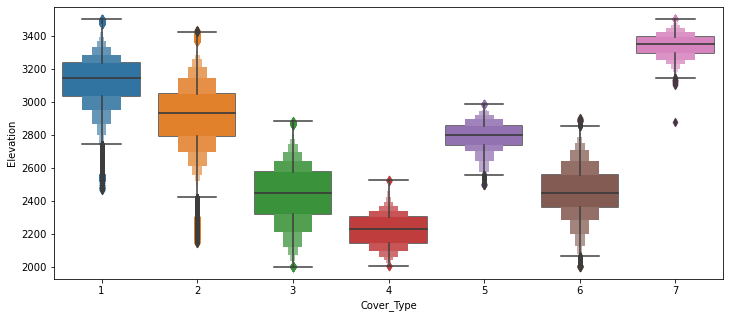

---------------------------------------------------
Aspect


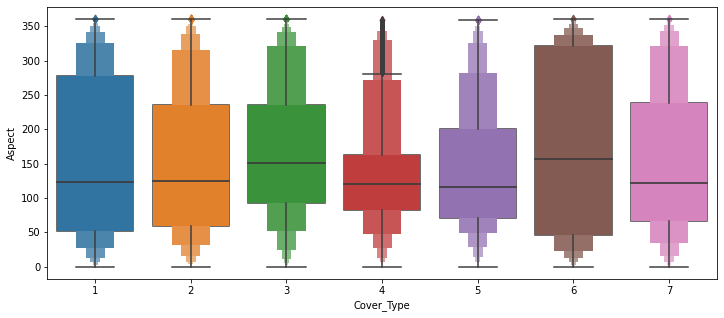

---------------------------------------------------
Slope


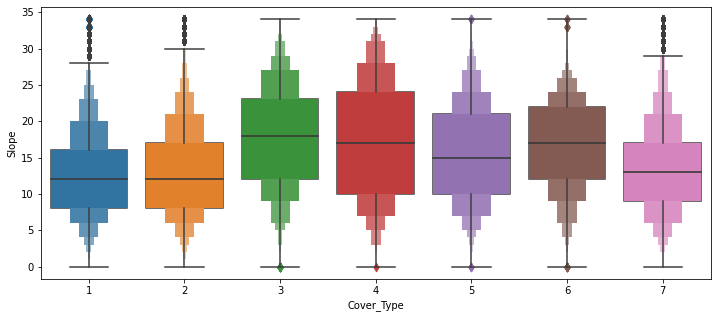

---------------------------------------------------
Horizontal_Distance_To_Hydrology


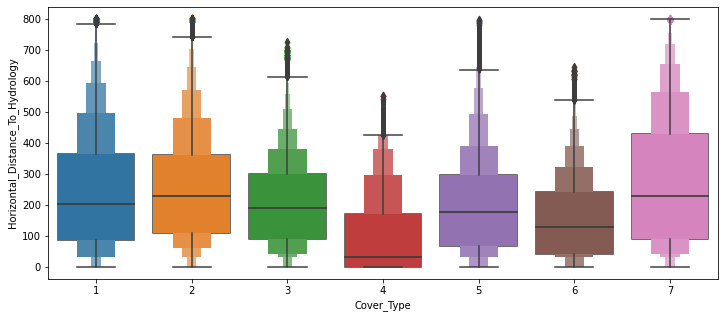

---------------------------------------------------
Vertical_Distance_To_Hydrology


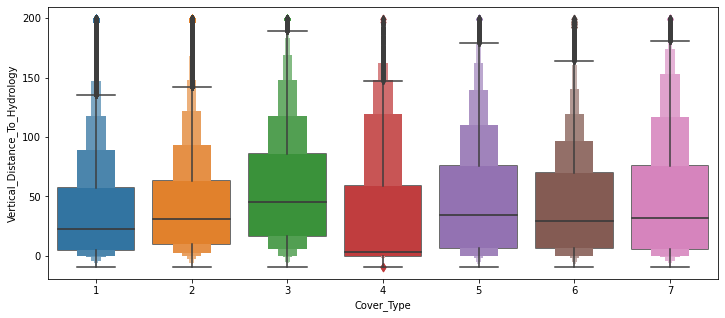

---------------------------------------------------
Horizontal_Distance_To_Roadways


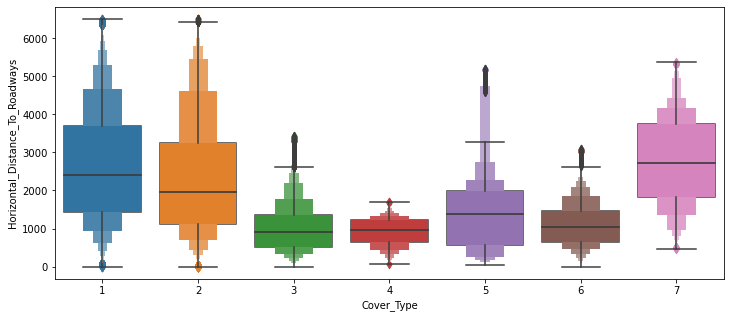

---------------------------------------------------
Hillshade_9am


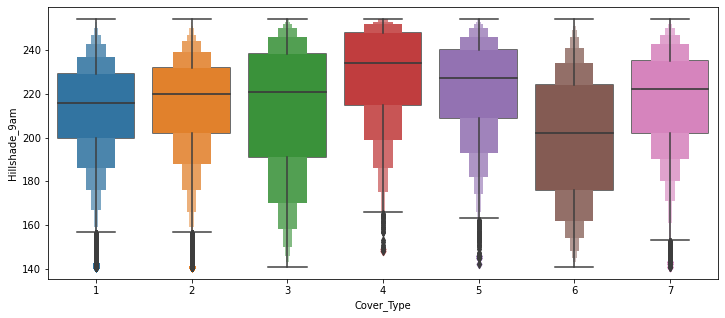

---------------------------------------------------
Hillshade_Noon


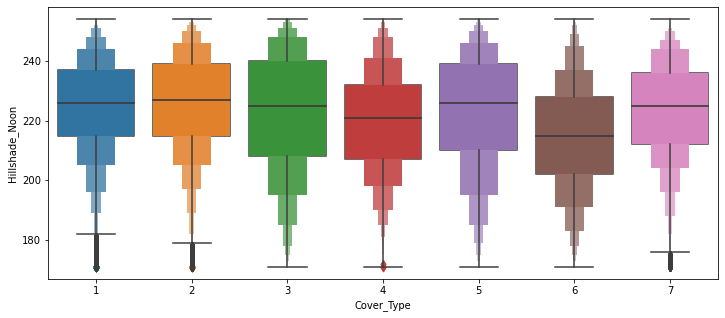

---------------------------------------------------
Hillshade_3pm


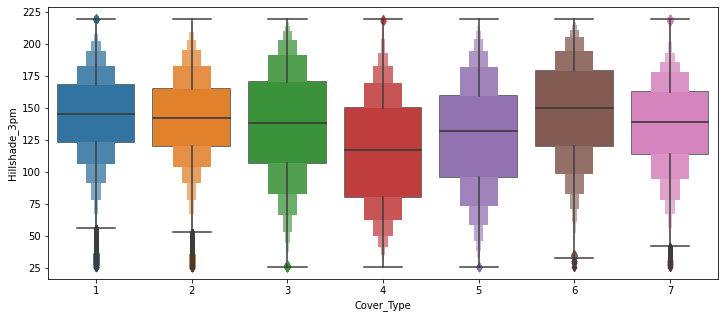

---------------------------------------------------
Horizontal_Distance_To_Fire_Points


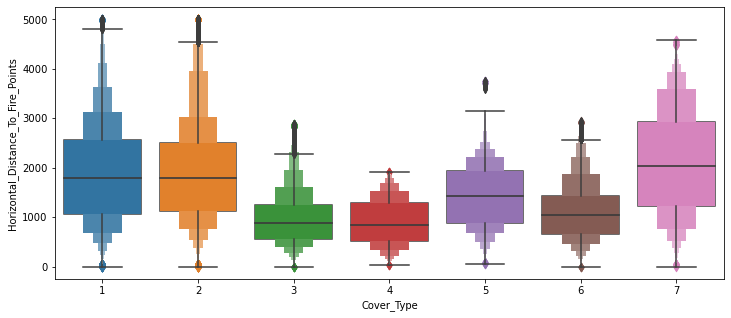

---------------------------------------------------
Wilderness_Area1


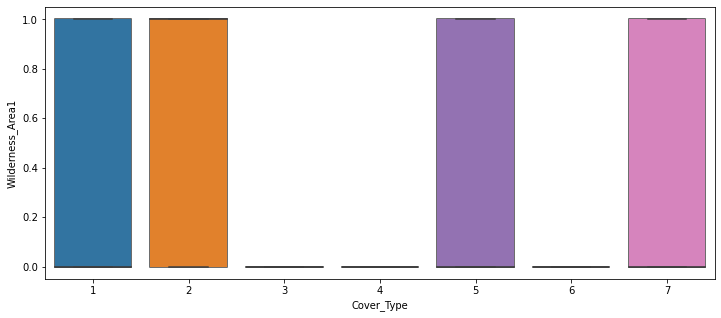

---------------------------------------------------
Wilderness_Area2


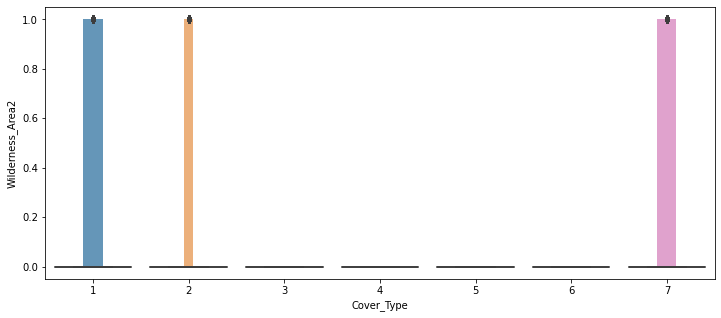

---------------------------------------------------
Wilderness_Area3


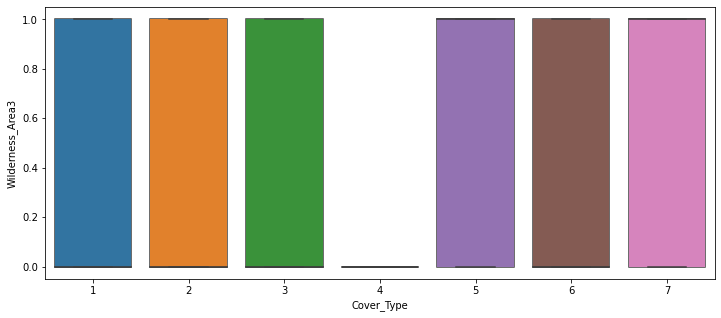

---------------------------------------------------
Wilderness_Area4


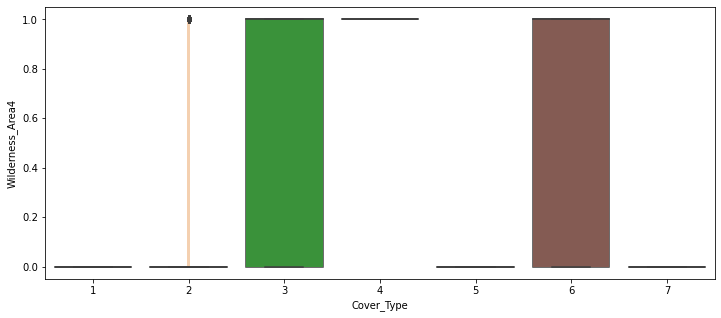

---------------------------------------------------
Soil_Type1


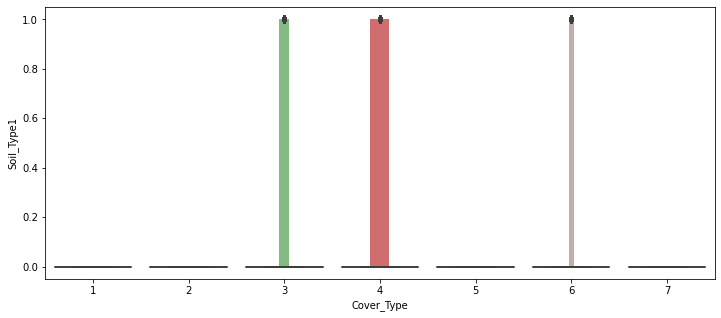

---------------------------------------------------
Soil_Type2


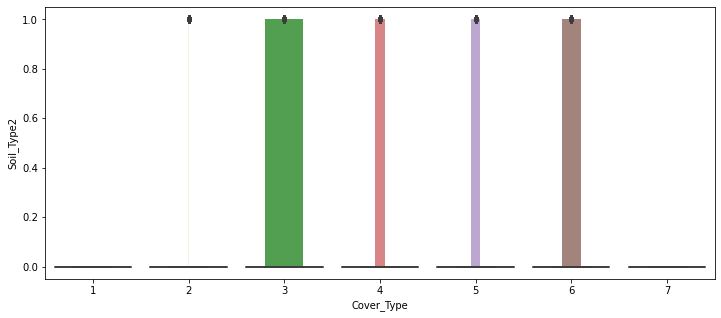

---------------------------------------------------
Soil_Type3


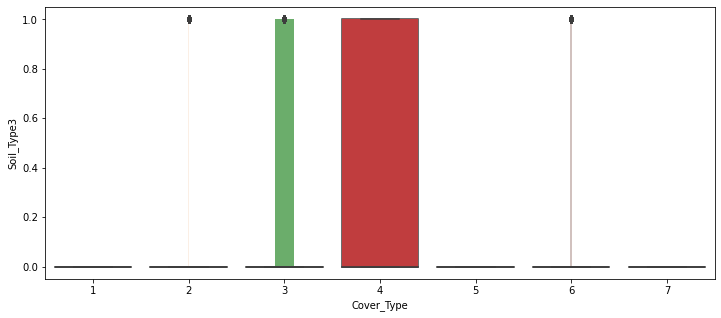

---------------------------------------------------
Soil_Type4


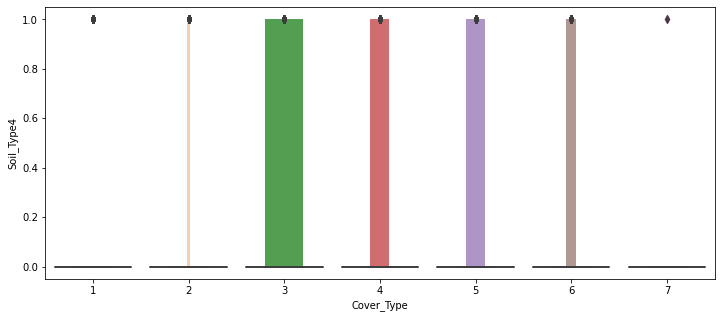

---------------------------------------------------
Soil_Type5


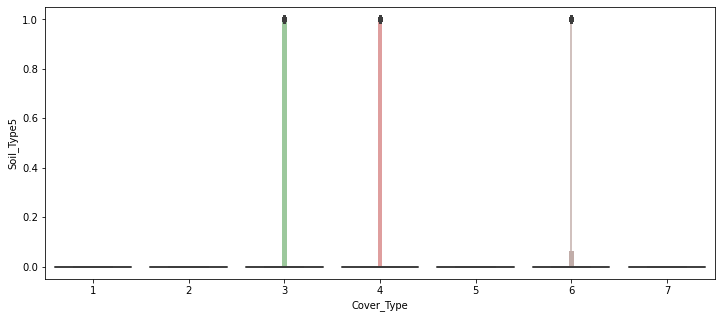

---------------------------------------------------
Soil_Type6


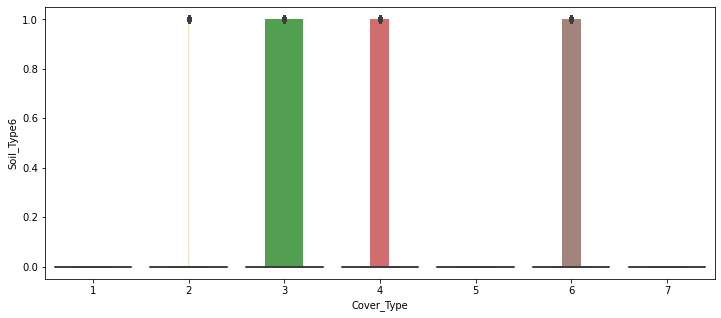

---------------------------------------------------
Soil_Type10


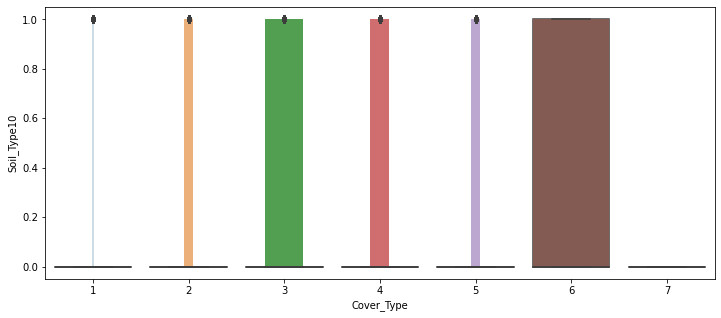

---------------------------------------------------
Soil_Type11


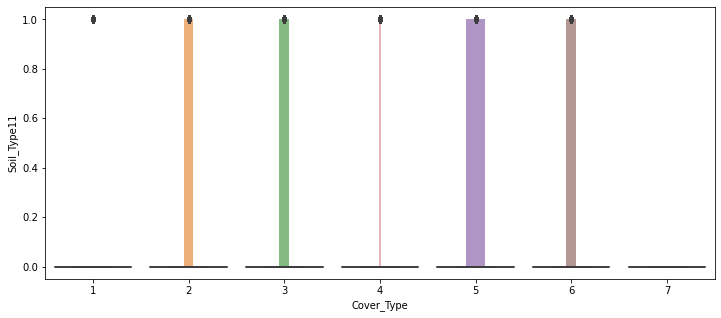

---------------------------------------------------
Soil_Type12


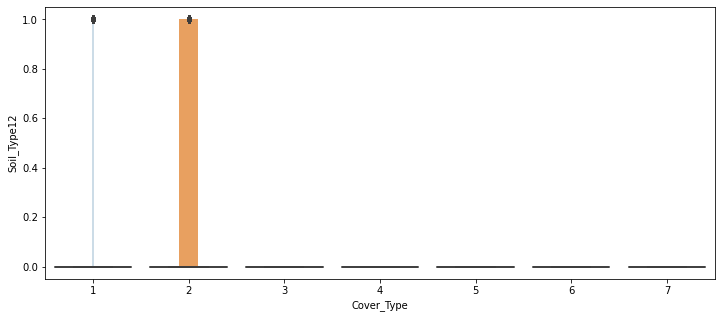

---------------------------------------------------
Soil_Type19


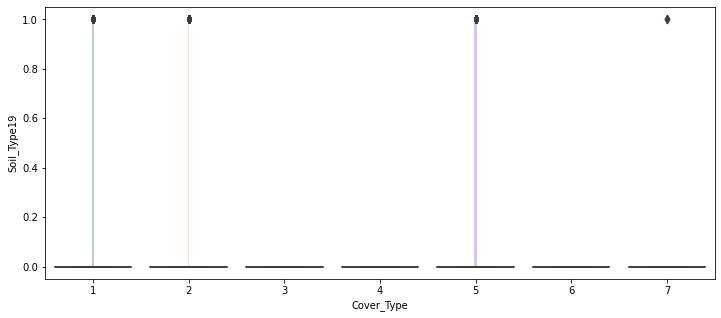

---------------------------------------------------
Soil_Type20


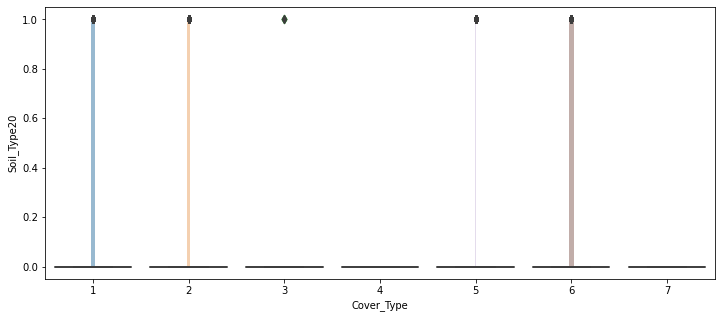

---------------------------------------------------
Soil_Type22


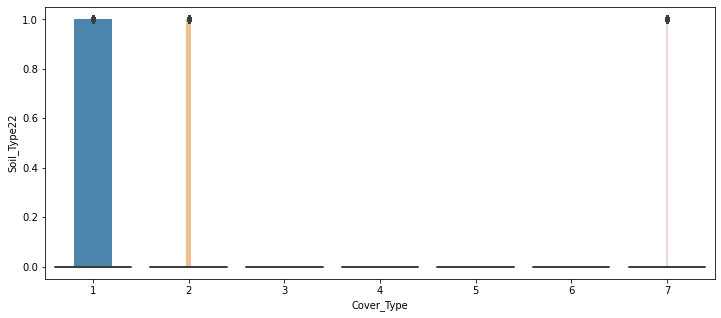

---------------------------------------------------
Soil_Type23


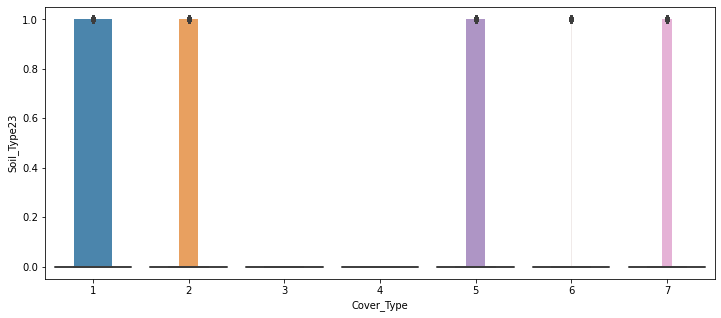

---------------------------------------------------
Soil_Type24


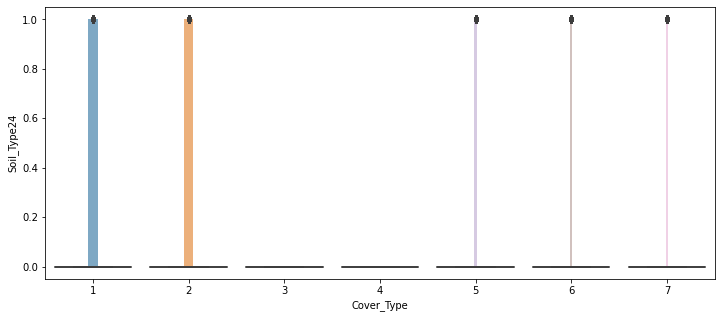

---------------------------------------------------
Soil_Type29


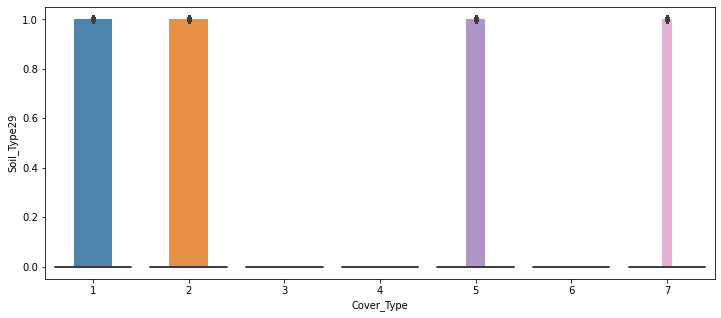

---------------------------------------------------
Soil_Type35


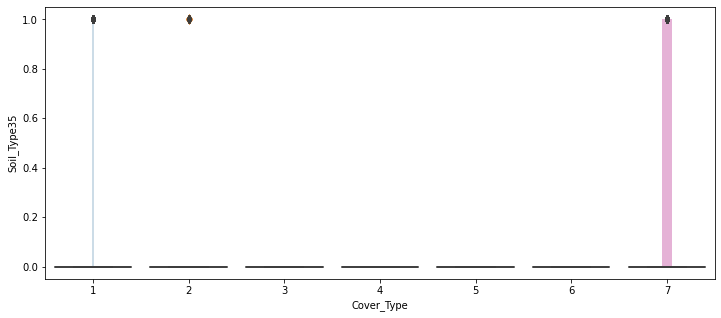

---------------------------------------------------
Soil_Type38


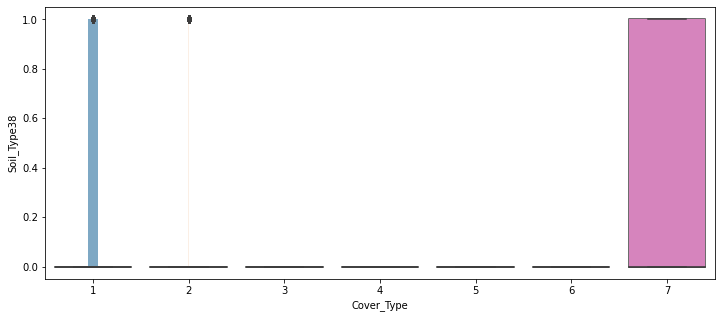

---------------------------------------------------
Soil_Type39


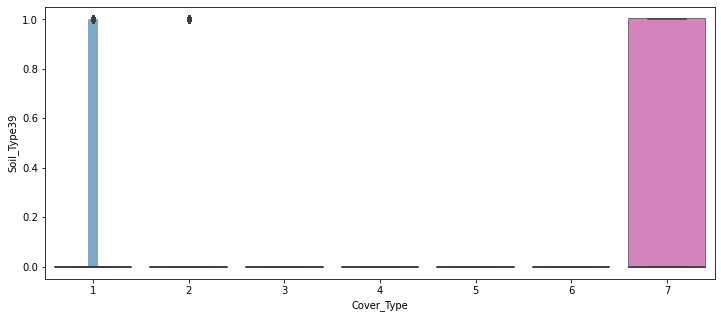

---------------------------------------------------
Soil_Type40


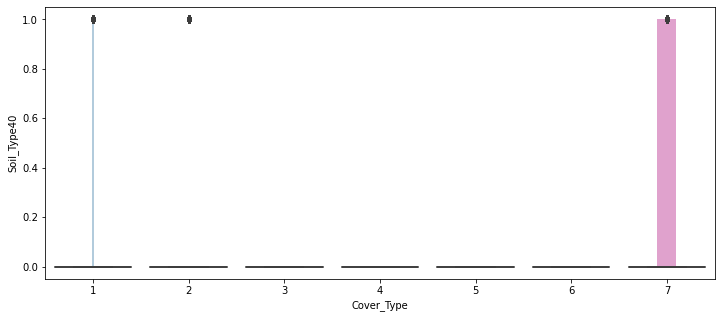

---------------------------------------------------
Cover_Type


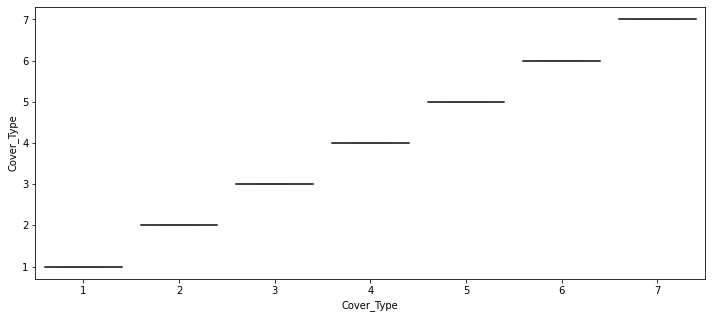

---------------------------------------------------


In [45]:
#final_df = pd.read_csv('tree_updated')
for i in final_touch.columns:
    print(i)
    plt.figure(figsize=(12,5))
    sns.boxenplot(y=final_touch[i], x=final_touch.Cover_Type)
    sns.boxplot(y=final_touch[i], x=final_touch.Cover_Type)
    plt.show()
    print("---------------------------------------------------")

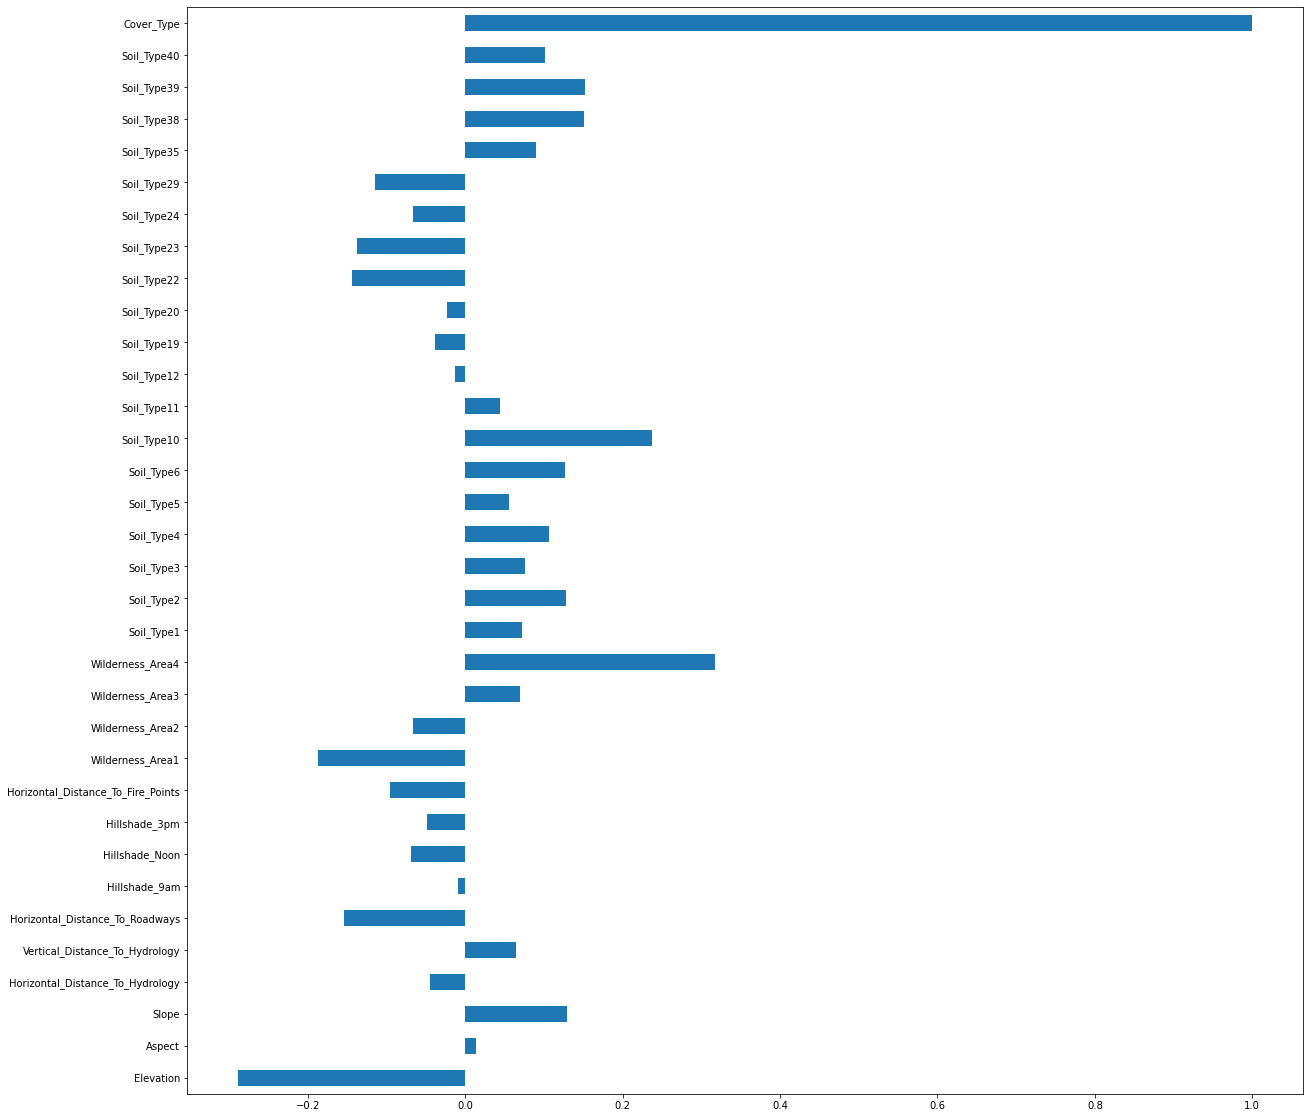

In [55]:
plt.figure(figsize= (20,20))
final_touch.corr()["Cover_Type"].plot.barh()